<a href="https://colab.research.google.com/github/IbrahimTGhanem/DiabetesPrediction/blob/main/Main_codebook_Toronto_CMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Designing a Contextual-Risk-Prediction Model for Type 2 Diabetes Using Machine Learning**

**Section 1: Introduction**

Over the past three decades, the prevalence of type 2 diabetes has increased in all countries; and currently, there are 422 million people around the world who are experiencing this chronic disease, according to the World Health Organization. This enormous number stresses the magnitude of this issue at a global level. At the local level of Canada, according to Statistics Canada, 3 million Canadians (9%) are diagnosed with diabetes. In addition to having 6% of adults in Canada identified as prediabetic, this disease is expected to have an increasing average rate of 3.3% every year. To reduce the potential future burden on healthcare systems, there is a need for developing predictive models that can identify potential areas that might have significant presence of diabetes; and require area-based interventions that would improve the well-being of residents. Thus, for this machine learning (ML) project, we aimed at developing a tool that can help urban and community planners identify potential neighbourhoods with higher risks of having significant levels of diabetes.

**1.1: Importing Libraries and exploring data**

In [40]:
!pip install category-encoders
!pip install imblearn

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
# import statsmodels.api as sm
# import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
# from category_encoders import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from itertools import product

: 

In [2]:
data = pd.read_csv("./Toronto CMA.csv")
print(data.shape)

(1149, 30)


In [3]:
# Viewing the first few rows of the dataset
data.head()

spatial_id  Mental Health Score  Mental Health Binary  Unemployment Rate  \
0   5350001.0             3.943070                     0                7.5   
1   5350002.0             3.772154                     0                5.2   
2   5350003.0             3.804840                     0               10.0   
3   5350004.0             3.473871                     1               11.5   
4   5350005.0             3.699146                     1                8.5   

   High Education Rate  Average Income  Median Age  Recent Immigrant Rate  \
0              57.9439     140470.9957        41.0                 1.9640   
1              61.1722     149880.7211        58.3                 0.3378   
2              62.5397     103790.1244        44.6                23.6495   
3              34.8887      68088.0300        38.2                 6.5911   
4              46.4921      83009.5819        36.0                 9.3404   

   Rented Rate  Visible Minority Rate  ...  Diabetes Type 2 rate  Diabetes  \
0      33.0677                35.0245  ...                6.5107         0   
1       7.8358                 0.0100  ...               11.9783         1   
2      38.1295                20.3100  ...                7.3599         0   
3      93.3799                52.3959  ...               13.3462         1   
4      71.3352                48.1815  ...                8.4192         0   

   Overweight    Obese  Residential Instability  Material Deprivation  \
0     31.9850  21.0068                 0.082319             -0.940159   
1     41.2641  15.5695                 0.161009              0.354992   
2     41.3378  15.4334                 2.388299             -1.523984   
3     29.3714  25.1835                 2.373135              1.345854   
4     32.2253  22.2522                 2.267341              0.527991   

   Ethnic Concentration  Residential Instability quintiles  \
0             -0.229802                                  3   
1             -1.339000                                  3   
2              1.279890                                  5   
3              0.804453                                  5   
4              0.655762                                  5   

   Material Deprivation quintiles  Ethnic Concentration quintiles  
0                               1                               2  
1                               4                               1  
2                               1                               4  
3                               5                               4  
4                               4                               4  

[5 rows x 30 columns]

In [4]:
description = data.describe()
description

spatial_id  Mental Health Score  Mental Health Binary  \
count  1.149000e+03          1149.000000           1149.000000   
mean   5.350378e+06             3.708185              0.456919   
std    1.928752e+02             0.180842              0.498357   
min    5.350001e+06             3.044088              0.000000   
25%    5.350241e+06             3.590828              0.000000   
50%    5.350400e+06             3.728502              0.000000   
75%    5.350525e+06             3.838962              1.000000   
max    5.350832e+06             4.114386              1.000000   

       Unemployment Rate  High Education Rate  Average Income   Median Age  \
count        1149.000000          1149.000000    1.149000e+03  1149.000000   
mean            8.882446            43.660143    1.404743e+05    41.131506   
std             2.988478            15.268003    8.693268e+04     5.289810   
min             0.010000             8.145900    4.506773e+04    28.200000   
25%             7.100000            32.324900    9.830399e+04    37.400000   
50%             8.600000            41.694100    1.230081e+05    40.500000   
75%            10.400000            55.082500    1.510459e+05    44.300000   
max            37.900000            81.938000    1.127636e+06    84.900000   

       Recent Immigrant Rate  Rented Rate  Visible Minority Rate  ...  \
count            1149.000000  1149.000000            1149.000000  ...   
mean                8.175071    30.716517              52.062515  ...   
std                 5.322161    22.775151              26.214372  ...   
min                 0.337800     0.010000               0.010000  ...   
25%                 4.420000    11.640900              29.080100  ...   
50%                 6.909500    23.831600              52.253500  ...   
75%                10.700400    46.742000              74.989800  ...   
max                35.849100   100.000000              98.758200  ...   

       Diabetes Type 2 rate     Diabetes   Overweight        Obese  \
count           1149.000000  1149.000000  1149.000000  1149.000000   
mean               7.341533     0.200174    31.421496    17.407454   
std                3.776123     0.400305     6.047741     4.355703   
min                0.000000     0.000000    13.242700     5.422700   
25%                4.415800     0.000000    27.972000    14.323800   
50%                7.448100     0.000000    31.539000    17.385600   
75%                9.984600     0.000000    34.952700    20.353100   
max               23.839600     1.000000    51.869500    39.633600   

       Residential Instability  Material Deprivation  Ethnic Concentration  \
count              1149.000000           1149.000000           1149.000000   
mean                  0.089070              0.035727              0.850820   
std                   0.966249              0.848042              0.801010   
min                  -1.716538             -1.961844             -1.339000   
25%                  -0.619886             -0.548663              0.187175   
50%                  -0.023471             -0.119926              0.850800   
75%                   0.615760              0.436542              1.456866   
max                   3.398448              4.197645              3.158430   

       Residential Instability quintiles  Material Deprivation quintiles  \
count                        1149.000000                     1149.000000   
mean                            2.961706                        3.134030   
std                             1.412462                        1.355515   
min                             1.000000                        1.000000   
25%                             2.000000                        2.000000   
50%                             3.000000                        3.000000   
75%                             4.000000                        4.000000   
max                             5.000000                        5.000000   

       Ethnic Concentration quinti

In [5]:
# Checking for missing values
print(data.isnull().sum())

spatial_id                           0
Mental Health Score                  0
Mental Health Binary                 0
Unemployment Rate                    0
High Education Rate                  0
Average Income                       0
Median Age                           0
Recent Immigrant Rate                0
Rented Rate                          0
Visible Minority Rate                0
Visible Minority Binary              0
Work Stress Score                    0
Work Stress binary                   0
Rate of Regular alcohol              0
Active transportation                0
Rate of Active population            0
Rate of Daily Smokers                0
Total Population                     0
Food Insecurity score                0
Food Insecurity binary               0
Diabetes Type 2 rate                 0
Diabetes                             0
Overweight                           0
Obese                                0
Residential Instability              0
Material Deprivation     

**1.2: Process of omitting irrelevant columns (ensuring high data quality)**

In [6]:
identifiers_to_drop = ['spatial_id']
data = data.drop(columns=identifiers_to_drop)

In [7]:
population = ['Total Population']
data = data.drop(columns=population)


**Section 2: Data Engineering Process**

In [8]:
# Listing of different types variables
binary_variables = [
    "Visible Minority Binary",
    "Food Insecurity binary",
    "Work Stress binary",
    "Mental Health Binary"
]

In [9]:
categorical_variables = [
    'Residential Instability quintiles', 
    'Material Deprivation quintiles', 
    'Ethnic Concentration quintiles'
]

In [10]:
Numeric_variables = [
    'Ethnic Concentration', 
    'Material Deprivation', 
    'Residential Instability', 
    'Unemployment Rate',
    'Obese', 
    'Mental Health Score',
    'Overweight', 
    'Food Insecurity score', 
    'Rate of Daily Smokers', 
    'Rate of Active population', 
    'Active transportation',
    'Rate of Regular alcohol',
    'Recent Immigrant Rate',
    'Work Stress Score', 
    'Visible Minority Rate', 
    'Rented Rate', 
    'Median Age', 
    'Average Income', 
    'High Education Rate']

In [11]:
data['Diabetes Label'] = np.where(data['Diabetes'] == 1, 'High', 'Low')

**2.1: checking potential class imbalance**

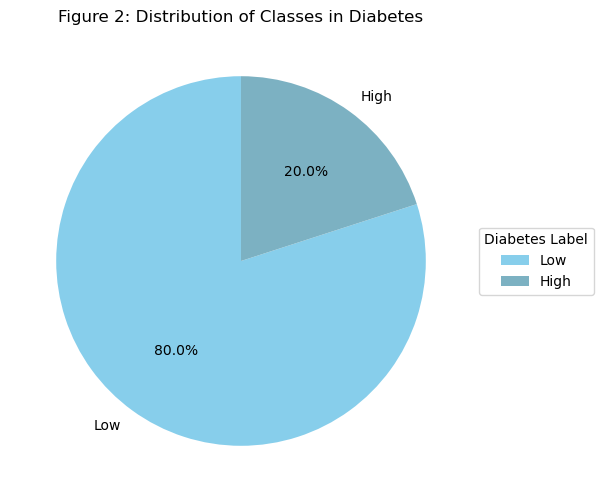

In [12]:
# Calculating counts
counts = data['Diabetes Label'].value_counts()

# Defining colors
colors = ['#87CEEB', '#7cb1c2']

# Ploting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Figure 2: Distribution of Classes in Diabetes')
plt.legend(title='Diabetes Label', loc='center left', bbox_to_anchor=(1, 0.5))

# Showing the plot
plt.show()


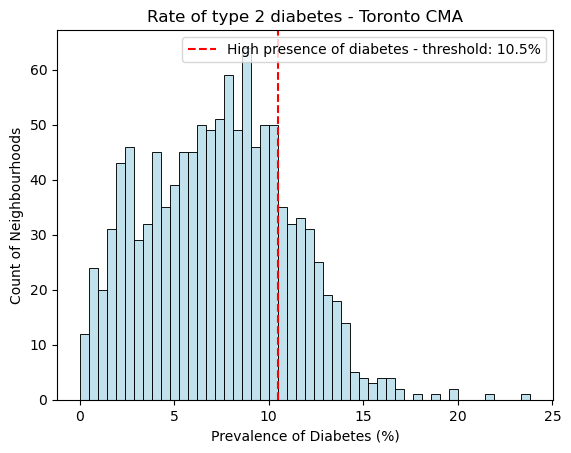

In [13]:
sns.histplot(data['Diabetes Type 2 rate'], bins=50, kde=False, color='lightblue')
plt.title('Rate of type 2 diabetes - Toronto CMA')
plt.xlabel('Prevalence of Diabetes (%)')
plt.ylabel('Count of Neighbourhoods')

plt.axvline(x=10.5, color='red', linestyle='--', label='High presence of diabetes - threshold: 10.5%')

plt.legend()  # Add a legend to label the dashed line

plt.show()

In [14]:
Continous_label = ['Diabetes Type 2 rate']
data = data.drop(columns=Continous_label)

While there are no missing values in the label class, there is a clear class imbalance in the label/target variable where only 20% of the observations belong to the category of 'High Diabetes'. This issue entails the need for either upsampling or downsampling, which will be tackled before running classification models.


**2.2 Visualization variables, correlation, and understanding outliers**

**2.2.1 Visualizing Variables**

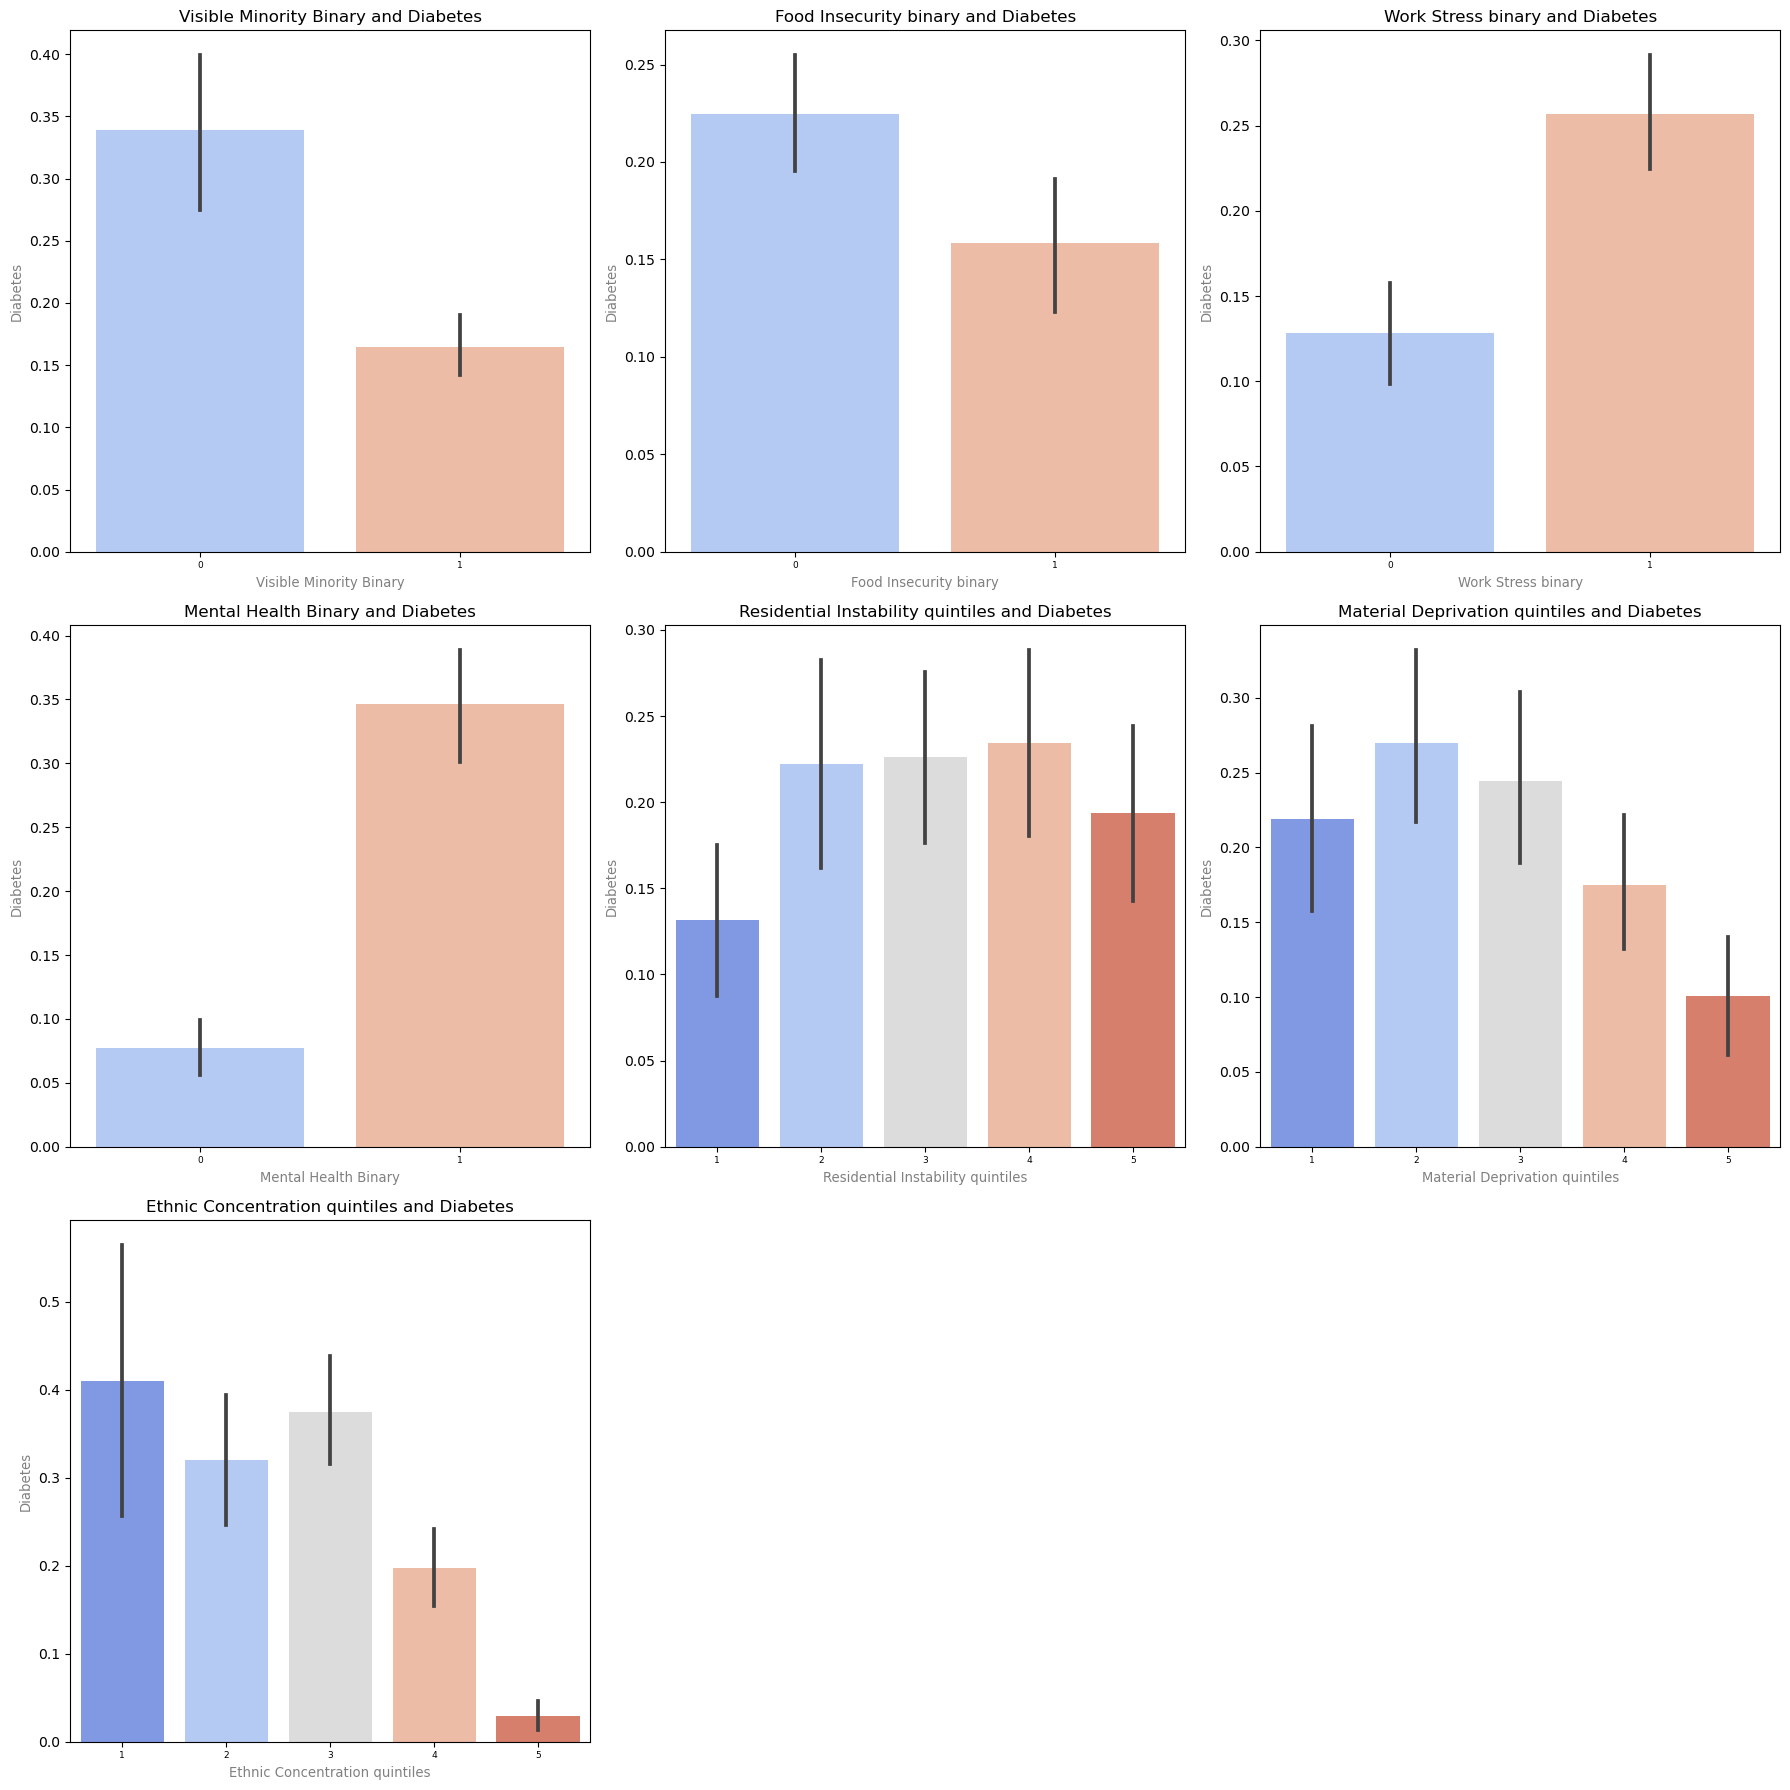

In [15]:
# Grouping variables into binary, ordinal, and categorical
binary_categorical = binary_variables + categorical_variables

#Setting Y/class

Class= 'Diabetes'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(binary_categorical) // subplots_per_row + 1

# Creating bar plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(binary_categorical):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.barplot(data=data, x=variable_name, y=Class, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adjusting the font size for unit names
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), fontsize=6.5)

# Adding and adjusting lables for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing  empty subplots
for i in range(len(binary_categorical), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()

In [16]:
toronto_only_extreme = (data['Material Deprivation quintiles'] == 3) & (data['Residential Instability quintiles'] == 1)
cma_extreme = (data['Material Deprivation quintiles'] == 2) & (data['Residential Instability quintiles'] == 4)

data['Instability_Deprivation'] = toronto_only_extreme | cma_extreme
data['Instability_Deprivation'] = data['Instability_Deprivation'].astype(int)

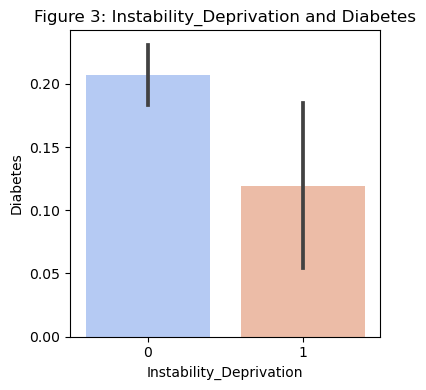

In [17]:
#Visualizing the new interaction term
fig, axes = plt.subplots(1, 1, figsize=(4, 4))

# Plot the subplot
sns.barplot(data=data, x="Instability_Deprivation", y="Diabetes", palette='coolwarm', ax=axes)
axes.set_title("Figure 3: Instability_Deprivation and Diabetes")

# Adjust the layout and display the plot
plt.tight_layout()

# Visualize the plot
plt.show()

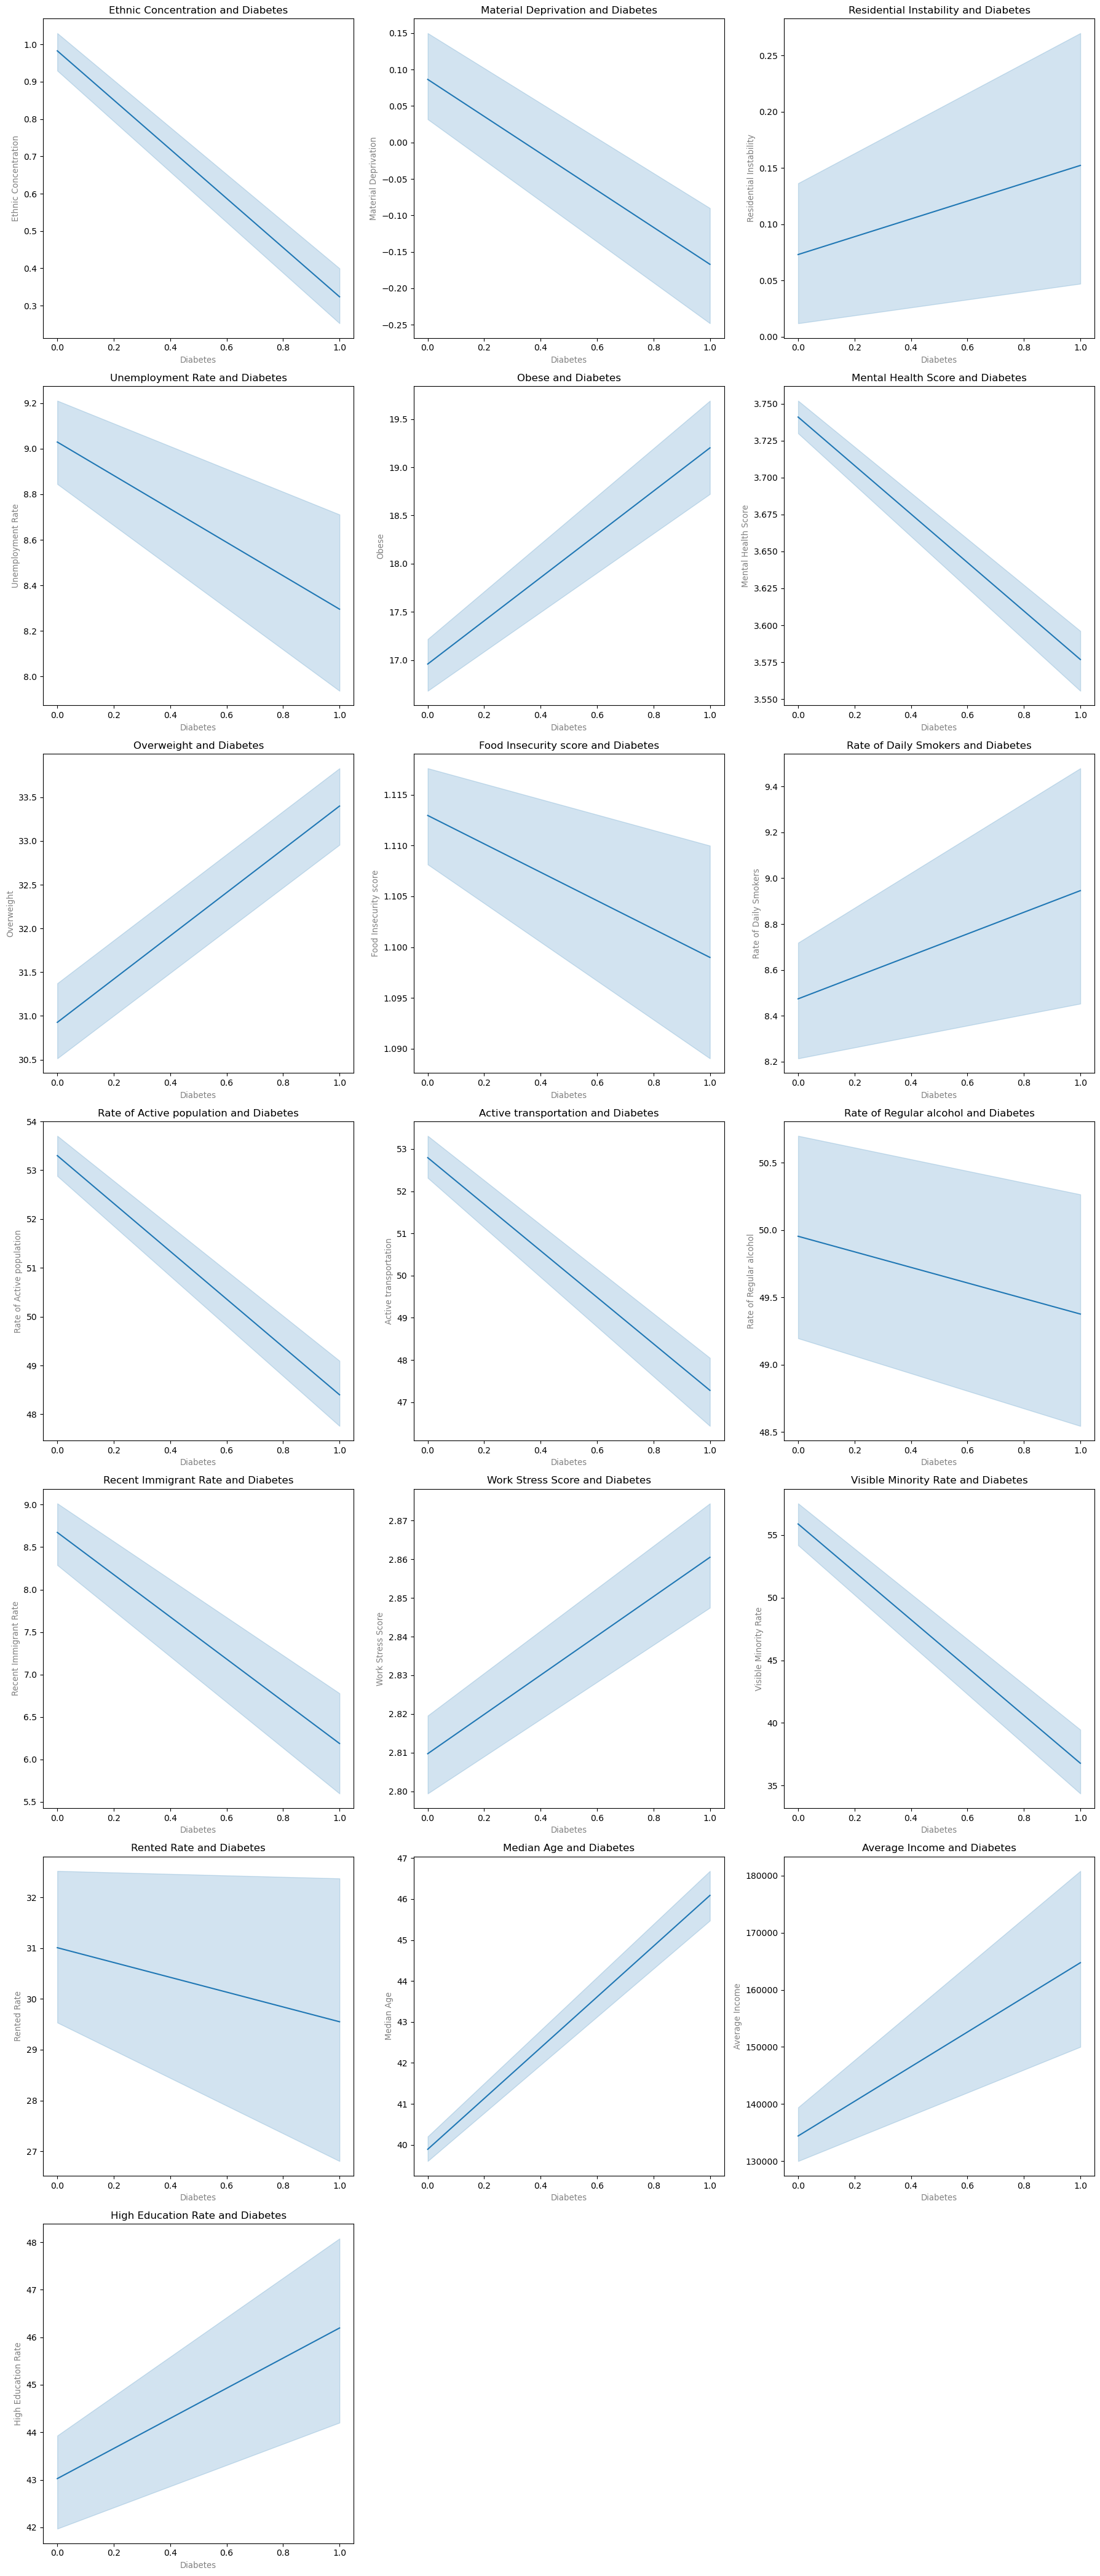

In [18]:
Class = 'Diabetes'

# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(Numeric_variables) // subplots_per_row + 1

# Creating line plots
fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

for i, variable_name in enumerate(Numeric_variables):
    row = i // subplots_per_row
    col = i % subplots_per_row
    sns.lineplot(data=data, x=Class, y=variable_name, palette='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f"{variable_name} and {Class}")

# Adding and adjusting labels for both axes
for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

# Removing empty subplots
for i in range(len(Numeric_variables), total_rows * subplots_per_row):
    fig.delaxes(axes[i // subplots_per_row, i % subplots_per_row])

plt.tight_layout()
plt.show()



**2.2.1 Examining correlation patterns**

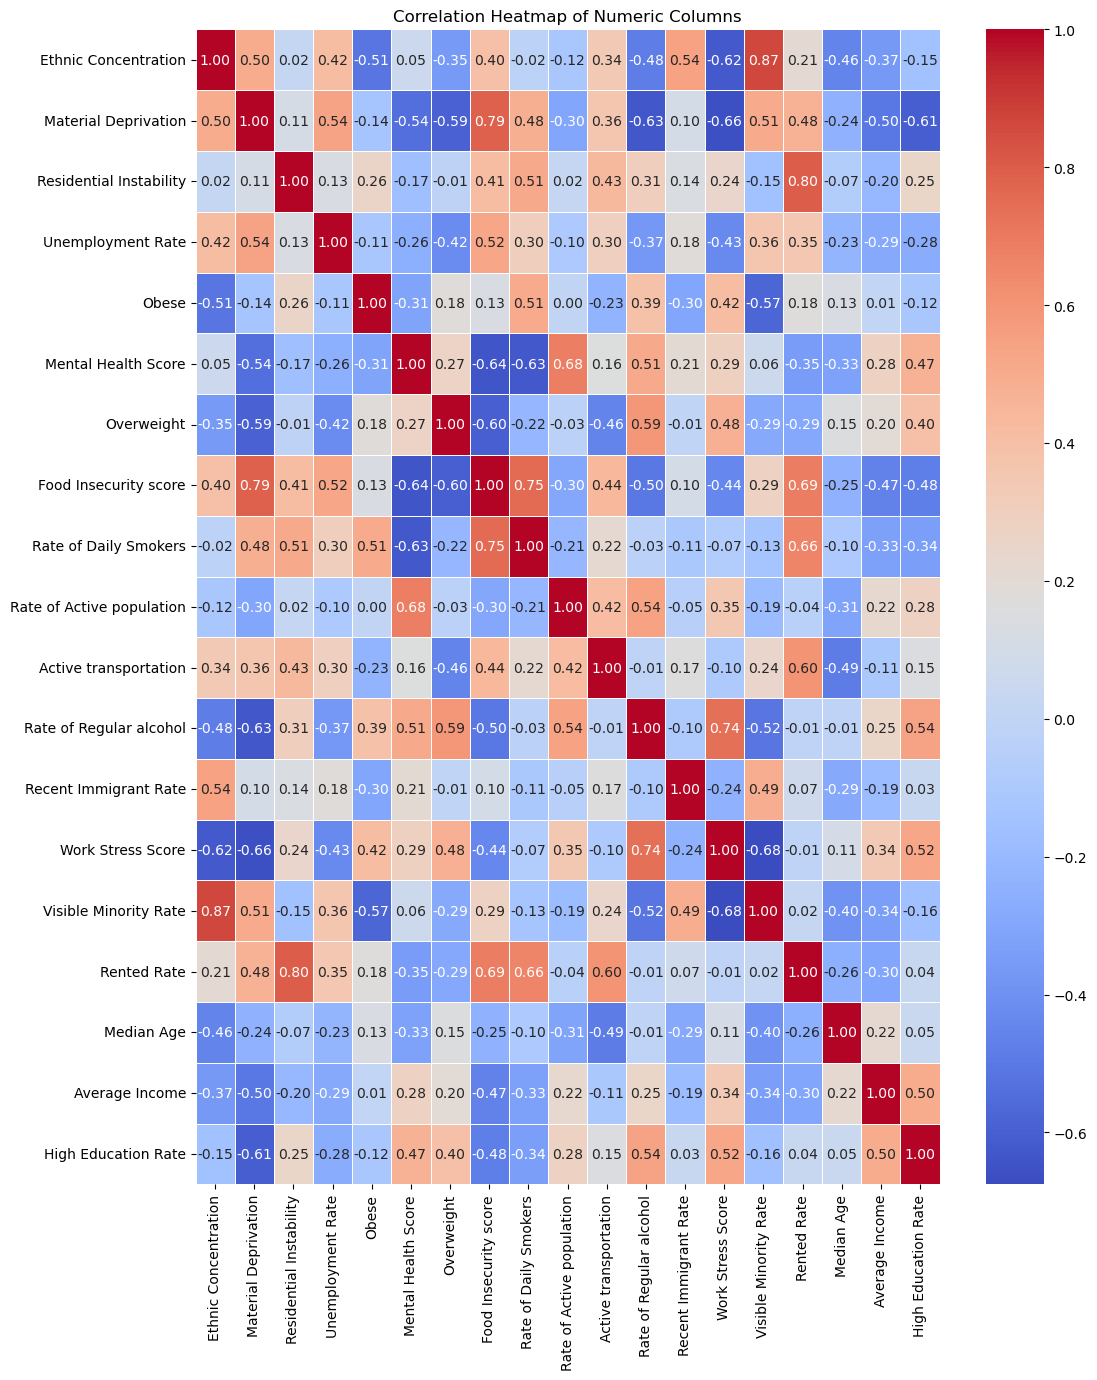

In [19]:
# Creating a DataFrame with only the selected columns
numeric_data = data[Numeric_variables]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [20]:
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

print("Pairs of variables with correlation > 0.7:")
for pair in high_correlation_pairs:
    print(pair)

Pairs of variables with correlation > 0.7:
('Ethnic Concentration', 'Visible Minority Rate')
('Material Deprivation', 'Food Insecurity score')
('Residential Instability', 'Rented Rate')
('Food Insecurity score', 'Rate of Daily Smokers')
('Rate of Regular alcohol', 'Work Stress Score')


As ethnic concentration, material deprivation, residenial instability, and food insecurity are presented inquintiles and binary, they will be ddropped.

In [21]:
numeric_variables_to_drop = [
    'Ethnic Concentration', 
    'Material Deprivation',
    'Residential Instability', 
    'Food Insecurity score', 
    'Rate of Regular alcohol',

    # below columns are correlated according to results from `toronto only.csv`
    # 'Mental Health Score', 
    # 'Work Stress Score',
]

In [22]:
data = data.drop(columns=numeric_variables_to_drop)

In [23]:
Numeric_variables =[var for var in Numeric_variables if var not in numeric_variables_to_drop]

In [24]:
Numeric_variables

['Unemployment Rate',
 'Obese',
 'Mental Health Score',
 'Overweight',
 'Rate of Daily Smokers',
 'Rate of Active population',
 'Active transportation',
 'Recent Immigrant Rate',
 'Work Stress Score',
 'Visible Minority Rate',
 'Rented Rate',
 'Median Age',
 'Average Income',
 'High Education Rate']

**2.2.3 Examining normal distibution and outliers**

In [25]:
# Initialize the StandardScaler
scaler = StandardScaler()

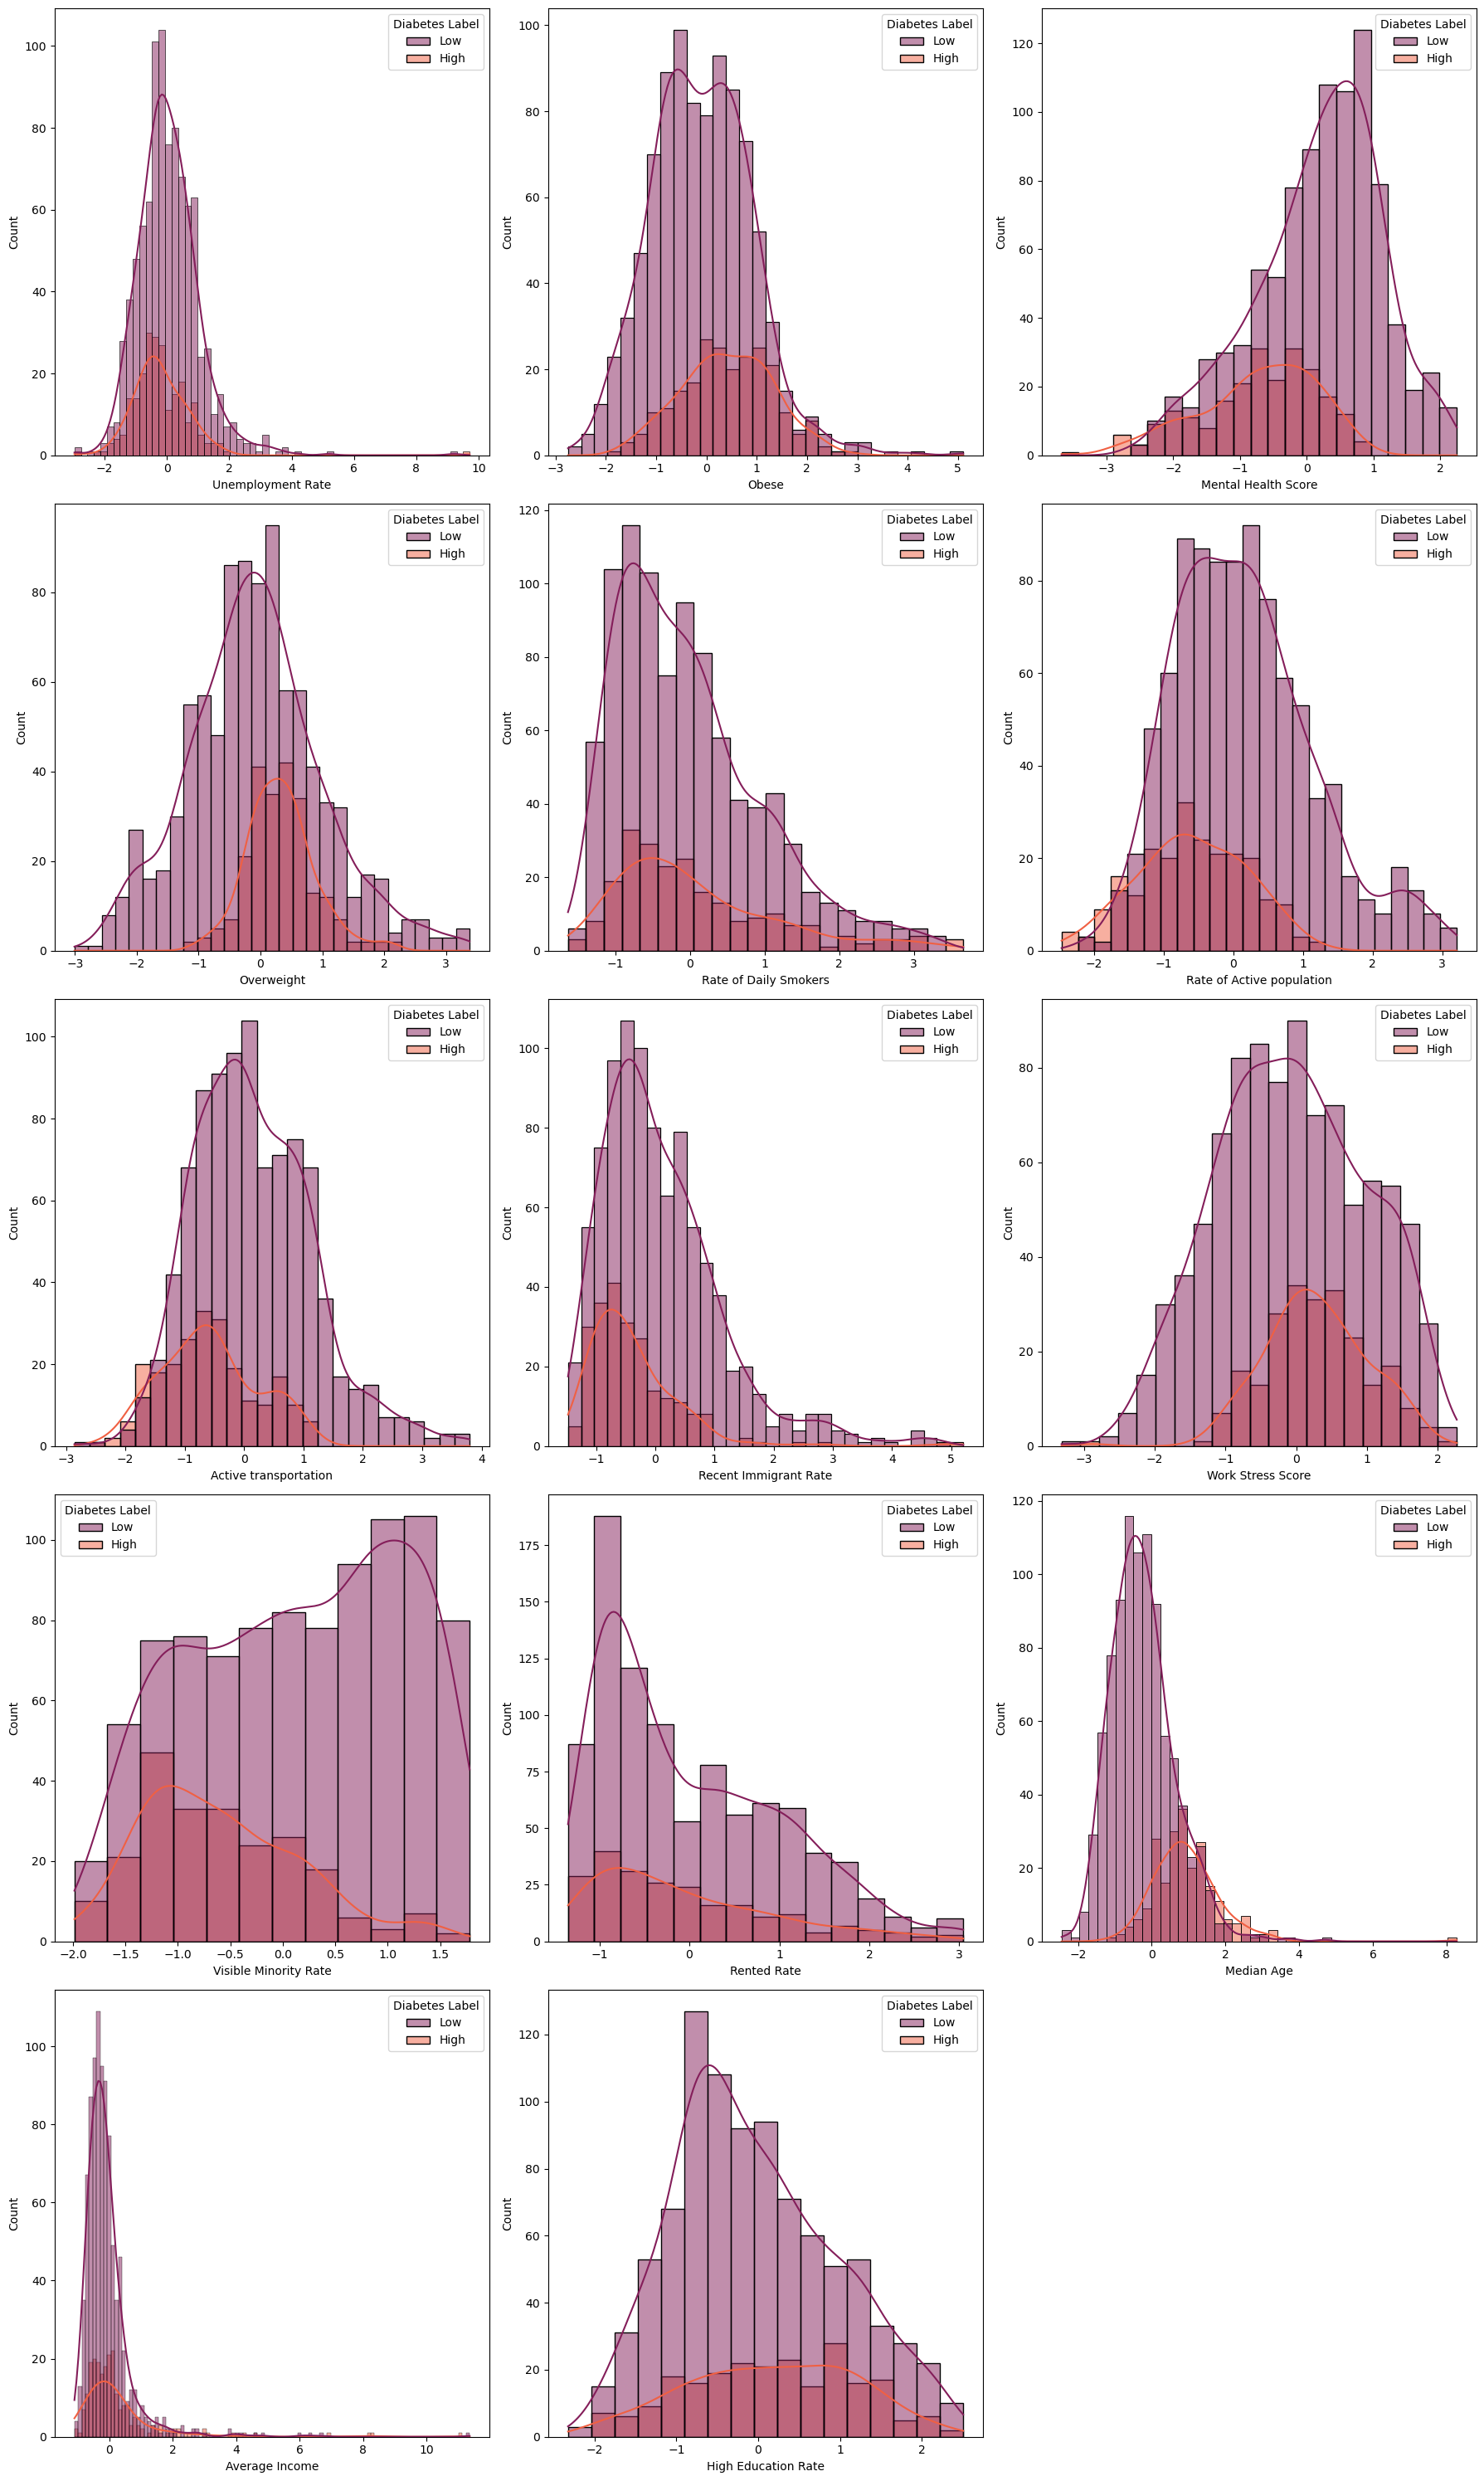

In [26]:
# Determining the number of subplots in each row
subplots_per_row = 3
total_rows = len(Numeric_variables) // subplots_per_row + 1

# Creating a grid of subplots
fig, axs = plt.subplots(total_rows, subplots_per_row, figsize=(18, 6 * total_rows))

# Creating a copy of the original data
data_copy = data.copy()

# Looping through each feature in numeric variables
for i, column in enumerate(Numeric_variables):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // subplots_per_row
    y = i % subplots_per_row

    # Scaling the feature in the copied data using StandardScaler
    data_copy[column] = scaler.fit_transform(data_copy[[column]])

    # Plot a histogram of the scaled feature split by the Diabetes class
    sns.histplot(data=data_copy, x=column, hue='Diabetes Label', kde=True, palette='rocket', ax=axs[x][y])

# Removing any empty subplots
for i in range(len(Numeric_variables), total_rows * subplots_per_row):
    fig.delaxes(axs[i // subplots_per_row, i % subplots_per_row])

# Display all the subplots
plt.tight_layout()
plt.show()

In [27]:
#Removing visualization variable
data.drop(columns=['Diabetes Label'], inplace=True)

In [28]:
# Defining a Z-score threshold
zscore_threshold = 4

# Initialize a dictionary to store variable names and their respective outlier counts
variables_with_outliers = {}

# Iterate through each continuous variable and identify variables with outliers
for variable_name in Numeric_variables:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers_count = sum(abs(z_scores) > zscore_threshold)

    # Store the variable name and outlier count in the dictionary
    variables_with_outliers[variable_name] = outliers_count

# Printing the names of variables with their respective outlier counts
print("Variables with the number of outliers beyond 4 standard deviations:")
for variable_name, outliers_count in variables_with_outliers.items():
    print(f"{variable_name}: {outliers_count} observations")


Variables with the number of outliers beyond 4 standard deviations:
Unemployment Rate: 4 observations
Obese: 2 observations
Mental Health Score: 0 observations
Overweight: 0 observations
Rate of Daily Smokers: 0 observations
Rate of Active population: 0 observations
Active transportation: 0 observations
Recent Immigrant Rate: 10 observations
Work Stress Score: 0 observations
Visible Minority Rate: 0 observations
Rented Rate: 0 observations
Median Age: 2 observations
Average Income: 14 observations
High Education Rate: 0 observations


**Section 3: Data preperation fot simple models**

In [29]:
DataSimple = data.copy()

In [30]:
DataSimple.columns

Index(['Mental Health Score', 'Mental Health Binary', 'Unemployment Rate',
       'High Education Rate', 'Average Income', 'Median Age',
       'Recent Immigrant Rate', 'Rented Rate', 'Visible Minority Rate',
       'Visible Minority Binary', 'Work Stress Score', 'Work Stress binary',
       'Active transportation', 'Rate of Active population',
       'Rate of Daily Smokers', 'Food Insecurity binary', 'Diabetes',
       'Overweight', 'Obese', 'Residential Instability quintiles',
       'Material Deprivation quintiles', 'Ethnic Concentration quintiles',
       'Instability_Deprivation'],
      dtype='object')

In [31]:
# List of columns for log transformation
log_columns = [  
 # 'Rate of Daily Smokers', 
 'Unemployment Rate',
 'Recent Immigrant Rate',
 'Median Age',
 'Average Income']

# Apply log transformation without mean imputation
for column in log_columns:
    # Apply log transformation directly
    DataSimple[f'log_{column.lower().replace(" ", "_")}'] = np.log(DataSimple[column])

In [32]:
DataSimple.columns

Index(['Mental Health Score', 'Mental Health Binary', 'Unemployment Rate',
       'High Education Rate', 'Average Income', 'Median Age',
       'Recent Immigrant Rate', 'Rented Rate', 'Visible Minority Rate',
       'Visible Minority Binary', 'Work Stress Score', 'Work Stress binary',
       'Active transportation', 'Rate of Active population',
       'Rate of Daily Smokers', 'Food Insecurity binary', 'Diabetes',
       'Overweight', 'Obese', 'Residential Instability quintiles',
       'Material Deprivation quintiles', 'Ethnic Concentration quintiles',
       'Instability_Deprivation', 'log_unemployment_rate',
       'log_recent_immigrant_rate', 'log_median_age', 'log_average_income'],
      dtype='object')

In [33]:
DataSimple = DataSimple.drop(columns=log_columns, axis=1)

In [34]:
# Specifying binary columns as integers
binary_columns = ['Visible Minority Binary', 'Work Stress binary', 'Food Insecurity binary', 'Instability_Deprivation', 'Mental Health Binary']
DataSimple[binary_columns] = DataSimple[binary_columns].astype(int)

Label_column = ['Diabetes']
DataSimple[Label_column] = DataSimple[Label_column].astype(int)

# Specifying categorical columns
categorical_columns = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']
DataSimple[categorical_columns] = DataSimple[categorical_columns].astype('category')

# Specifying the rest as floats
float_columns = [col for col in DataSimple.columns if col not in binary_columns + categorical_columns + Label_column]
DataSimple[float_columns] = DataSimple[float_columns].astype(float)


In [35]:
X_S = DataSimple.drop('Diabetes', axis=1)
y_S = DataSimple['Diabetes']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# Application of RUS for downsampling on the training data
rus = RandomUnderSampler()
X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
X_test_S = ct.transform(X_test_S)

#converting numpyarray back to DataFrame
X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())

In [ ]:
# Casaulty!!!

In [36]:
.columns

Index(['Mental Health Score', 'Mental Health Binary', 'High Education Rate',
       'Rented Rate', 'Visible Minority Rate', 'Visible Minority Binary',
       'Work Stress Score', 'Work Stress binary', 'Active transportation',
       'Rate of Active population', 'Rate of Daily Smokers',
       'Food Insecurity binary', 'Diabetes', 'Overweight', 'Obese',
       'Residential Instability quintiles', 'Material Deprivation quintiles',
       'Ethnic Concentration quintiles', 'Instability_Deprivation',
       'log_unemployment_rate', 'log_recent_immigrant_rate', 'log_median_age',
       'log_average_income'],
      dtype='object')

In [38]:
!pip install dowhy

     ------------------------------------ 383.4/383.4 kB 823.8 kB/s eta 0:00:00
     -------------------------------------- 174.5/174.5 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB ? eta 0:00:00
     ---------------------------------------- 72.2/72.2 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 8.4/8.4 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 736.4/736.4 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 293.0/293.0 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 86.7/86.7

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [47]:
import pandas as pd

# read Stata .dta file 
df = DataSimple

# set variables 
treatment = 'Mental Health Score'
outcome = 'Diabetes'
covariates = ['Mental Health Binary', 'High Education Rate',
       'Rented Rate', 'Visible Minority Rate', 'Visible Minority Binary',
       'Work Stress Score', 'Work Stress binary', 'Active transportation',
       'Rate of Active population', 'Rate of Daily Smokers',
       'Food Insecurity binary', 'Overweight', 'Obese',
       'Residential Instability quintiles', 'Material Deprivation quintiles',
       'Ethnic Concentration quintiles', 'Instability_Deprivation',
       'log_unemployment_rate', 'log_recent_immigrant_rate', 'log_median_age',
       'log_average_income']

all_variables = ['Mental Health Score', 'Mental Health Binary', 'High Education Rate',
       'Rented Rate', 'Visible Minority Rate', 'Visible Minority Binary',
       'Work Stress Score', 'Work Stress binary', 'Active transportation',
       'Rate of Active population', 'Rate of Daily Smokers',
       'Food Insecurity binary', 'Diabetes', 'Overweight', 'Obese',
       'Residential Instability quintiles', 'Material Deprivation quintiles',
       'Ethnic Concentration quintiles', 'Instability_Deprivation',
       'log_unemployment_rate', 'log_recent_immigrant_rate', 'log_median_age',
       'log_average_income']

df = df.dropna(axis=0, subset=all_variables)

# split data into train and test sets 
train, test = train_test_split(df, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

In [50]:
from econml.dml import CausalForestDML
from sklearn.linear_model import MultiTaskLassoCV

# set parameters for causal forest 
causal_forest = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=MultiTaskLassoCV(), 
                                model_y=MultiTaskLassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest.const_marginal_ate(X_test)

ImportError: Numba needs NumPy 1.22 or greater. Got NumPy 1.21.

In [ ]:
# code adapted from https://github.com/microsoft/EconML
import shap
from econml.dml import CausalForestDML

# fit causal forest with default parameters 
causal_forest = CausalForestDML()
causal_forest.fit(Y, T, X=X, W=W)

# calculate shap values of causal forest model 
shap_values = causal_forest.shap_values(X)
# plot shap values 
shap.summary_plot(shap_values['Y0']['T0'])

In [ ]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest.effect(X)
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest.effect_interval(X, alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

# merge dataframes and sort 
df = te_df.merge(lb_df, left_on=te_df.index, right_on=lb_df.index, how='left')
df.drop(columns=['key_0'], inplace=True)
df = df.merge(ub_df, left_on=df.index, right_on=ub_df.index, how='left')
df.drop(columns=['key_0'], inplace=True)
df.sort_values('cate', inplace=True, ascending=True)
df.reset_index(inplace=True, drop=True)

# calculate rolling mean
z = df.rolling(window=30, center=True).mean()

In [ ]:
import matplotlib.pyplot as plt

# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

**Section 4: Creating Simple models**

**4.1 LR model**

In [101]:
X_resampled_scaled = scaler.fit_transform(X_resampled_S)
X_test_scaled = scaler.transform(X_test_S)

As we have 35 shortlisted variables, testing all combinations might be infeasible. Thus, the recursive feature elimination with cross validation (RFECV) will be applied to find the optimal subset of variables that maximizes the performance of the model while also avoiding overfitting. Removing less important variables will make the model more interpretable, and more generalizable to unseen data. The tool initiates optimization with all variables included; thereafter, it eliminates one variables at a time. The tool relies on the average performance score of the model on the test data through each iteration.

In [102]:
accuracy_scoring = make_scorer(accuracy_score)

In [103]:
Log_reg_model = LogisticRegression()

cv_LR = StratifiedKFold(5)
rfecv_LR = RFECV(
    estimator=Log_reg_model,
    step=1,
    cv=cv_LR,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)
rfecv_LR.fit(X_resampled_scaled, y_resampled_S)

# Print the optimal number of selected features
print(f"Optimal number of features -LR: {rfecv_LR.n_features_}")

Optimal number of features -LR: 7


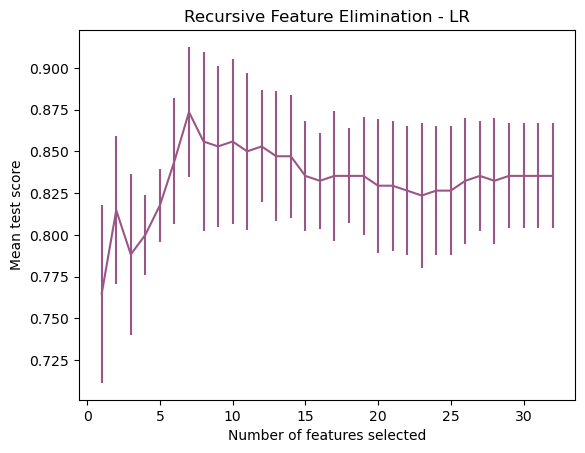

In [104]:
# Calculate the number of different feature selections tested
n_scores_LR = len(rfecv_LR.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_LR + 1),
    rfecv_LR.cv_results_["mean_test_score"],
    yerr=rfecv_LR.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - LR")

# Show the plot
plt.show()

In [105]:
selected_LR_features = X_resampled_S.columns[rfecv_LR.support_]
eliminated_LR_features = X_resampled_S.columns[~rfecv_LR.support_]

print("Selected Features for LR:")
print(selected_LR_features)
print("\nEliminated Features for LR:")
print(eliminated_LR_features)

Selected Features for LR:
Index(['remainder__Mental Health Binary', 'remainder__High Education Rate',
       'remainder__Work Stress binary', 'remainder__Rate of Active population',
       'remainder__Obese', 'remainder__log_recent_immigrant_rate',
       'remainder__log_median_age'],
      dtype='object')

Eliminated Features for LR:
Index(['one_hot_encoder__Residential Instability quintiles_1',
       'one_hot_encoder__Residential Instability quintiles_2',
       'one_hot_encoder__Residential Instability quintiles_3',
       'one_hot_encoder__Residential Instability quintiles_4',
       'one_hot_encoder__Residential Instability quintiles_5',
       'one_hot_encoder__Material Deprivation quintiles_1',
       'one_hot_encoder__Material Deprivation quintiles_2',
       'one_hot_encoder__Material Deprivation quintiles_3',
       'one_hot_encoder__Material Deprivation quintiles_4',
       'one_hot_encoder__Material Deprivation quintiles_5',
       'one_hot_encoder__Ethnic Concentration qu

In [106]:
# Accessing the mean test scores
mean_test_scores_LR = rfecv_LR.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for i, score_LR in enumerate(mean_test_scores_LR):
    num_selected_features = i + 1  #start with one feature
    print(f"Number of Selected Features: {num_selected_features}, Mean Test Score: {score_LR}")

Number of Selected Features: 1, Mean Test Score: 0.7647058823529411
Number of Selected Features: 2, Mean Test Score: 0.8147058823529413
Number of Selected Features: 3, Mean Test Score: 0.788235294117647
Number of Selected Features: 4, Mean Test Score: 0.8
Number of Selected Features: 5, Mean Test Score: 0.8176470588235294
Number of Selected Features: 6, Mean Test Score: 0.8441176470588235
Number of Selected Features: 7, Mean Test Score: 0.8735294117647058
Number of Selected Features: 8, Mean Test Score: 0.8558823529411764
Number of Selected Features: 9, Mean Test Score: 0.8529411764705882
Number of Selected Features: 10, Mean Test Score: 0.8558823529411764
Number of Selected Features: 11, Mean Test Score: 0.85
Number of Selected Features: 12, Mean Test Score: 0.8529411764705882
Number of Selected Features: 13, Mean Test Score: 0.8470588235294118
Number of Selected Features: 14, Mean Test Score: 0.8470588235294118
Number of Selected Features: 15, Mean Test Score: 0.8352941176470587
Numb

In [195]:
# after many runs, we concluded the most important features are as below:

LR_features = [
    'remainder__Active transportation', # from toronto only
    'remainder__Rate of Active population', # in toronto CMA
    'remainder__Overweight',
    'remainder__Obese',
    'remainder__log_median_age'
]
# selected_LR_features.tolist()

In [108]:
#Fitting the data
X_train_scaled_LR = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_LR = scaler.transform(X_test_S[LR_features])

In [109]:
# Initialize an LogisticRegression regressor
lr = LogisticRegression()

# Creating a pipeline that applies the LogisticRegression regressor
model_for_LogisticRegression = Pipeline([
    ('lr', lr)
])

# Fitting the model on the training data
model_for_LogisticRegression.fit(X_train_scaled_LR, y_resampled_S)
# Define a dictionary of hyperparameter values to search over.
param_dist_LogisticRegression = {
    'lr__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'lr__C': [i/10 for i in range(1,11)],
    'lr__penalty': ['l1', 'l2', 'elasticnet', None],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_LogisticRegression = GridSearchCV(
    model_for_LogisticRegression, param_grid=param_dist_LogisticRegression, cv=skf)

# Train Grid Search on the training data
random_search_LogisticRegression.fit(X_train_scaled_LR, y_resampled_S)

# Extract results into a DataFrame
results_LogisticRegression = pd.DataFrame(random_search_LogisticRegression.cv_results_)

# Display the set of parameters that achieved the best score
results_LogisticRegression[results_LogisticRegression['rank_test_score'] == 1]
random_search_LogisticRegression.best_params_

{'lr__C': 0.2, 'lr__penalty': 'l1', 'lr__solver': 'saga'}

In [45]:
# usefull functions to check overfitting in hyper-parameter tuning.
def get_max_indexes(array):
    np_array = np.asarray(array)
    maximums = np.flatnonzero(np_array == np.max(np_array))
    return maximums

# decision_flow = [accuracies, precisions, recalls, f1s]
def pass_decision_flow(accuracies, precisions, recalls, f1s):
    accuracy_maximums = get_max_indexes(accuracies)
    if len(accuracy_maximums) == 1:
        return accuracy_maximums
    elif len(accuracy_maximums) > 1:
        precision_maximums = get_max_indexes(precisions)
        acc_prec = np.intersect1d(accuracy_maximums, precision_maximums)
        if len(acc_prec) == 0:
            return accuracy_maximums
        elif len(acc_prec) == 1:
            return acc_prec
        else:
            rec_maximums = get_max_indexes(recalls)
            acc_prec_rec =  np.intersect1d(acc_prec, rec_maximums)
            if len(acc_prec_rec) == 0:
                return acc_prec
            elif len(acc_prec_rec) == 1:
                return acc_prec_rec
            else:
                f1_maximums = get_max_indexes(f1s)
                acc_prec_rec_f1 = np.intersect1d(acc_prec_rec, f1_maximums)
                if len(acc_prec_rec_f1) == 0:
                    return acc_prec_rec
                else:
                    return acc_prec_rec_f1

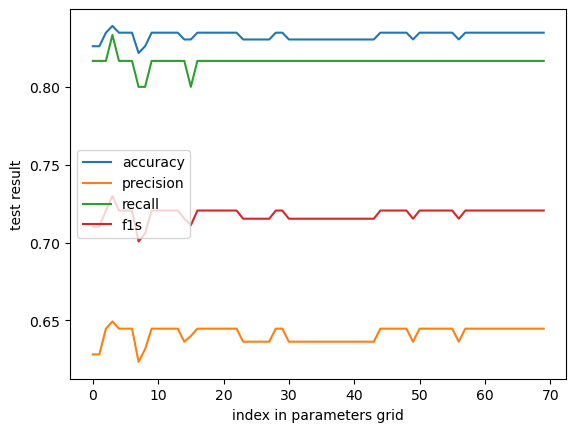

Best Configs: 
{'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}




In [108]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                lr__C=param_config["lr__C"], 
                lr__penalty=param_config["lr__penalty"], 
                lr__solver=param_config["lr__solver"], 
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)  

        except:
            pass
        
    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_LogisticRegression
model = model_for_LogisticRegression

x_train = X_train_scaled_LR
y_train = y_resampled_S
x_test = X_test_scaled_LR
y_test = y_test_S

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]
    
    model = model.set_params(
        lr__C=param_config["lr__C"], 
        lr__penalty=param_config["lr__penalty"], 
        lr__solver=param_config["lr__solver"], 
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1) 


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]
print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [109]:
best_config = the_bests[0]
model_for_LogisticRegression = model_for_LogisticRegression.set_params(
    lr__C=best_config["lr__C"], 
    lr__penalty=best_config["lr__penalty"], 
    lr__solver=best_config["lr__solver"], 
)

# Refit the model using the training data
LR_model = model_for_LogisticRegression.fit(X_train_scaled_LR, y_resampled_S)

In [110]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_LR_model = cross_val_predict(LR_model, X_train_scaled_LR, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_LR = confusion_matrix(y_resampled_S, predicted_labels_LR_model)

# Calculate the full classification report
class_report_LR = classification_report(y_resampled_S, predicted_labels_LR_model)

# Calculate accuracy
accuracy_LR = accuracy_score(y_resampled_S, predicted_labels_LR_model)

# Calculate precision
precision_LR = precision_score(y_resampled_S, predicted_labels_LR_model)

# Calculate recall
recall_LR = recall_score(y_resampled_S, predicted_labels_LR_model)

# Calculate F1 score
f1_LR = f1_score(y_resampled_S, predicted_labels_LR_model)


# Print the full confusion matrix and classification report
print("Logistic Regression Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_LR)
print("B. Classification Report:")
print(class_report_LR)
print("C. Accuracy: {:.2f}".format(accuracy_LR))
print("D. Precision: {:.2f}".format(precision_LR))
print("E. Recall (Sensitivity): {:.2f}".format(recall_LR))
print("F. F1 Score: {:.2f}".format(f1_LR))

Logistic Regression Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[130  40]
 [ 30 140]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       170
           1       0.78      0.82      0.80       170

    accuracy                           0.79       340
   macro avg       0.80      0.79      0.79       340
weighted avg       0.80      0.79      0.79       340

C. Accuracy: 0.79
D. Precision: 0.78
E. Recall (Sensitivity): 0.82
F. F1 Score: 0.80


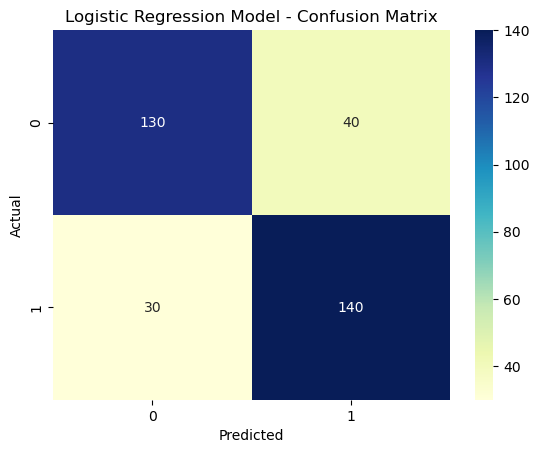

In [111]:
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Logistic Regression Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Training ROC-AUC: 0.8962


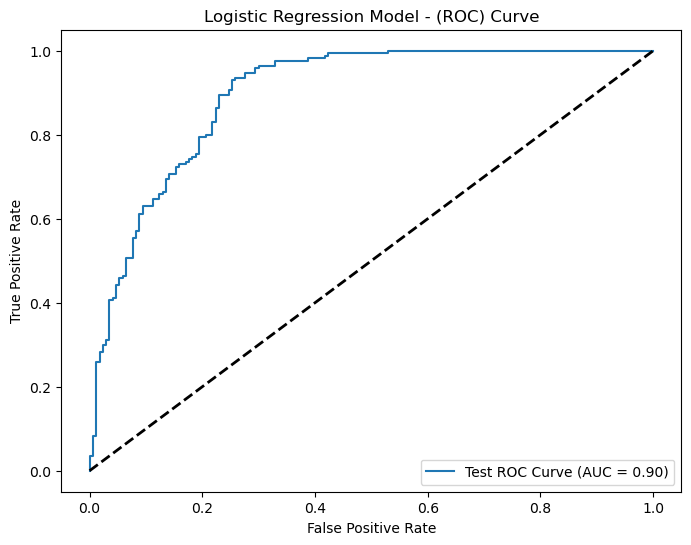

In [112]:
predicted_probs_LR = LR_model.predict_proba(X_train_scaled_LR)[:, 1]  # probability of 1 (outcome)

# Calculate ROC-AUC on the train set
roc_auc_train_LR = roc_auc_score(y_resampled_S, predicted_probs_LR)
print(f"Training ROC-AUC: {roc_auc_train_LR:.4f}")

# Calculate ROC curve on the train set
fpr_LR, tpr_LR, _ = roc_curve(y_resampled_S, predicted_probs_LR)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_LR, tpr_LR, label=f'Test ROC Curve (AUC = {roc_auc_train_LR:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [113]:
# Making predictions on the test set of Logit Regression
y_pred_test_LR = LR_model.predict(X_test_scaled_LR)

# Calculating metrics
accuracy_test_LR = accuracy_score(y_test_S, y_pred_test_LR)
precision_test_LR = precision_score(y_test_S, y_pred_test_LR)
recall_test_LR = recall_score(y_test_S, y_pred_test_LR)
f1_test_LR = f1_score(y_test_S, y_pred_test_LR)
conf_matrix_test_LR = confusion_matrix(y_test_S, y_pred_test_LR)

# Printing the evaluation metrics
print("Logistic Regression Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_LR))
print("Precision: {:.2f}".format(precision_test_LR))
print("Recall (Sensitivity): {:.2f}".format(recall_test_LR))
print("F1 Score: {:.2f}".format(f1_test_LR))
print("Confusion Matrix:")
print(conf_matrix_test_LR)

Logistic Regression Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.84
Precision: 0.65
Recall (Sensitivity): 0.83
F1 Score: 0.73
Confusion Matrix:
[[143  27]
 [ 10  50]]


Test ROC-AUC: 0.8976


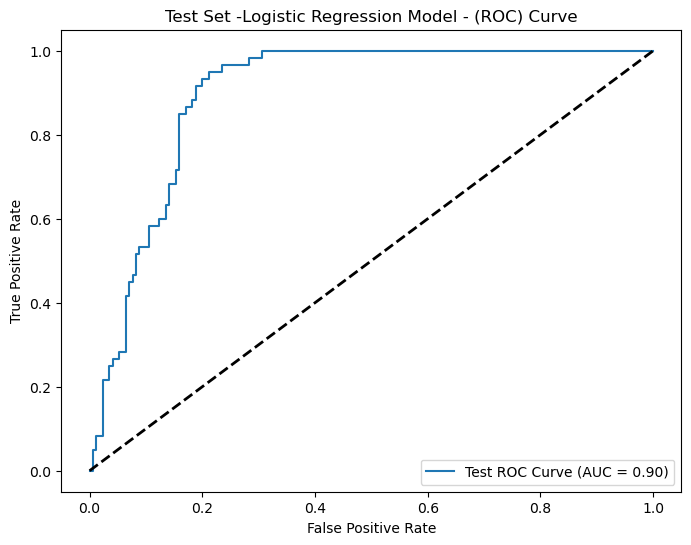

In [114]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_LR = LR_model.predict_proba(X_test_scaled_LR)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_LR = roc_auc_score(y_test_S, predicted_probs_test_LR)
print(f"Test ROC-AUC: {roc_auc_test_LR:.4f}")

# Calculate ROC curve on the test set
fpr_test_LR, tpr_test_LR, _ = roc_curve(y_test_S, predicted_probs_test_LR)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_LR, tpr_test_LR, label=f'Test ROC Curve (AUC = {roc_auc_test_LR:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set -Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [62]:
# Usefull function in Sensitivity Analysis

import copy
from pandas.core.frame import DataFrame
# for sensitivity analysis
def permute_column(matrix, column_index):
    matrix_copied = copy.deepcopy(matrix)
    if isinstance(matrix_copied, DataFrame):
        np.random.shuffle(matrix_copied[matrix_copied.columns[column_index]])
    else: 
        np.random.shuffle(matrix_copied[:,column_index])
    return matrix_copied

def sensitivity_analysis(model, x_test, y_test, features):
    y_test_predicted = model.predict(x_test)
    sensitivity_result = {metric: {} for metric in ["accuracy", "precision", "recall", "f1"]}
    sensitivity_result["accuracy"]["base"] = accuracy_score(y_test, y_test_predicted),
    sensitivity_result["precision"]["base"] = precision_score(y_test, y_test_predicted),
    sensitivity_result["recall"]["base"] = recall_score(y_test, y_test_predicted),
    sensitivity_result["f1"]["base"] = f1_score(y_test, y_test_predicted)
    
    for column_index in range(x_test.shape[1]):
        x_test_permuted = permute_column(x_test, column_index)
        y_test_permutated_predict = model.predict(x_test_permuted)
        column = features[column_index]
        sensitivity_result["accuracy"][column] = [ #main_accuracy, 
                                                        accuracy_score(y_test, y_test_permutated_predict)]
        sensitivity_result["precision"][column] = [ #main_accuracy,
                                                         precision_score(y_test, y_test_permutated_predict)]
        sensitivity_result["recall"][column] = [ #main_accuracy,
                                                      recall_score(y_test, y_test_permutated_predict)]
        sensitivity_result["f1"][column] = [ #main_accuracy,
                                                  f1_score(y_test, y_test_permutated_predict)]
    return sensitivity_result

# recall | f1score
# accuracy | precision 
def draw_sensitivity_result(sensitivity_result):
    fig, axs = plt.subplots(2, 2, figsize=(20, 30))
    draw(sensitivity_result, "accuracy", axs[0,0])
    draw(sensitivity_result, "precision", axs[0,1])
    draw(sensitivity_result, "recall", axs[1,0])
    draw(sensitivity_result, "f1", axs[1,1])

def draw(sensitivity_result, metric, ax):
    plt.figure()
    baseline = sensitivity_result[metric]["base"]
    del sensitivity_result[metric]["base"]
    _data = pd.DataFrame.from_dict(sensitivity_result[metric])
    sns.barplot(data=_data, palette='deep', ax=ax)
    ax.axhline(baseline, color='grey', linestyle='--', linewidth=2)
    ax.set_ylim([0,1])
    ax.set_xlabel('Permutated Columns')
    ax.set_ylabel('Target Metric')
    ax.set_title(metric)
    ax.set_xticklabels(_data, rotation=45)
    ax.grid(axis='y', linewidth=.3)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    

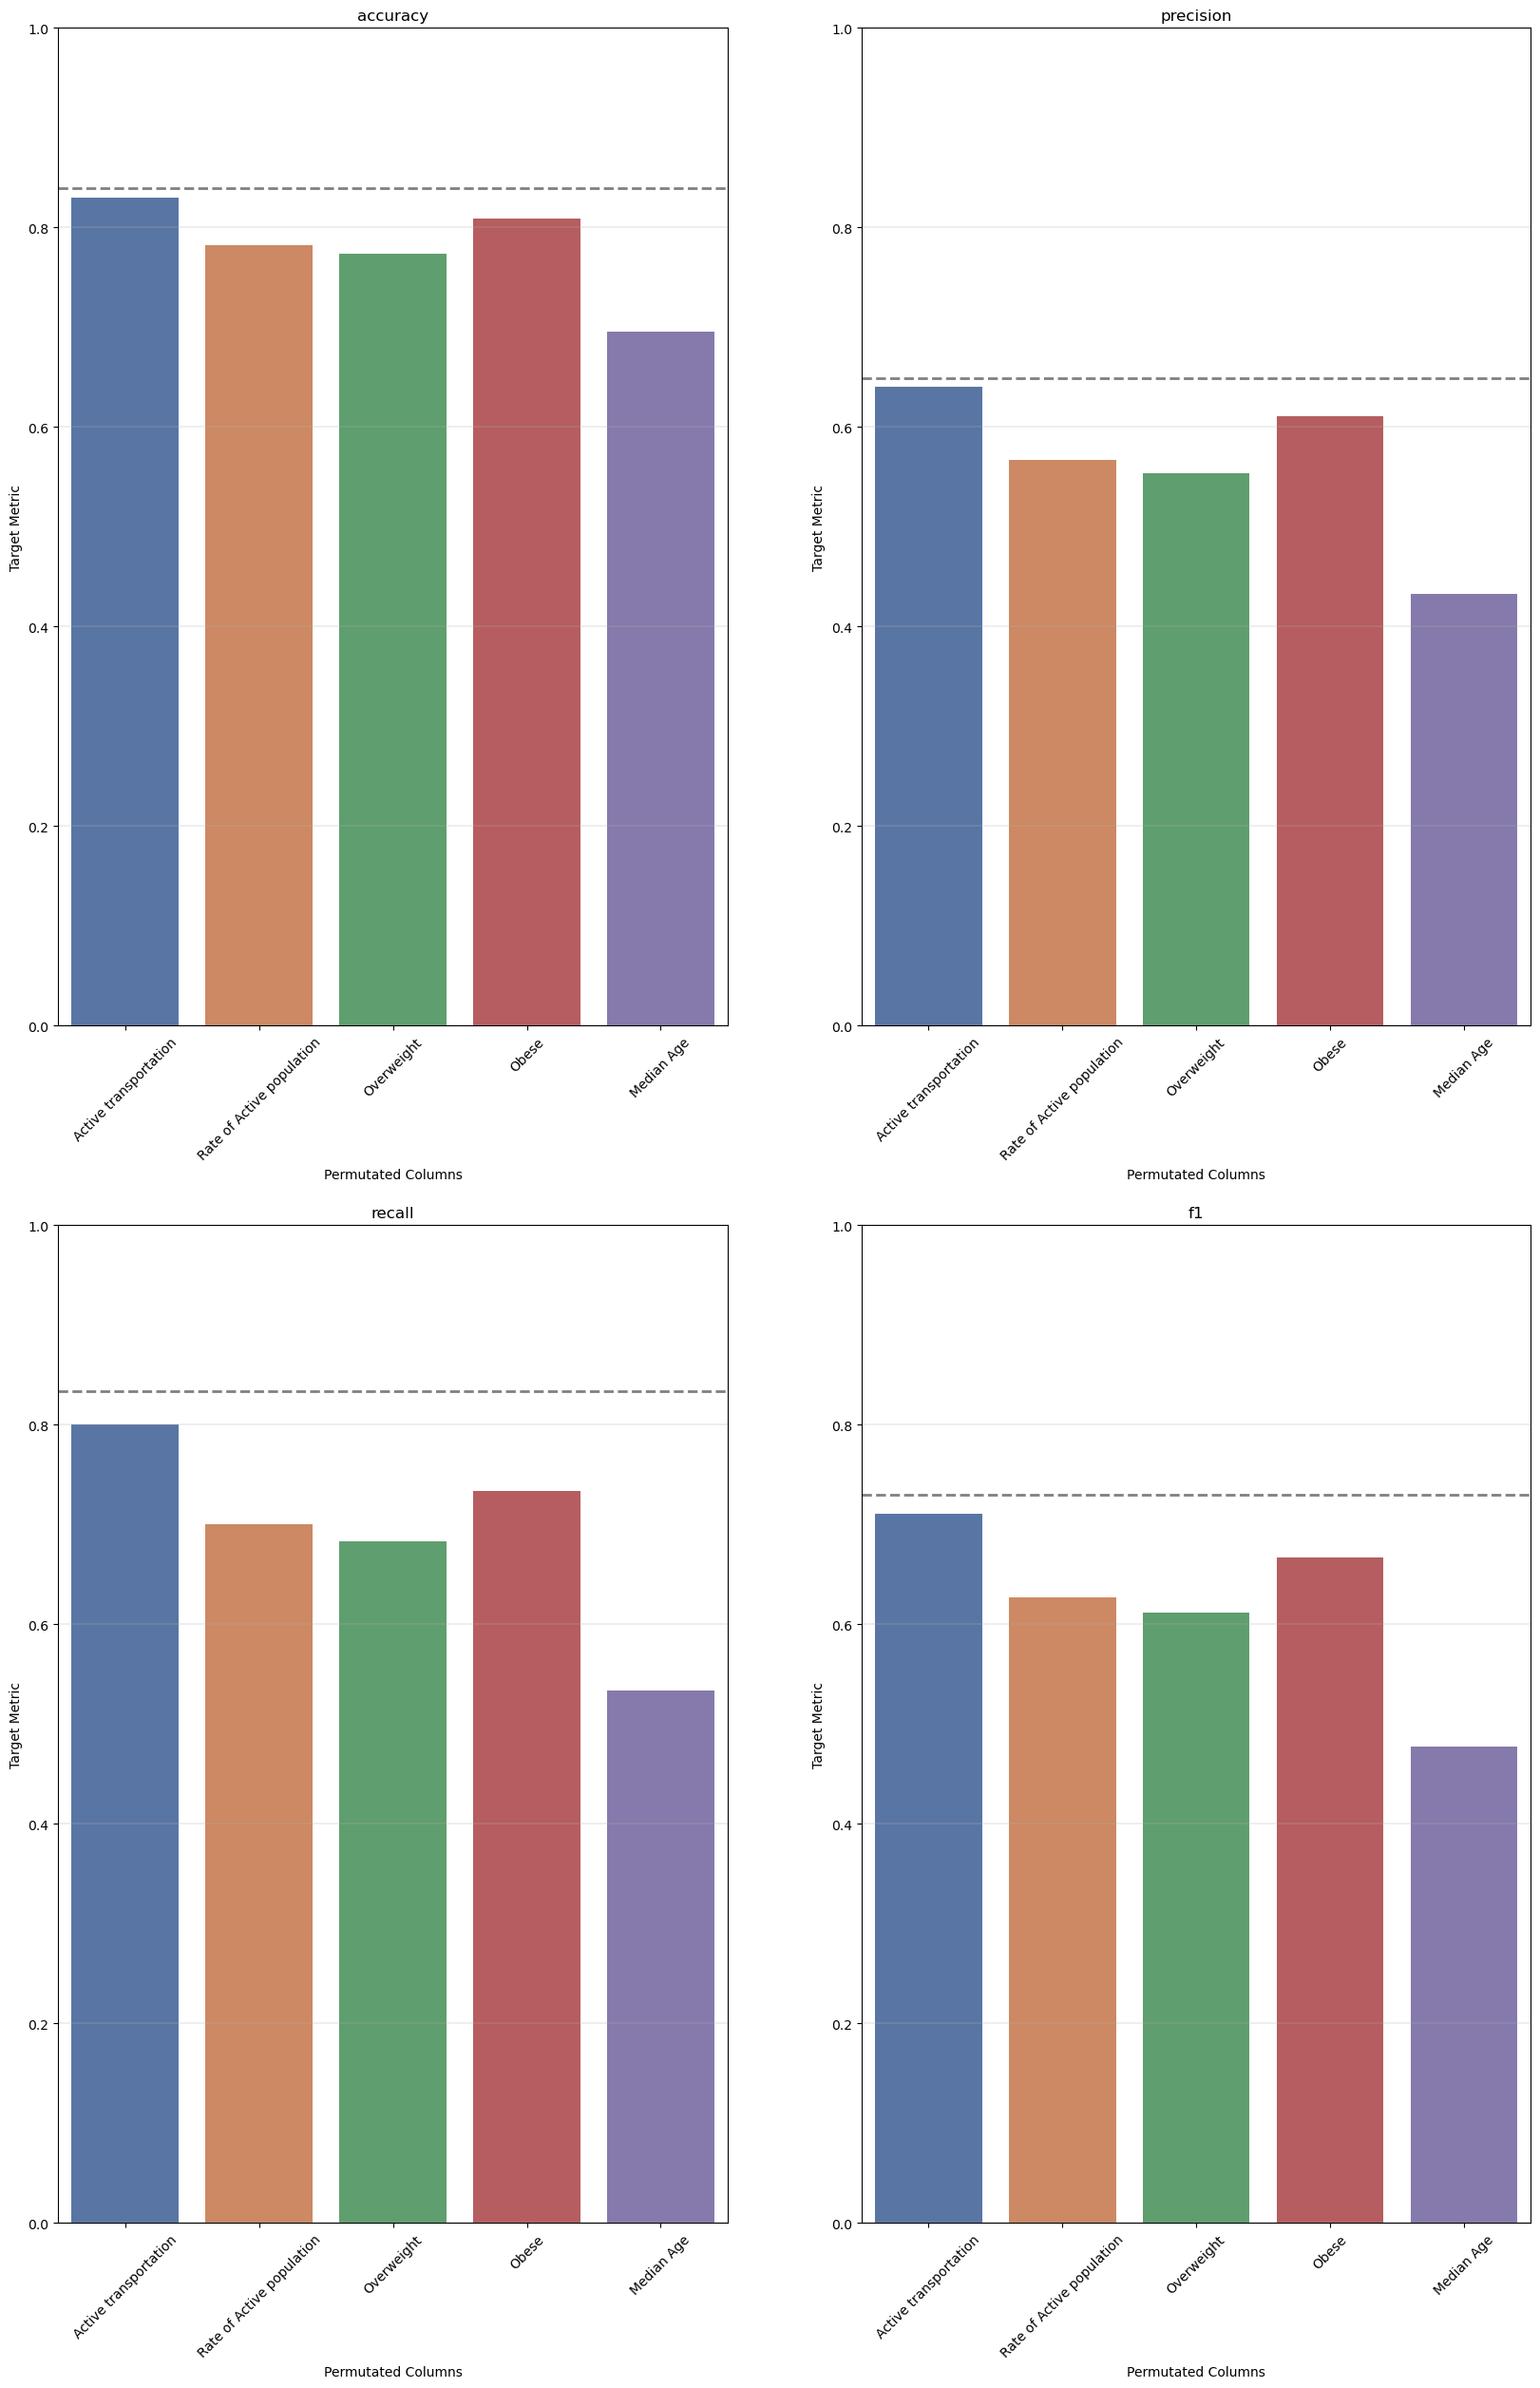

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [116]:
# Sensitivity Analysis
LR_features_short = [
    'Active transportation', # from toronto only
    'Rate of Active population', # in toronto CMA
    'Overweight',
    'Obese',
    'Median Age'
]
# selected_LR_features.tolist()
result = sensitivity_analysis(
    model_for_LogisticRegression, 
    X_test_scaled_LR, 
    y_test_S,
    LR_features_short)
draw_sensitivity_result(result)

In [117]:
# record the best model
best_model_name = "toronto_cma_linear.pkl"
path = os.path.join(os.getcwd(),"models","toronto cma",best_model_name) 
with open(path, 'wb') as file:
    pickle.dump(LR_model, file)

**4.2 KNN model**

In [74]:
# since it is not applicable to apply REFCV to KNNClassifier, we decided to continue with the s
# selected columns extracted in the Logistic Regression Step.

# Initialize the StandardScaler
scaler = StandardScaler()

X_S = DataSimple.drop('Diabetes', axis=1)
y_S = DataSimple['Diabetes']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# Under samling the training data to address imbalance classification issue
rus = RandomUnderSampler()
X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
X_test_S = ct.transform(X_test_S)

#converting numpyarray back to DataFrame
X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())

#Fitting the data
X_train_scaled_KNN = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_KNN = scaler.transform(X_test_S[LR_features])

In [75]:
#Creating a list to store the cross-validation scores for different values of k
k_grid = list(range(1, 21))  # Try k values from 1 to 20, for example
cv_scores = []

In [76]:
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(knn, X_train_scaled_KNN, y_resampled_S, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

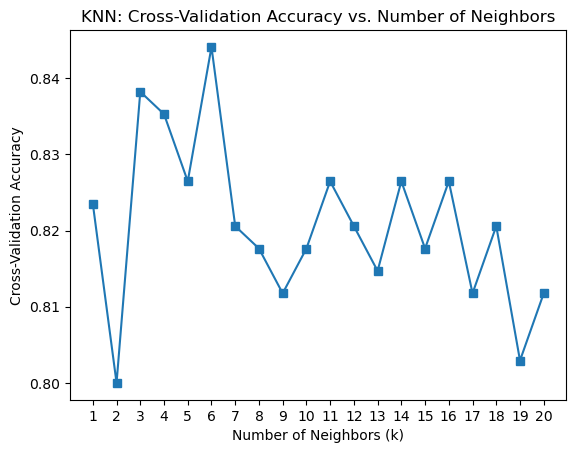

In [77]:
#Plotting the cross-validation scores to identify the optimal K
plt.plot(k_grid, cv_scores, marker = "s")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Cross-Validation Accuracy vs. Number of Neighbors')
plt.xticks(np.arange(min(k_grid), max(k_grid) + 1, 1))
plt.show()


In [78]:
# Print K and the corresponding cross-validation scores
for k, score in zip(k_grid, cv_scores):
    print(f"K = {k}, Cross-Validation Accuracy = {score:.3f}")

K = 1, Cross-Validation Accuracy = 0.824
K = 2, Cross-Validation Accuracy = 0.800
K = 3, Cross-Validation Accuracy = 0.838
K = 4, Cross-Validation Accuracy = 0.835
K = 5, Cross-Validation Accuracy = 0.826
K = 6, Cross-Validation Accuracy = 0.844
K = 7, Cross-Validation Accuracy = 0.821
K = 8, Cross-Validation Accuracy = 0.818
K = 9, Cross-Validation Accuracy = 0.812
K = 10, Cross-Validation Accuracy = 0.818
K = 11, Cross-Validation Accuracy = 0.826
K = 12, Cross-Validation Accuracy = 0.821
K = 13, Cross-Validation Accuracy = 0.815
K = 14, Cross-Validation Accuracy = 0.826
K = 15, Cross-Validation Accuracy = 0.818
K = 16, Cross-Validation Accuracy = 0.826
K = 17, Cross-Validation Accuracy = 0.812
K = 18, Cross-Validation Accuracy = 0.821
K = 19, Cross-Validation Accuracy = 0.803
K = 20, Cross-Validation Accuracy = 0.812


In [79]:
# Grid search
# Initialize an LogisticRegression regressor
knn = KNeighborsClassifier(n_neighbors=6)

# Creating a pipeline that applies the LogisticRegression regressor
model_for_KNN = Pipeline([
    ('knn', knn)
])

# Fitting the model on the training data
model_for_KNN.fit(X_train_scaled_KNN, y_resampled_S)
# Define a dictionary of hyperparameter values to search over.
param_dist_KNN = {
    'knn__metric': ['cityblock', 'manhattan', 'cosine', 'euclidean', 'haversine', 'nan_euclidean', 'l1', 'l2'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform', 'distance'],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_KNN = GridSearchCV(
    model_for_KNN, param_grid=param_dist_KNN, cv=skf)

# Train Grid Search on the training data
random_search_KNN.fit(X_train_scaled_KNN, y_resampled_S)

# Extract results into a DataFrame
results_KNN = pd.DataFrame(random_search_KNN.cv_results_)

# Display the set of parameters that achieved the best score
results_KNN[results_KNN['rank_test_score'] == 1]
random_search_KNN.best_params_


{'knn__algorithm': 'auto', 'knn__metric': 'cosine', 'knn__weights': 'distance'}

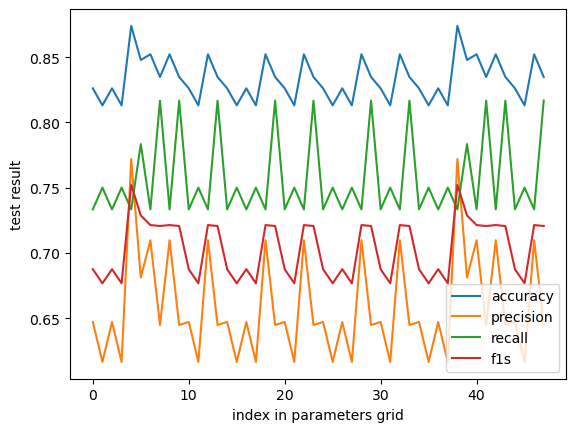

Best Configs: 
{'knn__algorithm': 'auto', 'knn__metric': 'cosine', 'knn__weights': 'uniform'}


{'knn__algorithm': 'brute', 'knn__metric': 'cosine', 'knn__weights': 'uniform'}




In [80]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                knn__metric=param_config["knn__metric"], 
                knn__algorithm=param_config["knn__algorithm"], 
                knn__weights=param_config["knn__weights"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)  

        except:
            pass
        
    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_KNN
model = model_for_KNN

x_train = X_train_scaled_KNN
y_train = y_resampled_S
x_test = X_test_scaled_KNN
y_test = y_test_S

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]
    
    model = model.set_params(
        knn__metric=param_config["knn__metric"], 
        knn__algorithm=param_config["knn__algorithm"], 
        knn__weights=param_config["knn__weights"], 
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1) 


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [81]:
# select one of the best configs

best_config = the_bests[0]
model_for_KNN = model_for_KNN.set_params(
    knn__metric=best_config["knn__metric"], 
    knn__algorithm=best_config["knn__algorithm"], 
    knn__weights=best_config["knn__weights"], 
)

# Refit the model using the training data
knn = model_for_KNN.fit(X_train_scaled_KNN, y_resampled_S)

In [82]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_knn_model = cross_val_predict(knn, X_train_scaled_KNN, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_knn = confusion_matrix(y_resampled_S, predicted_labels_knn_model)

# Calculate the full classification report
class_report_knn = classification_report(y_resampled_S, predicted_labels_knn_model)

# Calculate accuracy
accuracy_knn = accuracy_score(y_resampled_S, predicted_labels_knn_model)

# Calculate precision
precision_knn = precision_score(y_resampled_S, predicted_labels_knn_model)

# Calculate recall
recall_knn = recall_score(y_resampled_S, predicted_labels_knn_model)

# Calculate F1 score
f1_knn = f1_score(y_resampled_S, predicted_labels_knn_model)


# Print the full confusion matrix and classification report
print("KNN Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_knn)
print("B. Classification Report:")
print(class_report_knn)
print("C. Accuracy: {:.2f}".format(accuracy_knn))
print("D. Precision: {:.2f}".format(precision_knn))
print("E. Recall (Sensitivity): {:.2f}".format(recall_knn))
print("F. F1 Score: {:.2f}".format(f1_knn))

KNN Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[147  23]
 [ 23 147]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       170
           1       0.86      0.86      0.86       170

    accuracy                           0.86       340
   macro avg       0.86      0.86      0.86       340
weighted avg       0.86      0.86      0.86       340

C. Accuracy: 0.86
D. Precision: 0.86
E. Recall (Sensitivity): 0.86
F. F1 Score: 0.86


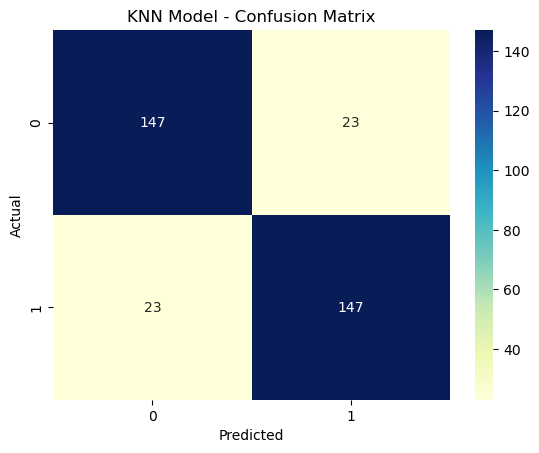

In [83]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='YlGnBu')
plt.title('KNN Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Training ROC-AUC: 0.9694


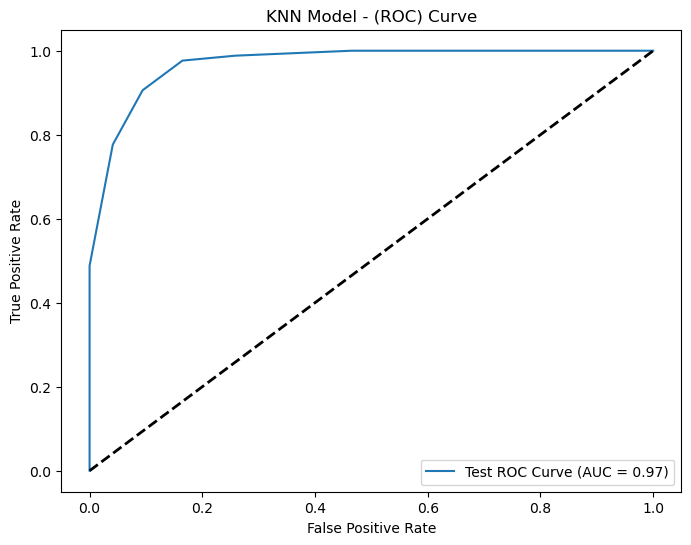

In [84]:
predicted_probs_knn = knn.predict_proba(X_train_scaled_KNN)[:, 1]

# Calculate ROC-AUC on the train set
roc_auc_knn = roc_auc_score(y_resampled_S, predicted_probs_knn)
print(f"Training ROC-AUC: {roc_auc_knn:.4f}")

# Calculate ROC curve on the train set
fpr_knn, tpr_knn, _ = roc_curve(y_resampled_S, predicted_probs_knn)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'Test ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [85]:
# Making predictions on the test set of Logit Regression
y_pred_test_knn = knn.predict(X_test_scaled_KNN)

# Calculating metrics
accuracy_test_knn = accuracy_score(y_test_S, y_pred_test_knn)
precision_test_knn = precision_score(y_test_S, y_pred_test_knn)
recall_test_knn = recall_score(y_test_S, y_pred_test_knn)
f1_test_knn = f1_score(y_test_S, y_pred_test_knn)
conf_matrix_test_knn = confusion_matrix(y_test_S, y_pred_test_knn)

# Printing the evaluation metrics
print("Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_knn))
print("Precision: {:.2f}".format(precision_test_knn))
print("Recall (Sensitivity): {:.2f}".format(recall_test_knn))
print("F1 Score: {:.2f}".format(f1_test_knn))
print("Confusion Matrix:")
print(conf_matrix_test_knn)

Test Set- Confusion Matrix/Classification Report
Accuracy: 0.87
Precision: 0.77
Recall (Sensitivity): 0.73
F1 Score: 0.75
Confusion Matrix:
[[157  13]
 [ 16  44]]


Test ROC-AUC: 0.9106


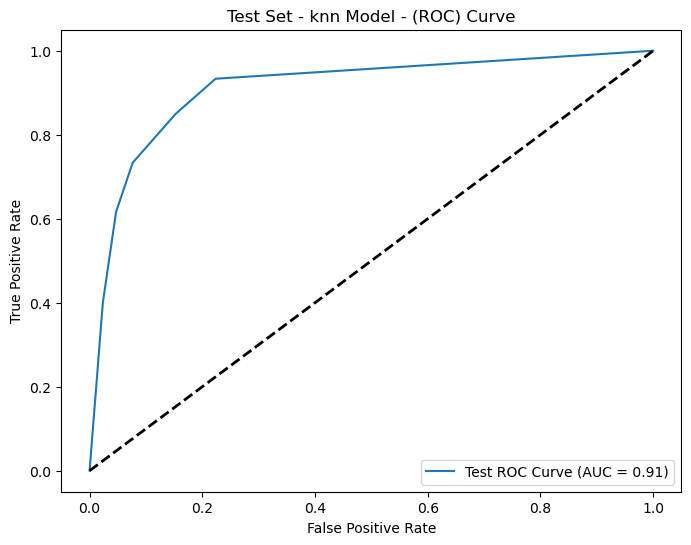

In [86]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_knn = knn.predict_proba(X_test_scaled_KNN)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_knn = roc_auc_score(y_test_S, predicted_probs_test_knn)
print(f"Test ROC-AUC: {roc_auc_test_knn:.4f}")

# Calculate ROC curve on the test set
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test_S, predicted_probs_test_knn)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_knn, tpr_test_knn, label=f'Test ROC Curve (AUC = {roc_auc_test_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - knn Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

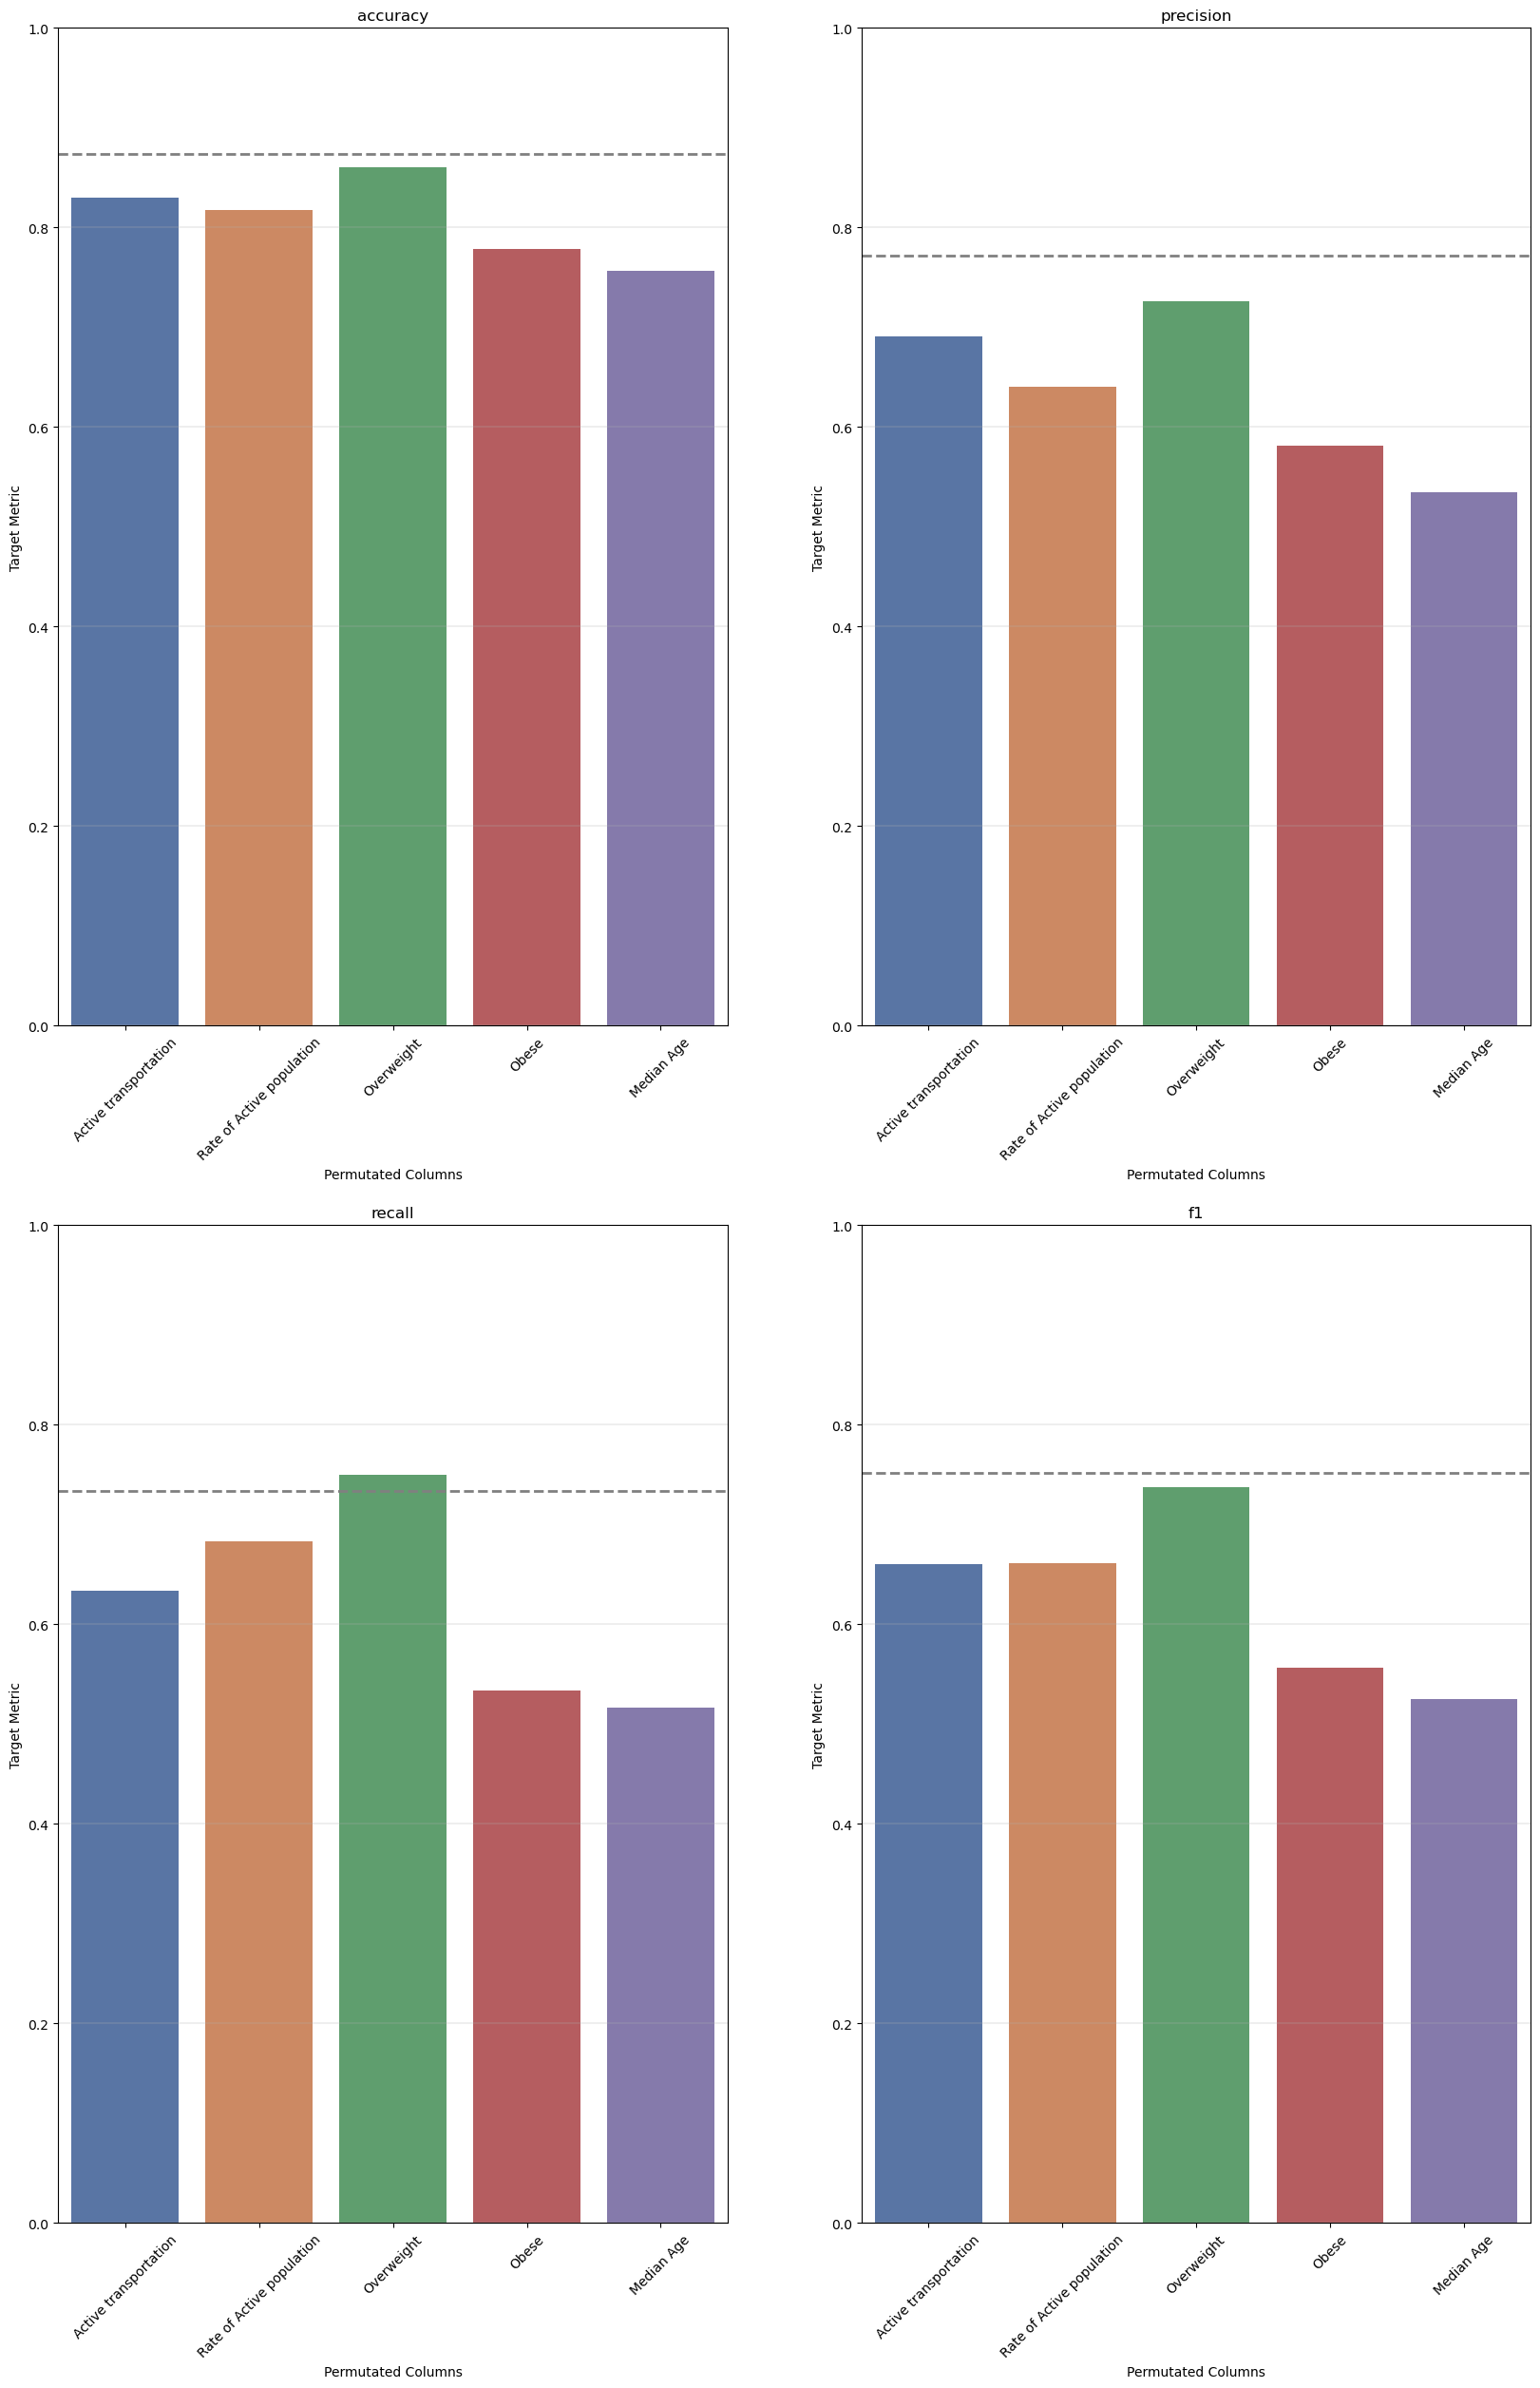

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [127]:
# Sensitivity Analysis
KNN_features_short = [
    'Active transportation', # from toronto only
    'Rate of Active population', # in toronto CMA
    'Overweight',
    'Obese',
    'Median Age'
]
result = sensitivity_analysis(
    model_for_KNN, 
    X_test_scaled_KNN, 
    y_test_S,
    KNN_features_short)
draw_sensitivity_result(result)

In [87]:
# record the best model
best_model_name = "toronto_cma_knn.pkl"
path = os.path.join(os.getcwd(),"models","toronto cma",best_model_name) 
with open(path, 'wb') as file:
    pickle.dump(model_for_KNN, file)

**4.3 MLP(NN) model**

In [81]:
# since it is not applicable to apply REFCV to MLPClassifier, we decided to continue with the s
# selected columns extracted in the Logistic Regression Step.

# Initialize the StandardScaler
scaler = StandardScaler()

X_S = DataSimple.drop('Diabetes', axis=1)
y_S = DataSimple['Diabetes']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# Under samling the training data to address imbalance classification issue
rus = RandomUnderSampler()
X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
X_test_S = ct.transform(X_test_S)

#converting numpyarray back to DataFrame
X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())


In [82]:
X_test_S.columns

Index(['one_hot_encoder__Residential Instability quintiles_1',
       'one_hot_encoder__Residential Instability quintiles_2',
       'one_hot_encoder__Residential Instability quintiles_3',
       'one_hot_encoder__Residential Instability quintiles_4',
       'one_hot_encoder__Residential Instability quintiles_5',
       'one_hot_encoder__Material Deprivation quintiles_1',
       'one_hot_encoder__Material Deprivation quintiles_2',
       'one_hot_encoder__Material Deprivation quintiles_3',
       'one_hot_encoder__Material Deprivation quintiles_4',
       'one_hot_encoder__Material Deprivation quintiles_5',
       'one_hot_encoder__Ethnic Concentration quintiles_1',
       'one_hot_encoder__Ethnic Concentration quintiles_2',
       'one_hot_encoder__Ethnic Concentration quintiles_3',
       'one_hot_encoder__Ethnic Concentration quintiles_4',
       'one_hot_encoder__Ethnic Concentration quintiles_5',
       'remainder__Mental Health Score', 'remainder__Mental Health Binary',
       'r

In [83]:
MLP_features = [
    'remainder__Rate of Daily Smokers', 
    'remainder__log_median_age', 
    'remainder__Visible Minority Rate',
    'remainder__Active transportation',
    'remainder__Rate of Active population', 
    'remainder__Overweight',
    'remainder__Obese',
    
    # newly added
    'remainder__Work Stress Score',
    'remainder__Mental Health Score',
]

#Fitting the data
X_train_scaled_MLP = scaler.fit_transform(X_resampled_S[MLP_features])

X_test_scaled_MLP = scaler.transform(X_test_S[MLP_features])

In [94]:
# SHAP analysis 
import pickle
import shap

features = [
    'Rate of Daily Smokers', 
    'Median Age', 
    'Visible Minority Rate',
    'Active transportation',
    'Rate of Active population', 
    'Overweight',
    'Obese',
    
    # newly added
    'Mental Health Score',
    'Work Stress Score'
]

loaded_model = pickle.load(open("./models/toronto cma/2nd_mhs_wss_toronto_cma_mlp.pkl", 'rb'))

X_train = X_train_scaled_MLP 
X_test = X_test_scaled_MLP

In [95]:
explainer = shap.KernelExplainer(loaded_model.predict, X_train, feature_names=features)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)
# Waterfall plot for the first observation
shap.initjs()

Using 340 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/230 [00:00<?, ?it/s]

178


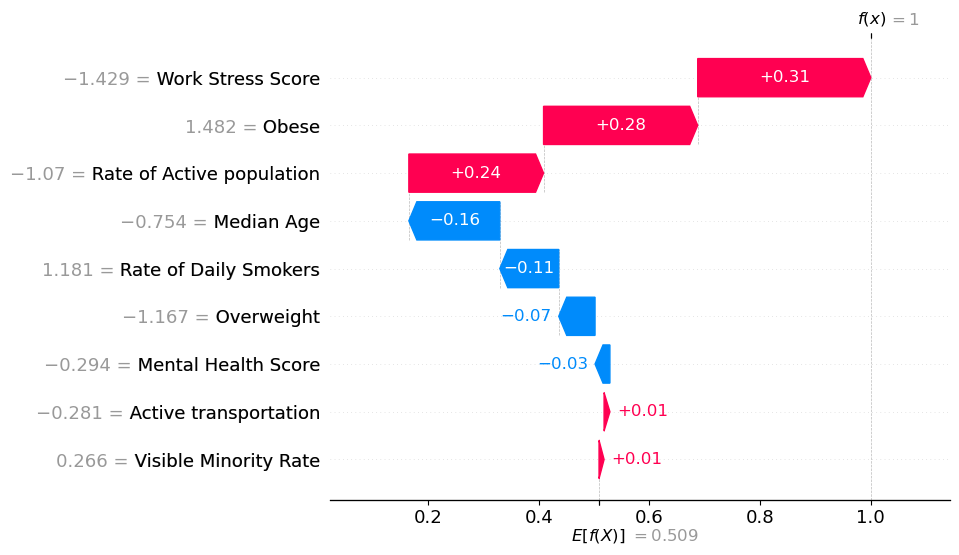

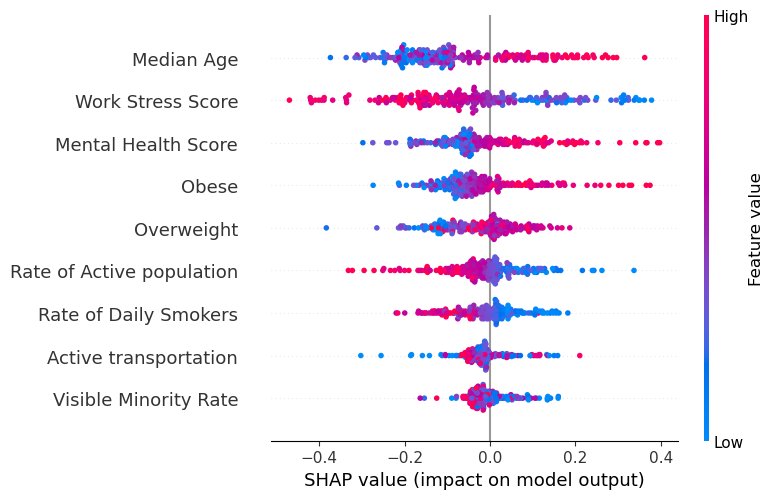

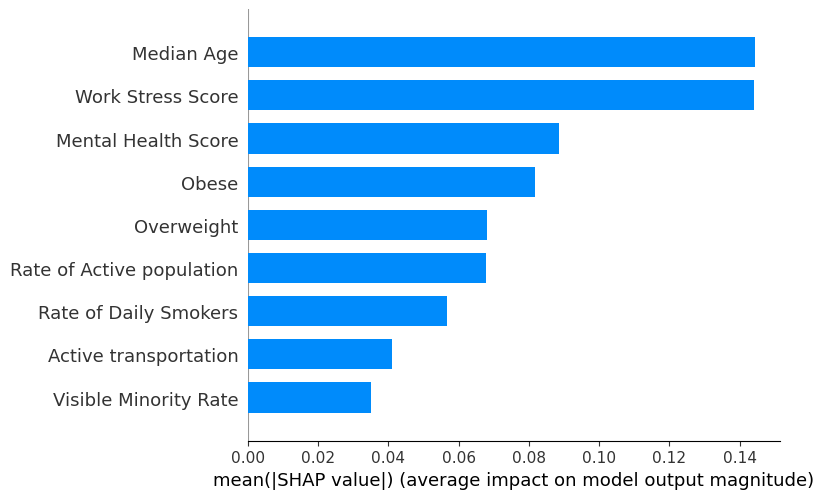

In [96]:
import random
index = random.randint(0, len(shap_values) - 1)
print(index)
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[index],
        base_values=explainer.expected_value,
        data=X_test[index],
        feature_names=features),
    max_display=10)
plt.show()

# Mean SHAP Plot:
shap.summary_plot(shap_values, X_test, feature_names=features)

# Beeswarm Plot:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features)

In [84]:
# Initialize an SVM classifier
MLP = MLPClassifier()


# Creating a pipeline that applies the Decision Tree classifier
model_for_MLP = Pipeline([
    ('mlp', MLP)
])

# Fitting the model on the training data
model_for_MLP.fit(X_train_scaled_MLP, y_resampled_S)

# Define a dictionary of hyperparameter values to search over.
param_dist_MLP = {
    'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__hidden_layer_sizes': list(product([16,32,64,128], [16,32,64,128]))
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_MLP = GridSearchCV(
    model_for_MLP, param_grid=param_dist_MLP, cv=skf)

# Train Grid Search on the training data
random_search_MLP.fit(X_train_scaled_MLP, y_resampled_S)

# Extract results into a DataFrame
results_MLP = pd.DataFrame(random_search_MLP.cv_results_)

# Display the set of parameters that achieved the best score
results_MLP[results_MLP['rank_test_score'] == 1]
random_search_MLP.best_params_

{'mlp__activation': 'relu',
 'mlp__hidden_layer_sizes': (128, 128),
 'mlp__solver': 'adam'}

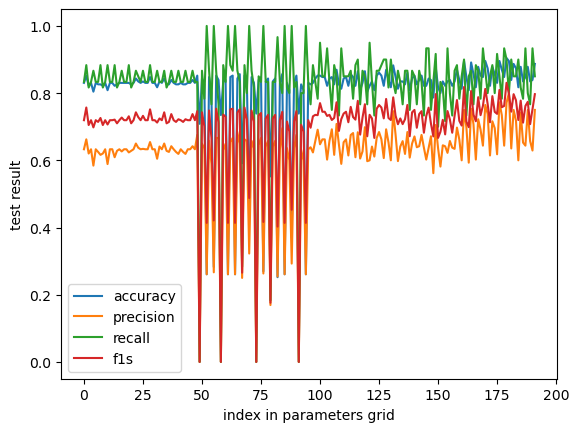

Best Configs: 
{'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (64, 128), 'mlp__solver': 'adam'}




In [85]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                mlp__activation=param_config["mlp__activation"], 
                mlp__hidden_layer_sizes=param_config["mlp__hidden_layer_sizes"], 
                mlp__solver=param_config["mlp__solver"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)  

        except:
            pass
        
    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_MLP
model = model_for_MLP

x_train = X_train_scaled_MLP
y_train = y_resampled_S
x_test = X_test_scaled_MLP
y_test = y_test_S

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]
    
    model = model.set_params(
        mlp__activation=param_config["mlp__activation"], 
        mlp__hidden_layer_sizes=param_config["mlp__hidden_layer_sizes"], 
        mlp__solver=param_config["mlp__solver"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1) 


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [86]:
best_config = the_bests[0]

model_for_MLP = model_for_MLP.set_params(
    mlp__activation=best_config["mlp__activation"], 
    mlp__hidden_layer_sizes=best_config["mlp__hidden_layer_sizes"], 
    mlp__solver=best_config["mlp__solver"]
)

# Refit the model using the training data
model_for_MLP.fit(X_train_scaled_MLP, y_resampled_S)

Pipeline(steps=[('mlp', MLPClassifier(hidden_layer_sizes=(64, 128)))])

In [87]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_MLP_model = cross_val_predict(model_for_MLP, X_train_scaled_MLP, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_MLP = confusion_matrix(y_resampled_S, predicted_labels_MLP_model)

# Calculate the full classification report
class_report_MLP = classification_report(y_resampled_S, predicted_labels_MLP_model)

# Calculate accuracy
accuracy_MLP = accuracy_score(y_resampled_S, predicted_labels_MLP_model)

# Calculate precision
precision_MLP = precision_score(y_resampled_S, predicted_labels_MLP_model)

# Calculate recall
recall_MLP = recall_score(y_resampled_S, predicted_labels_MLP_model)

# Calculate F1 score
f1_MLP = f1_score(y_resampled_S, predicted_labels_MLP_model)


# Print the full confusion matrix and classification report
print("MLP Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_MLP)
print("B. Classification Report:")
print(class_report_MLP)
print("C. Accuracy: {:.2f}".format(accuracy_MLP))
print("D. Precision: {:.2f}".format(precision_MLP))
print("E. Recall (Sensitivity): {:.2f}".format(recall_MLP))
print("F. F1 Score: {:.2f}".format(f1_MLP))

MLP Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[148  22]
 [ 14 156]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       170
           1       0.88      0.92      0.90       170

    accuracy                           0.89       340
   macro avg       0.89      0.89      0.89       340
weighted avg       0.89      0.89      0.89       340

C. Accuracy: 0.89
D. Precision: 0.88
E. Recall (Sensitivity): 0.92
F. F1 Score: 0.90


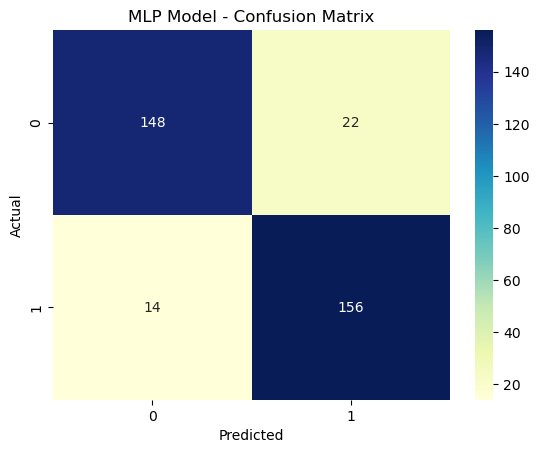

In [88]:
sns.heatmap(conf_matrix_MLP, annot=True, fmt='d', cmap='YlGnBu')
plt.title('MLP Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Training ROC-AUC: 0.9993


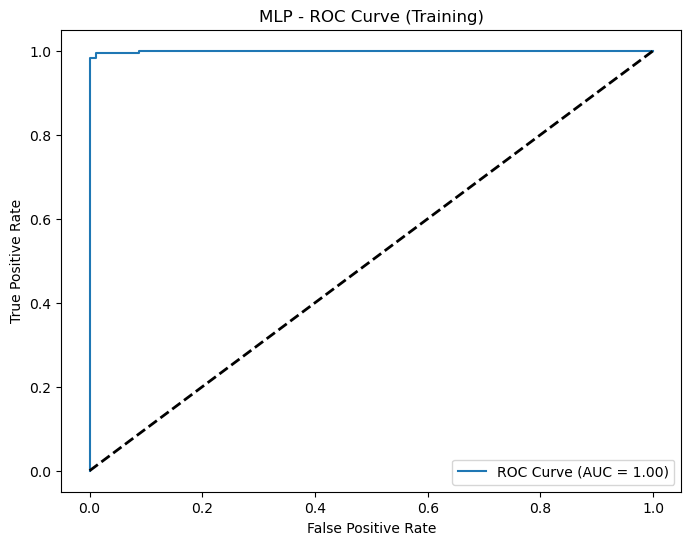

In [89]:
predicted_probs_MLP = model_for_MLP.predict_proba(X_train_scaled_MLP)[:, 1]

# Calculate ROC-AUC on the training set
roc_auc_train_MLP = roc_auc_score(y_resampled_S, predicted_probs_MLP)
print(f"Training ROC-AUC: {roc_auc_train_MLP:.4f}")

# Calculate ROC curve on the training set
fpr_MLP, tpr_MLP, _ = roc_curve(y_resampled_S, predicted_probs_MLP)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_MLP, tpr_MLP, label=f'ROC Curve (AUC = {roc_auc_train_MLP:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - ROC Curve (Training)')
plt.legend(loc='lower right')
plt.show()

In [90]:
# Making predictions on the test set of the MLP model
y_pred_test_MLP = model_for_MLP.predict(X_test_scaled_MLP)

# Calculating metrics
accuracy_test_MLP = accuracy_score(y_test_S, y_pred_test_MLP)
precision_test_MLP = precision_score(y_test_S, y_pred_test_MLP)
recall_test_MLP = recall_score(y_test_S, y_pred_test_MLP)
f1_test_MLP = f1_score(y_test_S, y_pred_test_MLP)
conf_matrix_test_MLP = confusion_matrix(y_test_S, y_pred_test_MLP)

# Printing the evaluation metrics
print("MLP Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_MLP))
print("Precision: {:.2f}".format(precision_test_MLP))
print("Recall (Sensitivity): {:.2f}".format(recall_test_MLP))
print("F1 Score: {:.2f}".format(f1_test_MLP))
print("Confusion Matrix:")
print(conf_matrix_test_MLP)

MLP Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.87
Precision: 0.72
Recall (Sensitivity): 0.80
F1 Score: 0.76
Confusion Matrix:
[[151  19]
 [ 12  48]]


Test ROC-AUC: 0.9373


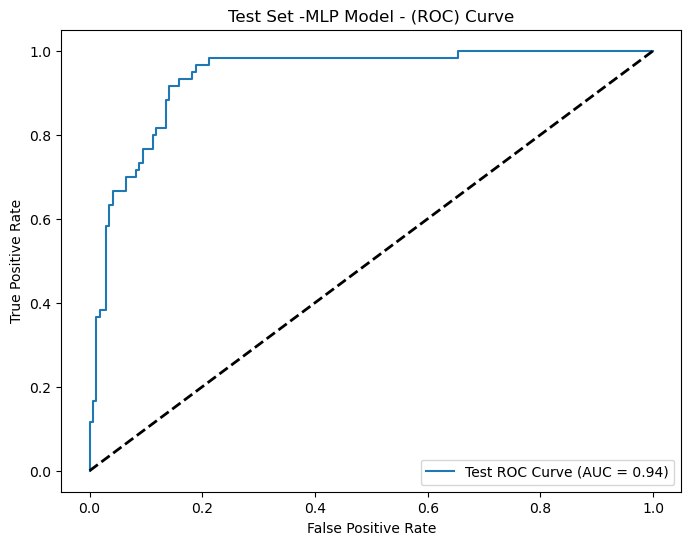

In [91]:
# Making predictions on the test set of MLP Regression
predicted_probs_test_MLP = model_for_MLP.predict_proba(X_test_scaled_MLP)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_MLP = roc_auc_score(y_test_S, predicted_probs_test_MLP)
print(f"Test ROC-AUC: {roc_auc_test_MLP:.4f}")

# Calculate ROC curve on the test set
fpr_test_MLP, tpr_test_MLP, _ = roc_curve(y_test_S, predicted_probs_test_MLP)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_MLP, tpr_test_MLP, label=f'Test ROC Curve (AUC = {roc_auc_test_MLP:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set -MLP Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

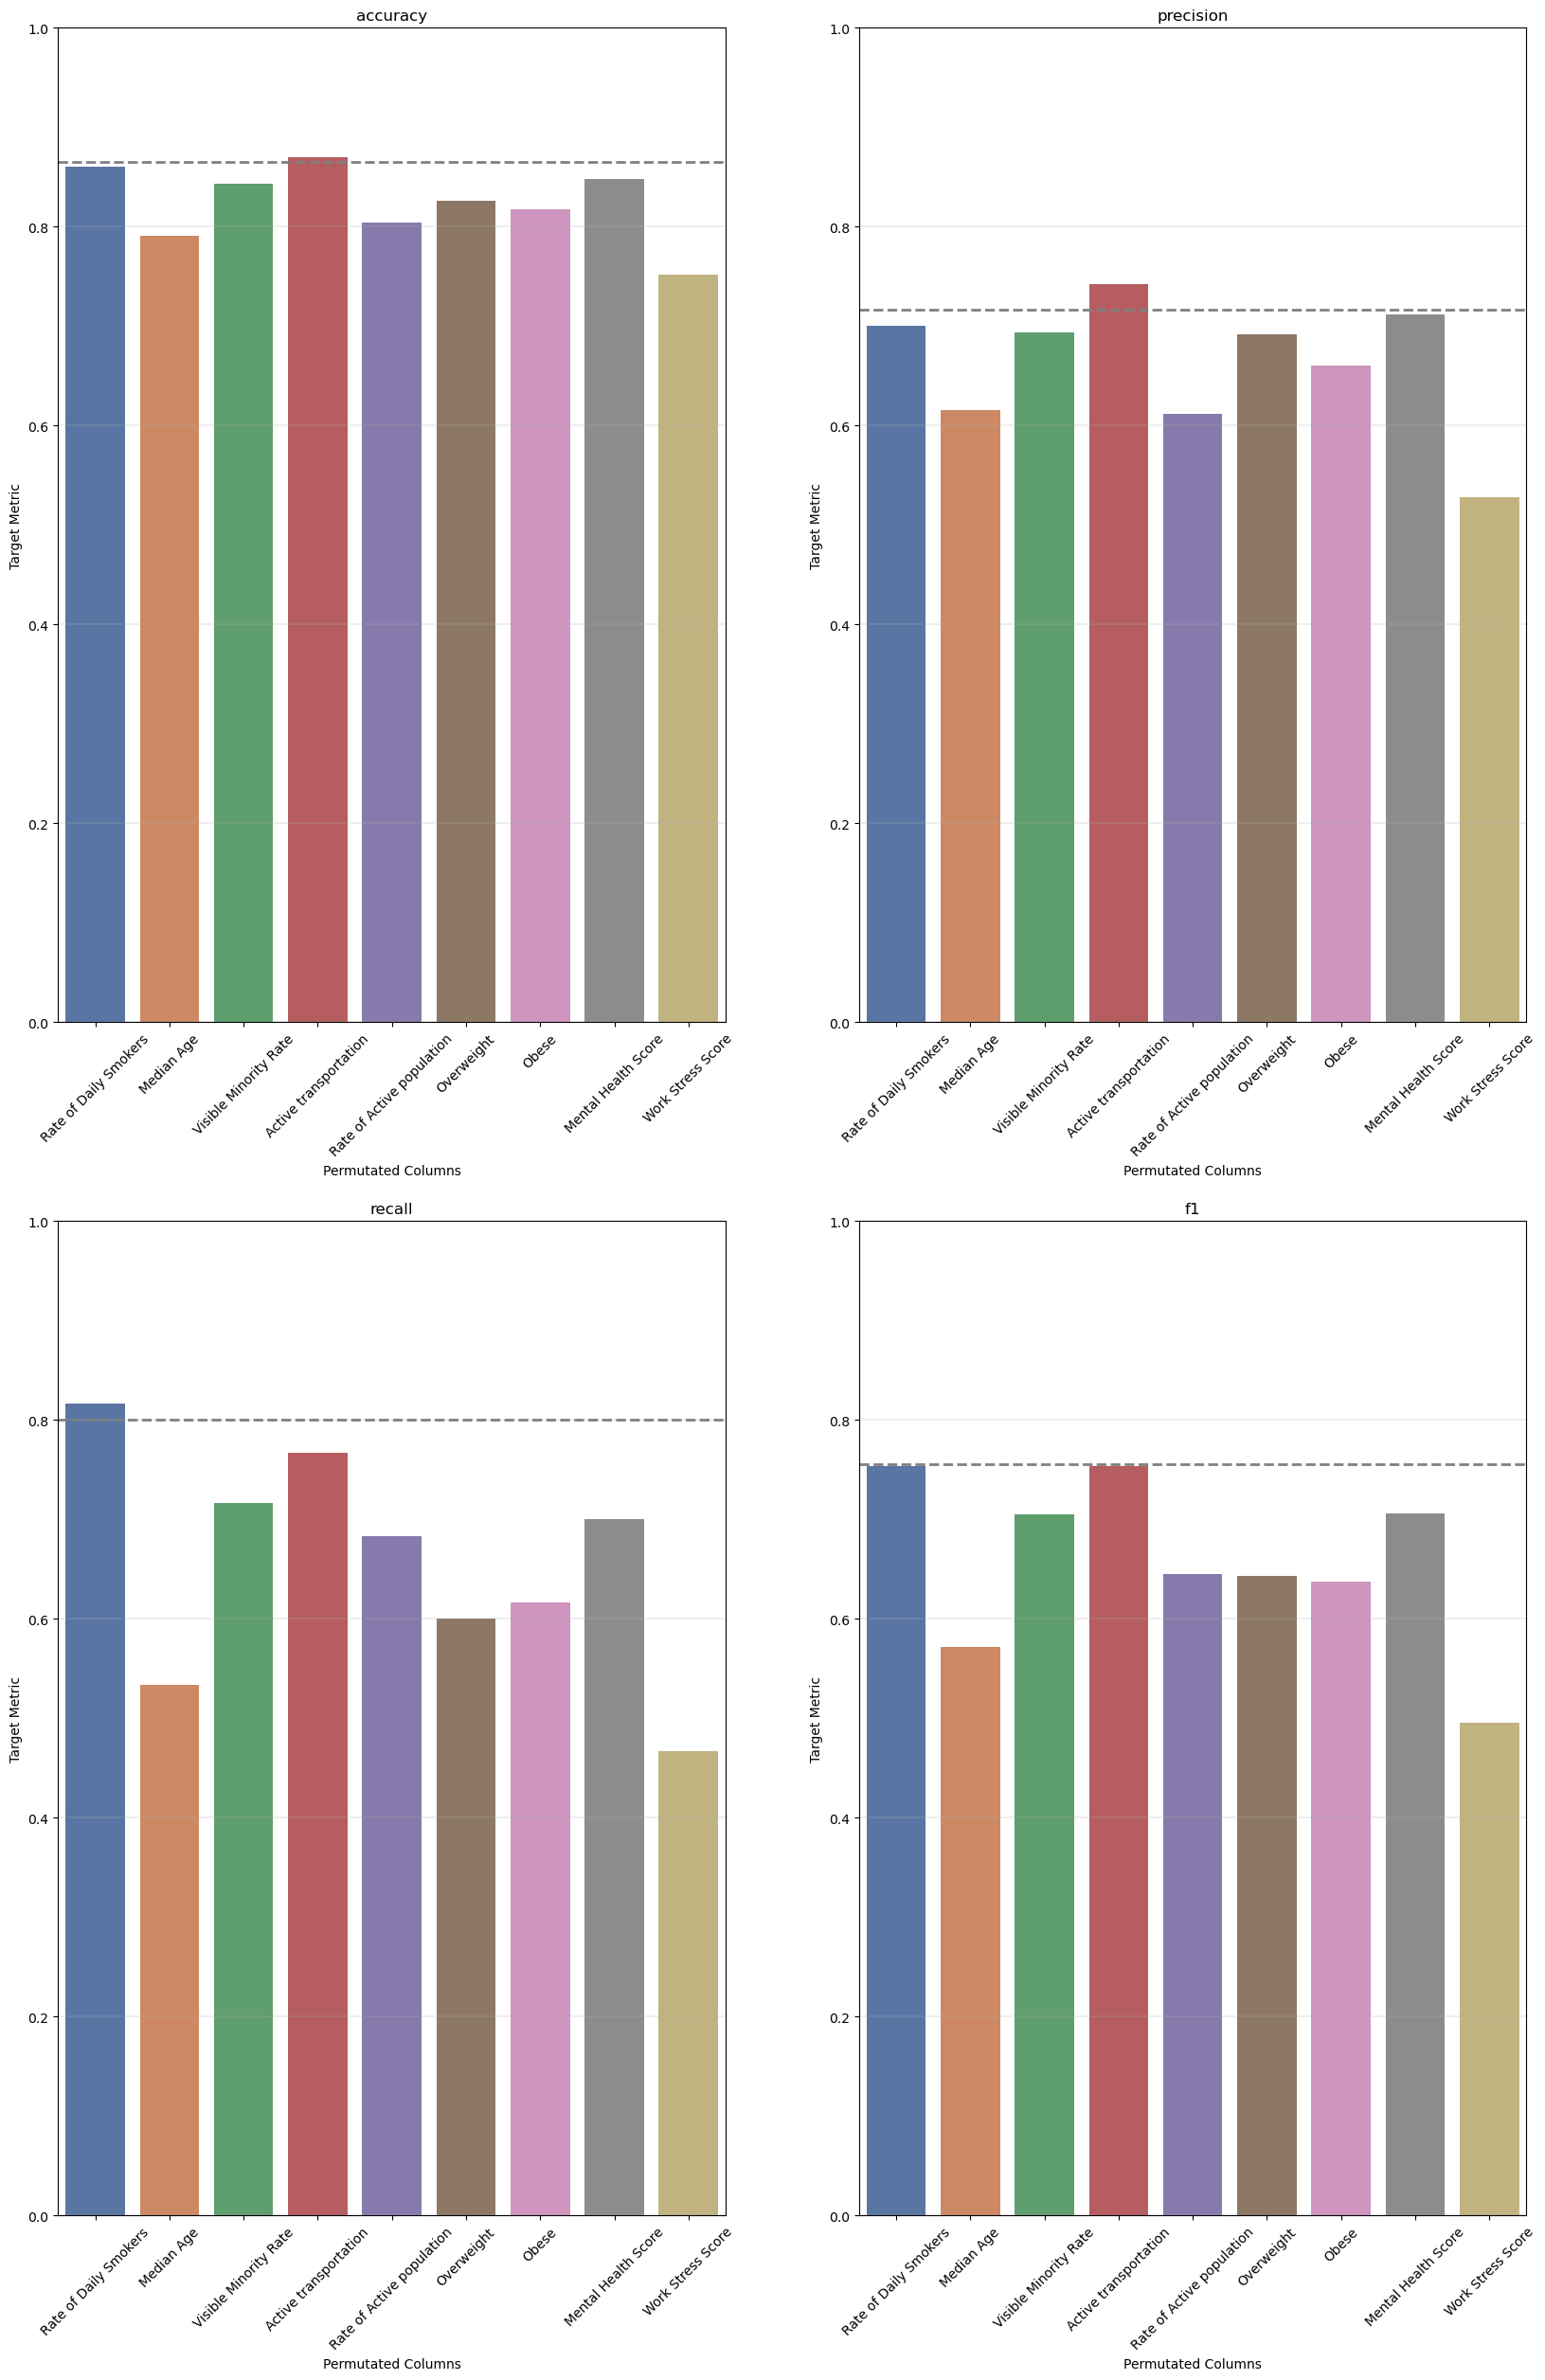

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [110]:
# Sensitivity Analysis
MLP_features_short = [
    'Rate of Daily Smokers',
    'Median Age', 
    'Visible Minority Rate',
    'Active transportation',
    'Rate of Active population', 
    'Overweight',
    'Obese',
    
    # Newly Added
    'Mental Health Score',
    'Work Stress Score'
]

result = sensitivity_analysis(
    model_for_MLP, 
    X_test_scaled_MLP,
    y_test_S,
    MLP_features_short)
draw_sensitivity_result(result)

In [93]:
# record the best model
best_model_name = "2nd_mhs_wss_toronto_cma_mlp.pkl"
path = os.path.join(os.getcwd(),"models","toronto cma",best_model_name) 
with open(path, 'wb') as file:
    pickle.dump(model_for_MLP, file)

**4.3 SVM Model**

In [137]:
from imblearn.under_sampling import RandomUnderSampler

In [138]:
# after many runs, we concluded the most important features are as below:

LR_features = [
    'remainder__Active transportation', # from toronto only
    'remainder__Rate of Active population', # in toronto CMA
    'remainder__Overweight',
    'remainder__Obese',
    'remainder__log_median_age',
    
    # newly added
    'remainder__Work Stress Score',
    'remainder__Mental Health Score',
]
# selected_LR_features.tolist()

In [139]:
# since it is not applicable to apply REFCV to SVC, we decided to continue with the s
# selected columns extracted in the Logistic Regression Step.

# Initialize the StandardScaler
scaler = StandardScaler()

X_S = DataSimple.drop('Diabetes', axis=1)
y_S = DataSimple['Diabetes']

# Split the data into training and test sets
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.2, random_state=42)

# Under samling the training data to address imbalance classification issue
rus = RandomUnderSampler()
X_resampled_S, y_resampled_S = rus.fit_resample(X_train_S, y_train_S)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled_S = ct.fit_transform(X_resampled_S, y_resampled_S)
X_test_S = ct.transform(X_test_S)

#converting numpyarray back to DataFrame
X_resampled_S = pd.DataFrame(X_resampled_S, columns=ct.get_feature_names_out())
X_test_S = pd.DataFrame(X_test_S, columns=ct.get_feature_names_out())

#Fitting the data
X_train_scaled_SVM = scaler.fit_transform(X_resampled_S[LR_features])
X_test_scaled_SVM = scaler.transform(X_test_S[LR_features])

In [129]:
# ! pip install shap

In [150]:
# SHAP analysis 
import pickle
import shap

features = [
    'Active transportation', # from toronto only
    'Rate of Active population', # in toronto CMA
    'Overweight',
    'Obese',
    'Median Age',
    
    # newly added
    'Work Stress Score',
    'Mental Health Score',
]

loaded_model = pickle.load(open("./models/toronto cma/2nd_mhs_wss_toronto_cma_svm.pkl", 'rb'))

X_train = X_train_scaled_SVM
X_test = X_test_scaled_SVM

In [151]:
explainer = shap.KernelExplainer(loaded_model.predict, X_train)
explainer.feature_names = features
shap_values = explainer.shap_values(X_test) 
shap.initjs()

Using 340 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/230 [00:00<?, ?it/s]

174


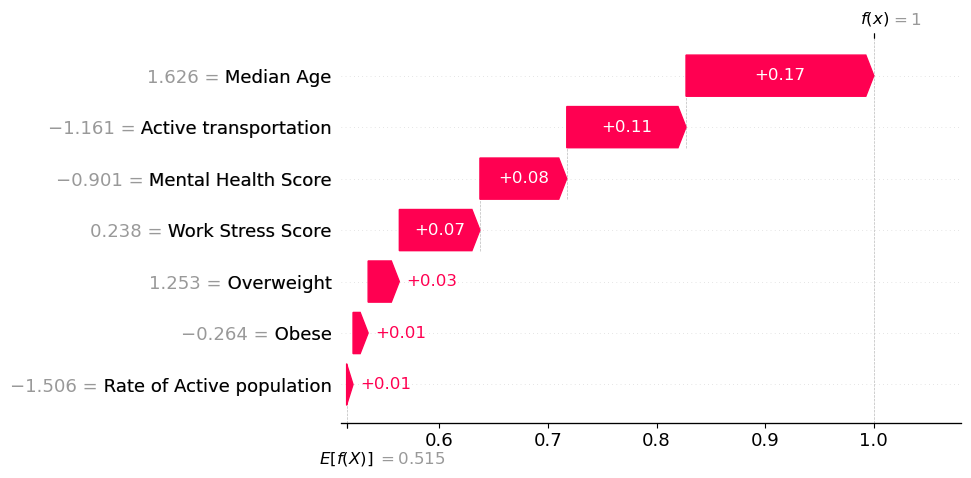

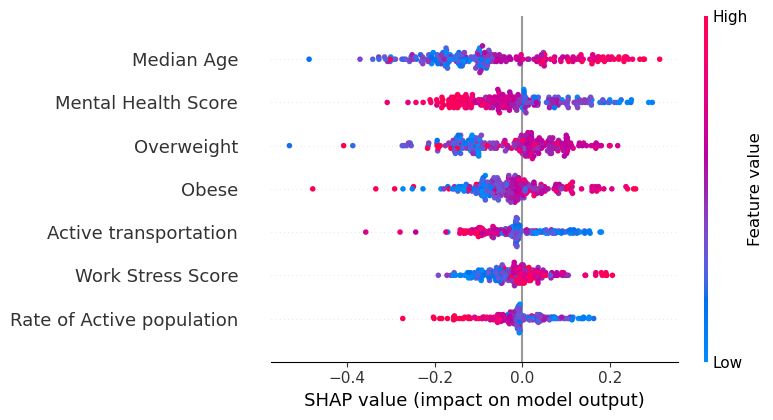

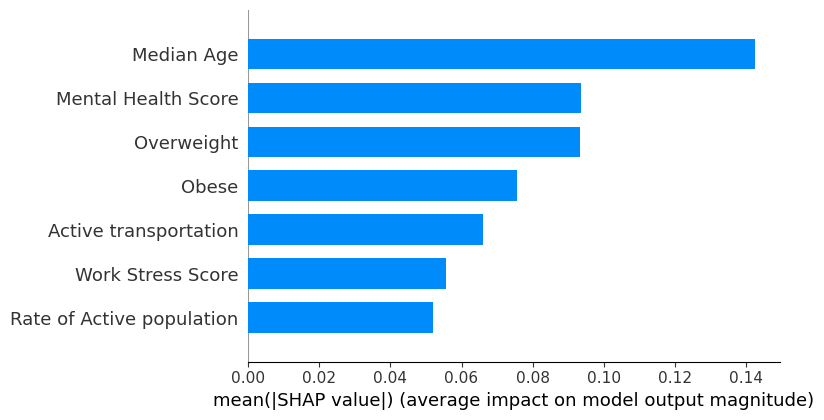

In [152]:
import random 
index = random.randint(0, len(shap_values) - 1)
print(index)
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[index],
        base_values=explainer.expected_value,
        data=X_test[index],
        feature_names=features),
    max_display=10)
plt.show()

# Mean SHAP Plot:
shap.summary_plot(shap_values, X_test, feature_names=features)

# Beeswarm Plot:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features)

In [140]:
# Initialize an SVM classifier
SVM = SVC(class_weight=None, probability=True)


# Creating a pipeline that applies the Decision Tree classifier
model_for_SVM = Pipeline([
    ('svm', SVM)
])

# Fitting the model on the training data
model_for_SVM.fit(X_train_scaled_SVM, y_resampled_S)

# Define a dictionary of hyperparameter values to search over.
param_dist_SVM = {
    'svm__C': [10**(i) for i in range(-2,2)],
    'svm__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'svm__gamma': [10**(i) for i in range(-2,2)],
}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_SVM = GridSearchCV(
    model_for_SVM, param_grid=param_dist_SVM, cv=skf)

# Train Grid Search on the training data
random_search_SVM.fit(X_train_scaled_SVM, y_resampled_S)

# Extract results into a DataFrame
results_SVM = pd.DataFrame(random_search_SVM.cv_results_)

# Display the set of parameters that achieved the best score
results_SVM[results_SVM['rank_test_score'] == 1]
random_search_SVM.best_params_

{'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}

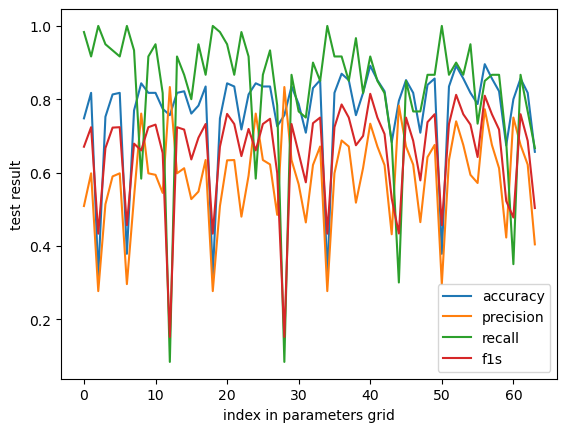

Best Configs: 
{'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}




In [141]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                svm__C=param_config["svm__C"], 
                svm__gamma=param_config["svm__gamma"], 
                svm__kernel=param_config["svm__kernel"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)  

        except:
            pass
        
    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_SVM
model = model_for_SVM

x_train = X_train_scaled_SVM
y_train = y_resampled_S
x_test = X_test_scaled_SVM
y_test = y_test_S

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]
    
    model = model.set_params(
        svm__C=param_config["svm__C"], 
        svm__gamma=param_config["svm__gamma"], 
        svm__kernel=param_config["svm__kernel"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1) 


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

**4.3.1 Hyperparametre tunning for SVM**

In [40]:
# best_config = the_bests[0]

# model_for_SVM = model_for_SVM.set_params(
#     svm__C=best_config["svm__C"],
#     svm__gamma=best_config["svm__gamma"],
#     svm__kernel=best_config["svm__kernel"],
# )
# Refit the model using the training data
# model_for_SVM.fit(X_train_scaled_SVM, y_resampled_S)

import pickle
import os

path = os.path.join(os.getcwd(), "models", "toronto cma", "toronto_cma_svm.pkl")
# load the model 
model_for_SVM = pickle.load(open(path, 'rb')) 


In [142]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_SVM_model = cross_val_predict(model_for_SVM, X_train_scaled_SVM, y_resampled_S, cv=5)

# Calculating the full confusion matrix
conf_matrix_SVM = confusion_matrix(y_resampled_S, predicted_labels_SVM_model)

# Calculate the full classification report
class_report_SVM = classification_report(y_resampled_S, predicted_labels_SVM_model)

# Calculate accuracy
accuracy_SVM = accuracy_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate precision
precision_SVM = precision_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate recall
recall_SVM = recall_score(y_resampled_S, predicted_labels_SVM_model)

# Calculate F1 score
f1_SVM = f1_score(y_resampled_S, predicted_labels_SVM_model)


# Print the full confusion matrix and classification report
print("SVM Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_SVM)
print("B. Classification Report:")
print(class_report_SVM)
print("C. Accuracy: {:.2f}".format(accuracy_SVM))
print("D. Precision: {:.2f}".format(precision_SVM))
print("E. Recall (Sensitivity): {:.2f}".format(recall_SVM))
print("F. F1 Score: {:.2f}".format(f1_SVM))


SVM Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[152  18]
 [ 20 150]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       170
           1       0.89      0.88      0.89       170

    accuracy                           0.89       340
   macro avg       0.89      0.89      0.89       340
weighted avg       0.89      0.89      0.89       340

C. Accuracy: 0.89
D. Precision: 0.89
E. Recall (Sensitivity): 0.88
F. F1 Score: 0.89


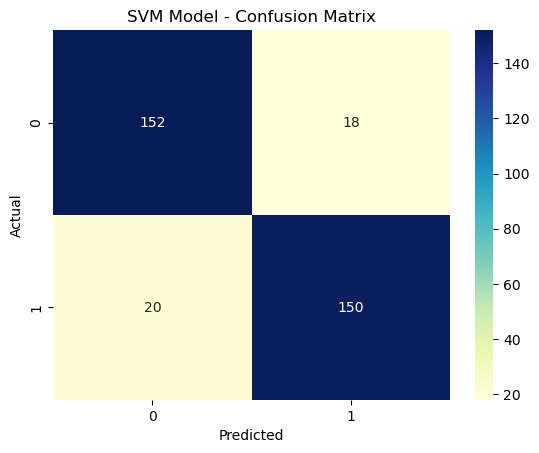

In [143]:
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='YlGnBu')
plt.title('SVM Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Training ROC-AUC: 0.9993


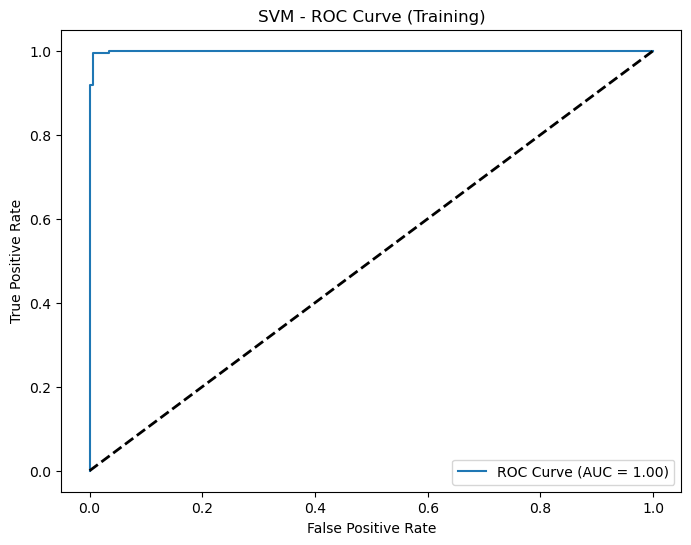

In [144]:
predicted_probs_SVM = model_for_SVM.predict_proba(X_train_scaled_SVM)[:, 1]

# Calculate ROC-AUC on the training set
roc_auc_train_SVM = roc_auc_score(y_resampled_S, predicted_probs_SVM)
print(f"Training ROC-AUC: {roc_auc_train_SVM:.4f}")

# Calculate ROC curve on the training set
fpr_SVM, tpr_SVM, _ = roc_curve(y_resampled_S, predicted_probs_SVM)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_SVM, tpr_SVM, label=f'ROC Curve (AUC = {roc_auc_train_SVM:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve (Training)')
plt.legend(loc='lower right')
plt.show()


In [145]:
# Making predictions on the test set of the DT model
y_pred_test_SVM = model_for_SVM.predict(X_test_scaled_SVM)

# Calculating metrics
accuracy_test_SVM = accuracy_score(y_test_S, y_pred_test_SVM)
precision_test_SVM = precision_score(y_test_S, y_pred_test_SVM)
recall_test_SVM = recall_score(y_test_S, y_pred_test_SVM)
f1_test_SVM = f1_score(y_test_S, y_pred_test_SVM)
conf_matrix_test_SVM = confusion_matrix(y_test_S, y_pred_test_SVM)

# Printing the evaluation metrics
print("SVM Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_SVM))
print("Precision: {:.2f}".format(precision_test_SVM))
print("Recall (Sensitivity): {:.2f}".format(recall_test_SVM))
print("F1 Score: {:.2f}".format(f1_test_SVM))
print("Confusion Matrix:")
print(conf_matrix_test_SVM)

SVM Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.89
Precision: 0.73
Recall (Sensitivity): 0.92
F1 Score: 0.81
Confusion Matrix:
[[150  20]
 [  5  55]]


Test ROC-AUC: 0.9363


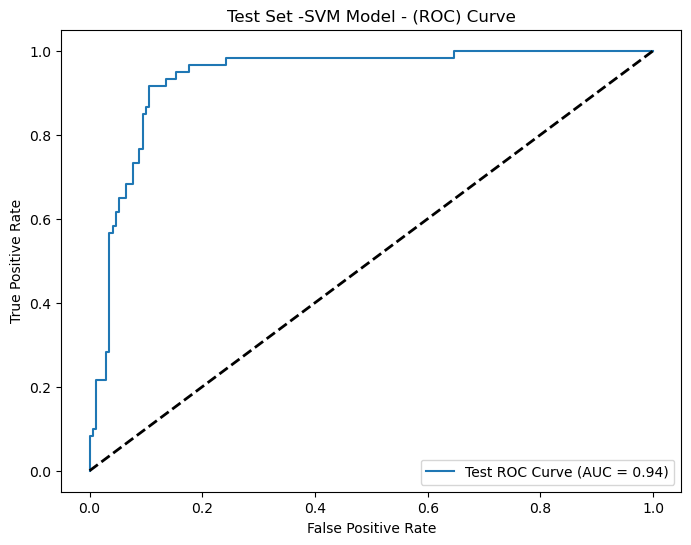

In [146]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_SVM = model_for_SVM.predict_proba(X_test_scaled_SVM)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_SVM = roc_auc_score(y_test_S, predicted_probs_test_SVM)
print(f"Test ROC-AUC: {roc_auc_test_SVM:.4f}")

# Calculate ROC curve on the test set
fpr_test_SVM, tpr_test_SVM, _ = roc_curve(y_test_S, predicted_probs_test_SVM)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_SVM, tpr_test_SVM, label=f'Test ROC Curve (AUC = {roc_auc_test_SVM:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set -SVM Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [147]:
# Usefull function in Sensitivity Analysis

import copy
from pandas.core.frame import DataFrame
# for sensitivity analysis
def permute_column(matrix, column_index):
    matrix_copied = copy.deepcopy(matrix)
    if isinstance(matrix_copied, DataFrame):
        np.random.shuffle(matrix_copied[matrix_copied.columns[column_index]])
    else: 
        np.random.shuffle(matrix_copied[:,column_index])
    return matrix_copied

def sensitivity_analysis(model, x_test, y_test, features):
    y_test_predicted = model.predict(x_test)
    sensitivity_result = {metric: {} for metric in ["accuracy", "precision", "recall", "f1"]}
    sensitivity_result["accuracy"]["base"] = accuracy_score(y_test, y_test_predicted),
    sensitivity_result["precision"]["base"] = precision_score(y_test, y_test_predicted),
    sensitivity_result["recall"]["base"] = recall_score(y_test, y_test_predicted),
    sensitivity_result["f1"]["base"] = f1_score(y_test, y_test_predicted)
    
    print(f"baseline of recall: ", sensitivity_result["recall"]["base"])
    print(f"baseline of f1: ", sensitivity_result["f1"]["base"])
    
    for column_index in range(x_test.shape[1]):
        column = features[column_index]
        sensitivity_result["accuracy"][column] = []
        sensitivity_result["precision"][column] = []
        sensitivity_result["recall"][column] = []
        sensitivity_result["f1"][column] = []
        for _ in range(100):
            x_test_permuted = permute_column(x_test, column_index)
            y_test_permutated_predict = model.predict(x_test_permuted)
            acc = accuracy_score(y_test, y_test_permutated_predict)
            pre = precision_score(y_test, y_test_permutated_predict)
            rec = recall_score(y_test, y_test_permutated_predict)
            f1 = f1_score(y_test, y_test_permutated_predict)        
            sensitivity_result["accuracy"][column].append(acc)
            sensitivity_result["precision"][column].append(pre)
            sensitivity_result["recall"][column].append(rec)
            sensitivity_result["f1"][column].append(f1)
        
        print(f"recall mean of {column}: ", np.mean(sensitivity_result["recall"][column]))
        print(f"f1 mean of {column}: ", np.mean(sensitivity_result["f1"][column]))
        
        print(f"recall var of {column}: ", np.var(sensitivity_result["recall"][column]))
        print(f"f1 var of {column}: ", np.var(sensitivity_result["f1"][column]))
        
        print(f"recall std of {column}: ", np.std(sensitivity_result["recall"][column]))
        print(f"f1 std of {column}: ", np.std(sensitivity_result["f1"][column]))

    return sensitivity_result

# recall | f1score
# accuracy | precision 
def draw_sensitivity_result(sensitivity_result):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    draw(sensitivity_result, "recall", axs[0])
    draw(sensitivity_result, "f1", axs[1])
    fig.savefig('result.jpg', dpi=plt.gcf().dpi, bbox_inches = 'tight')

def draw(sensitivity_result, metric, ax):
    plt.figure()
    baseline = sensitivity_result[metric]["base"]
    del sensitivity_result[metric]["base"]
    _data = pd.DataFrame.from_dict(sensitivity_result[metric])
    # color = [
    #     (201/255, 203/255, 163/255), 
    #     (255/255, 225/255, 168/255),
    #     (226/255, 109/255, 92/255),
    #     (114/255, 61/255, 70/255),
    #     (71/255, 45/255, 48/255),
    #     ]
    color = [
        (63/255, 13/255, 18/255),
        (167/255, 29/255, 49/255),
        (241/255, 240/255, 204/255),
        (213/255, 191/255, 134/255),
        (141/255, 119/255, 95/255),
    ]
    # color = [
    #     (66/255, 62/255, 55/255),
    #     (227/255, 178/255, 60/255),
    #     (237/255, 235/255, 215/255),
    #     (163/255, 149/255, 148/255),
    #     (110/255, 103/255, 95/255),
    # ]
    sns.barplot(data=_data, palette = color, ax=ax) #, width=0.5)
    ax.margins(x=0.1)
    ax.axhline(baseline, color='grey', linestyle='--', linewidth=2)
    ax.set_ylim([0,1])
    ax.set_xlabel('Permutated Columns')
    ylabel = metric[0].upper() + metric[1:]
    ax.set_ylabel(ylabel)
    ax.set_xticklabels([
        'Active\nTransportation', # from toronto only
        'Active\nPopulation Rate', # in toronto CMA
        'Overweight',
        'Obese',
        'Log\nMedian Age',
        'Work Stress Score',
        'Mental Health Score',
        ], rotation=45
        )
    ax.grid(axis='y', linewidth=.3)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    

baseline of recall:  (0.9166666666666666,)
baseline of f1:  0.8148148148148148
recall mean of Active transportation:  0.5801666666666666
f1 mean of Active transportation:  0.639882266377939
recall var of Active transportation:  0.0027871944444444437
f1 var of Active transportation:  0.0018592226716893528
recall std of Active transportation:  0.05279388643057493
f1 std of Active transportation:  0.043118704429624885
recall mean of Rate of Active population:  0.6430000000000001
f1 mean of Rate of Active population:  0.6937104285862327
recall var of Rate of Active population:  0.00251211111111111
f1 var of Rate of Active population:  0.0015261631812594364
recall std of Rate of Active population:  0.050120964786315815
f1 std of Rate of Active population:  0.039066138550660934
recall mean of Overweight:  0.6168333333333333
f1 mean of Overweight:  0.6454639970230176
recall var of Overweight:  0.0031805277777777765
f1 var of Overweight:  0.001824999647216704
recall std of Overweight:  0.05639

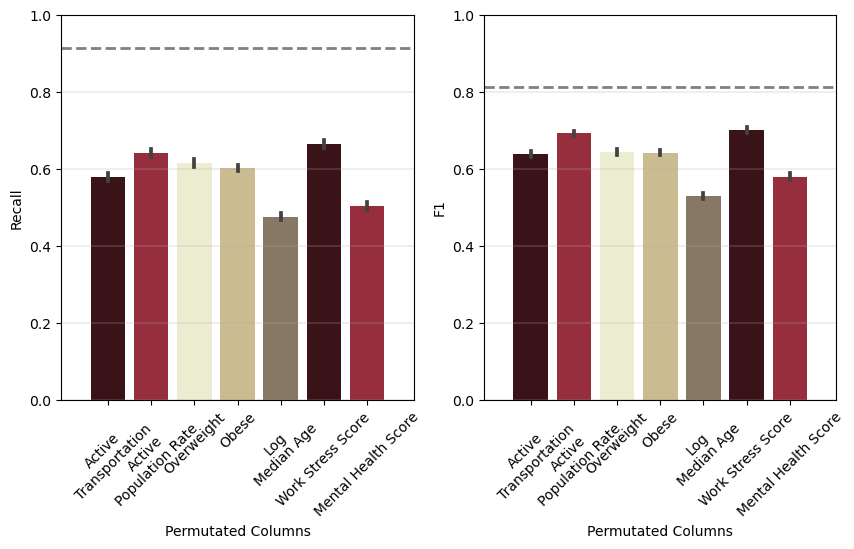

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [155]:
# Sensitivity Analysis
SVM_features_short = [
    'Active transportation', # from toronto only
    'Rate of Active population', # in toronto CMA
    'Overweight',
    'Obese',
    'Median Age',
    'Work Stress Score',
    'Mental Health Score',
]
result = sensitivity_analysis(
    model_for_SVM, 
    X_test_scaled_SVM, 
    y_test_S,
    SVM_features_short)
draw_sensitivity_result(result)

In [149]:
# record the best model
best_model_name = "2nd_mhs_wss_toronto_cma_svm.pkl"
path = os.path.join(os.getcwd(),"models","toronto cma",best_model_name) 
with open(path, 'wb') as file:
    pickle.dump(model_for_SVM, file)

**Section 5: Data Preperation for Ensemble models**

In [234]:
# Specify binary columns as integers
binary_columns = ['Visible Minority Binary', 'Work Stress binary', 'Food Insecurity binary', 'Instability_Deprivation', 'Mental Health Binary']
data[binary_columns] = data[binary_columns].astype(int)

Label_column = ['Diabetes']
data[Label_column] = data[Label_column].astype(int)

# Specify categorical columns
categorical_columns = ['Residential Instability quintiles', 'Material Deprivation quintiles', 'Ethnic Concentration quintiles']
data[categorical_columns] = data[categorical_columns].astype('category')

# Specify the rest as floats
float_columns = [col for col in data.columns if col not in binary_columns + categorical_columns + Label_column]
data[float_columns] = data[float_columns].astype(float)

X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Under samling the training data to address imbalance classification issue
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


ct = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

# Applying the one-hot encoding transformation to X_resampled and X_test
X_resampled = ct.fit_transform(X_resampled, y_resampled)
X_test = ct.transform(X_test)

#converting numpyarray back to DataFrame
X_resampled= pd.DataFrame(X_resampled, columns=ct.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=ct.get_feature_names_out())

**Section 6. Creating ensemble models**



**6.1 Decision Tress**

In [168]:
#setting custom scorer
accuracy_scoring = make_scorer(accuracy_score)

DT_model = DecisionTreeClassifier()

cv_DT = StratifiedKFold(5)
rfecv_DT = RFECV(
    estimator=DT_model,
    step=1,
    cv=cv_DT,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_DT.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -DT: {rfecv_DT.n_features_}")

Optimal number of features -DT: 14


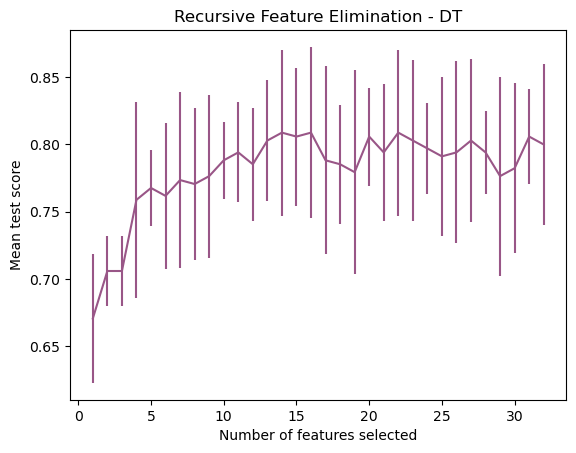

In [169]:
# Calculate the number of different feature selections tested
n_scores_DT = len(rfecv_DT.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_DT + 1),
    rfecv_DT.cv_results_["mean_test_score"],
    yerr=rfecv_DT.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - DT")

# Show the plot
plt.show()


In [170]:
selected_DT_features = X_resampled.columns[rfecv_DT.support_]

print("Selected Features for DT:")
print(selected_DT_features)

Selected Features for DT:
Index(['one_hot_encoder__Residential Instability quintiles_3',
       'remainder__Mental Health Binary', 'remainder__Unemployment Rate',
       'remainder__Average Income', 'remainder__Median Age',
       'remainder__Recent Immigrant Rate', 'remainder__Rented Rate',
       'remainder__Visible Minority Rate', 'remainder__Active transportation',
       'remainder__Rate of Active population',
       'remainder__Rate of Daily Smokers', 'remainder__Food Insecurity binary',
       'remainder__Overweight', 'remainder__Obese'],
      dtype='object')


In [171]:
# Accessing the mean test scores
mean_test_scores_DT = rfecv_DT.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for t, score_DT in enumerate(mean_test_scores_DT):
    DT_selected_features = t + 1  #start with one feature
    print(f"Number of Selected Features: {DT_selected_features}, Mean Test Score: {score_DT}")


Number of Selected Features: 1, Mean Test Score: 0.6705882352941177
Number of Selected Features: 2, Mean Test Score: 0.7058823529411764
Number of Selected Features: 3, Mean Test Score: 0.7058823529411764
Number of Selected Features: 4, Mean Test Score: 0.7588235294117647
Number of Selected Features: 5, Mean Test Score: 0.7676470588235293
Number of Selected Features: 6, Mean Test Score: 0.761764705882353
Number of Selected Features: 7, Mean Test Score: 0.7735294117647059
Number of Selected Features: 8, Mean Test Score: 0.7705882352941177
Number of Selected Features: 9, Mean Test Score: 0.7764705882352941
Number of Selected Features: 10, Mean Test Score: 0.788235294117647
Number of Selected Features: 11, Mean Test Score: 0.7941176470588236
Number of Selected Features: 12, Mean Test Score: 0.7852941176470588
Number of Selected Features: 13, Mean Test Score: 0.8029411764705883
Number of Selected Features: 14, Mean Test Score: 0.8088235294117647
Number of Selected Features: 15, Mean Test Sc

In [172]:
#setting parametres
rfe_DT = RFE(DT_model, n_features_to_select=4)
rfe_DT.fit(X_resampled, y_resampled)

#extracting features
most_important_features_DT = X_resampled.columns[rfe_DT.support_]

In [173]:
most_important_features_DT

Index(['remainder__Median Age', 'remainder__Rate of Active population',
       'remainder__Overweight', 'remainder__Obese'],
      dtype='object')

In [174]:
DT_features = [
    'remainder__Median Age', 
    'remainder__Visible Minority Rate',
    'remainder__Overweight', 
    'remainder__Obese'
]

In [175]:
#fitting data
X_DT_train = X_resampled[DT_features]
X_DT_test = X_test[DT_features]

In [176]:
# Initializing a Decision Tree classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
dt = DecisionTreeClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Decision Tree classifier
model_for_dt = Pipeline([
    ('DT', dt)
])

# Fitting the model on the training data
model_for_dt.fit(X_DT_train, y_resampled)

Pipeline(steps=[('DT', DecisionTreeClassifier(criterion='entropy'))])

**6.1.1 Hyperparametre tunning for Decision Trees**

In [177]:
# Define the hyperparameter values that should be tested
param_dist_DT = {
    "DT__max_depth" : [3, 5, 7, 10, 15, 20],
    "DT__min_samples_leaf" : [3, 5, 7, 10, 15, 20],
    "DT__splitter" : ['best', 'random'],
    "DT__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_DT = GridSearchCV(
    model_for_dt, param_grid=param_dist_DT, cv=skf)

# Train Grid Search on the training data
random_search_DT.fit(X_DT_train, y_resampled)

# Extract results into a DataFrame
results_DT = pd.DataFrame(random_search_DT.cv_results_)

# Display the set of parameters that achieved the best score
results_DT[results_DT['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search
random_search_DT.best_params_

{'DT__max_depth': 10,
 'DT__max_features': 'sqrt',
 'DT__min_samples_leaf': 15,
 'DT__splitter': 'best'}

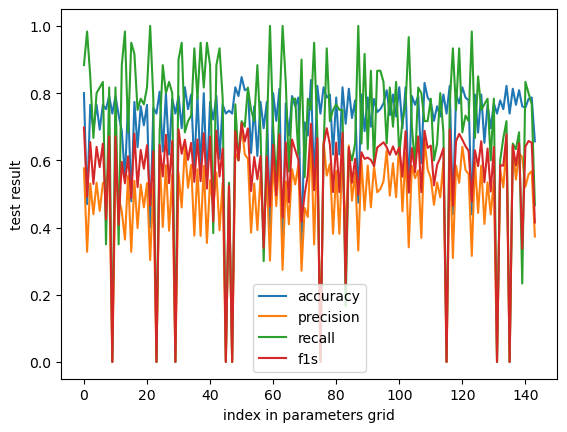

Best Configs: 
{'DT__max_depth': 7, 'DT__max_features': 'sqrt', 'DT__min_samples_leaf': 5, 'DT__splitter': 'best'}




In [178]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                DT__max_depth=param_config["DT__max_depth"], 
                DT__max_features=param_config["DT__max_features"], 
                DT__min_samples_leaf=param_config["DT__min_samples_leaf"],
                DT__splitter=param_config["DT__splitter"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)  

        except:
            pass
        
    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_DT
model = model_for_dt

x_train = X_DT_train
y_train = y_resampled
x_test = X_DT_test
y_test = y_test

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]
    
    model = model.set_params(
        DT__max_depth=param_config["DT__max_depth"], 
        DT__max_features=param_config["DT__max_features"], 
        DT__min_samples_leaf=param_config["DT__min_samples_leaf"],
        DT__splitter=param_config["DT__splitter"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1) 


test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [179]:
# Update the model's hyperparameters to the best found during Grid Search
best_config = the_bests[0]
model_for_dt = model_for_dt.set_params(
    DT__max_depth=best_config["DT__max_depth"], 
    DT__max_features=best_config["DT__max_features"], 
    DT__min_samples_leaf=best_config["DT__min_samples_leaf"],
    DT__splitter=best_config["DT__splitter"],
)
# Refit the model using the training data
model_for_dt = model_for_dt.fit(X_DT_train, y_resampled)

In [180]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_DT_model = cross_val_predict(model_for_dt, X_DT_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_DT = confusion_matrix(y_resampled, predicted_labels_DT_model)

# Calculate the full classification report
class_report_DT = classification_report(y_resampled, predicted_labels_DT_model)

# Calculate accuracy
accuracy_DT = accuracy_score(y_resampled, predicted_labels_DT_model)

# Calculate precision
precision_DT = precision_score(y_resampled, predicted_labels_DT_model)

# Calculate recall
recall_DT = recall_score(y_resampled, predicted_labels_DT_model)

# Calculate F1 score
f1_DT = f1_score(y_resampled, predicted_labels_DT_model)


# Print the full confusion matrix and classification report
print("DT Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_DT)
print("B. Classification Report:")
print(class_report_DT)
print("C. Accuracy: {:.2f}".format(accuracy_DT))
print("D. Precision: {:.2f}".format(precision_DT))
print("E. Recall (Sensitivity): {:.2f}".format(recall_DT))
print("F. F1 Score: {:.2f}".format(f1_DT))



DT Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[131  39]
 [ 38 132]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       170
           1       0.77      0.78      0.77       170

    accuracy                           0.77       340
   macro avg       0.77      0.77      0.77       340
weighted avg       0.77      0.77      0.77       340

C. Accuracy: 0.77
D. Precision: 0.77
E. Recall (Sensitivity): 0.78
F. F1 Score: 0.77


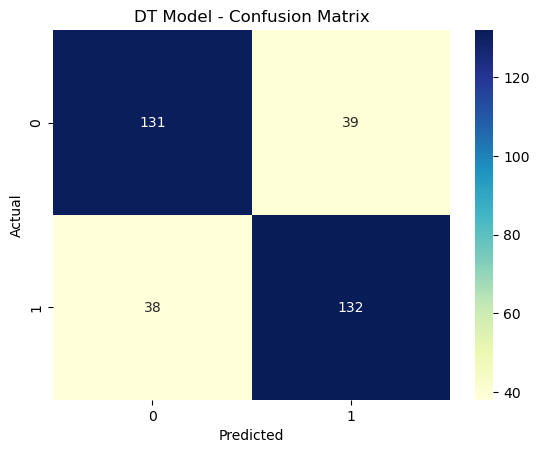

In [181]:
sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='YlGnBu')
plt.title('DT Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Training ROC-AUC: 0.9455


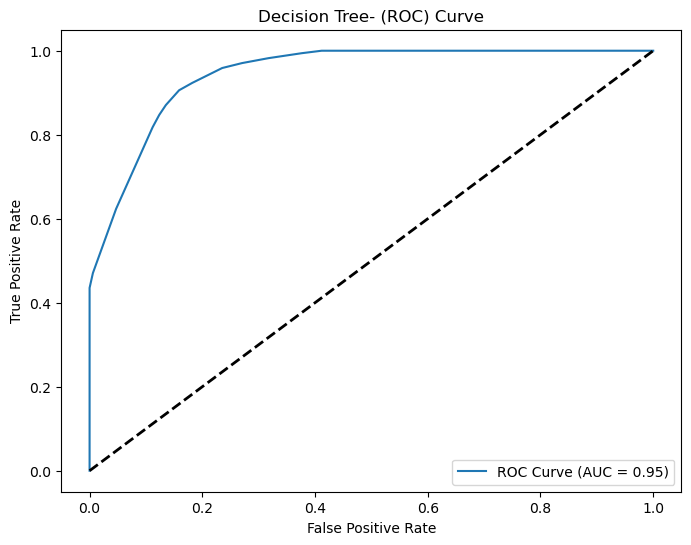

In [182]:
predicted_probs_DT = model_for_dt.predict_proba(X_DT_train)[:, 1]  # probability of 1 (outcome)

# Calculate ROC-AUC on the train set
roc_auc_train_DT = roc_auc_score(y_resampled, predicted_probs_DT)
print(f"Training ROC-AUC: {roc_auc_train_DT:.4f}")

# Calculate ROC curve on the train set
fpr_DT, tpr_DT, _ = roc_curve(y_resampled, predicted_probs_DT)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_DT, tpr_DT, label=f'ROC Curve (AUC = {roc_auc_train_DT:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree- (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [183]:
# Making predictions on the test set of the DT model
y_pred_test_DT = model_for_dt.predict(X_DT_test)

# Calculating metrics
accuracy_test_DT = accuracy_score(y_test, y_pred_test_DT)
precision_test_DT = precision_score(y_test, y_pred_test_DT)
recall_test_DT = recall_score(y_test, y_pred_test_DT)
f1_test_DT = f1_score(y_test, y_pred_test_DT)
conf_matrix_test_DT = confusion_matrix(y_test, y_pred_test_DT)

# Printing the evaluation metrics
print("DT Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_DT))
print("Precision: {:.2f}".format(precision_test_DT))
print("Recall (Sensitivity): {:.2f}".format(recall_test_DT))
print("F1 Score: {:.2f}".format(f1_test_DT))
print("Confusion Matrix:")
print(conf_matrix_test_DT)



DT Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.77
Precision: 0.54
Recall (Sensitivity): 0.78
F1 Score: 0.64
Confusion Matrix:
[[130  40]
 [ 13  47]]


Test ROC-AUC: 0.8407


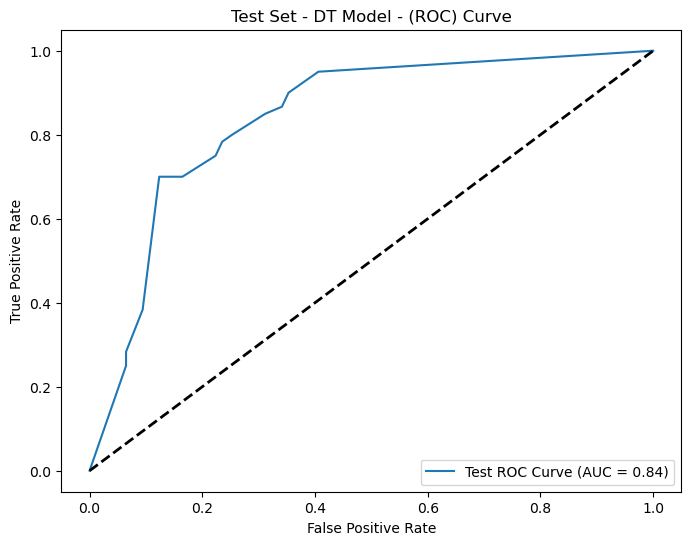

In [184]:
# Making predictions on the test set of the DT model
predicted_probs_test_DT = model_for_dt.predict_proba(X_DT_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_DT = roc_auc_score(y_test, predicted_probs_test_DT)
print(f"Test ROC-AUC: {roc_auc_test_DT:.4f}")

# Calculate ROC curve on the test set
fpr_test_DT, tpr_test_DT, _ = roc_curve(y_test, predicted_probs_test_DT)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_DT, tpr_test_DT, label=f'Test ROC Curve (AUC = {roc_auc_test_DT:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - DT Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

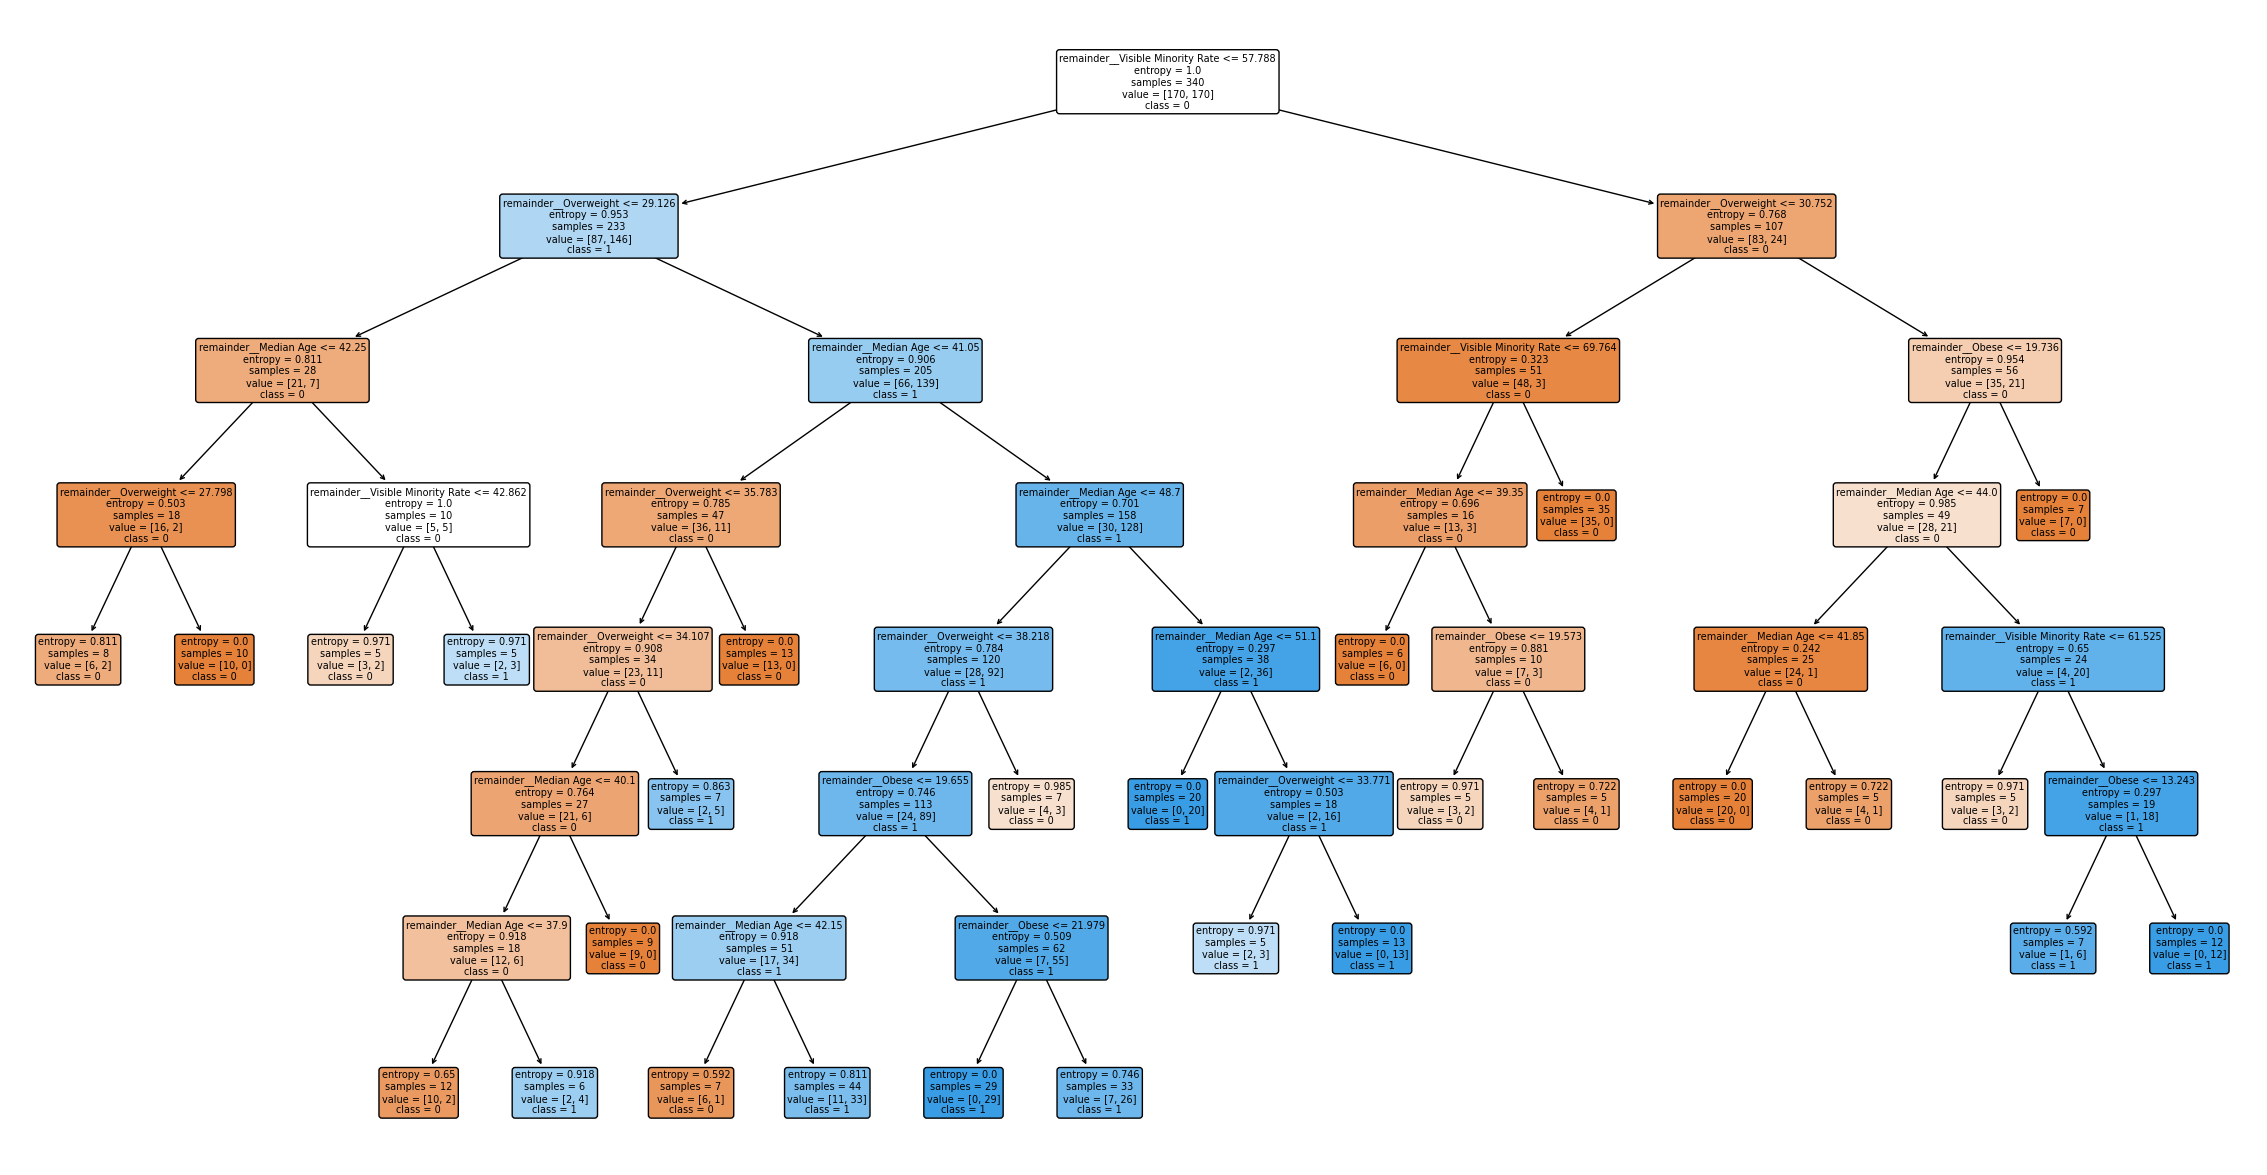

In [185]:
plt.figure(figsize=(29, 15))
plot_tree(model_for_dt.named_steps['DT'], feature_names=X_DT_train.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=7)
plt.show()

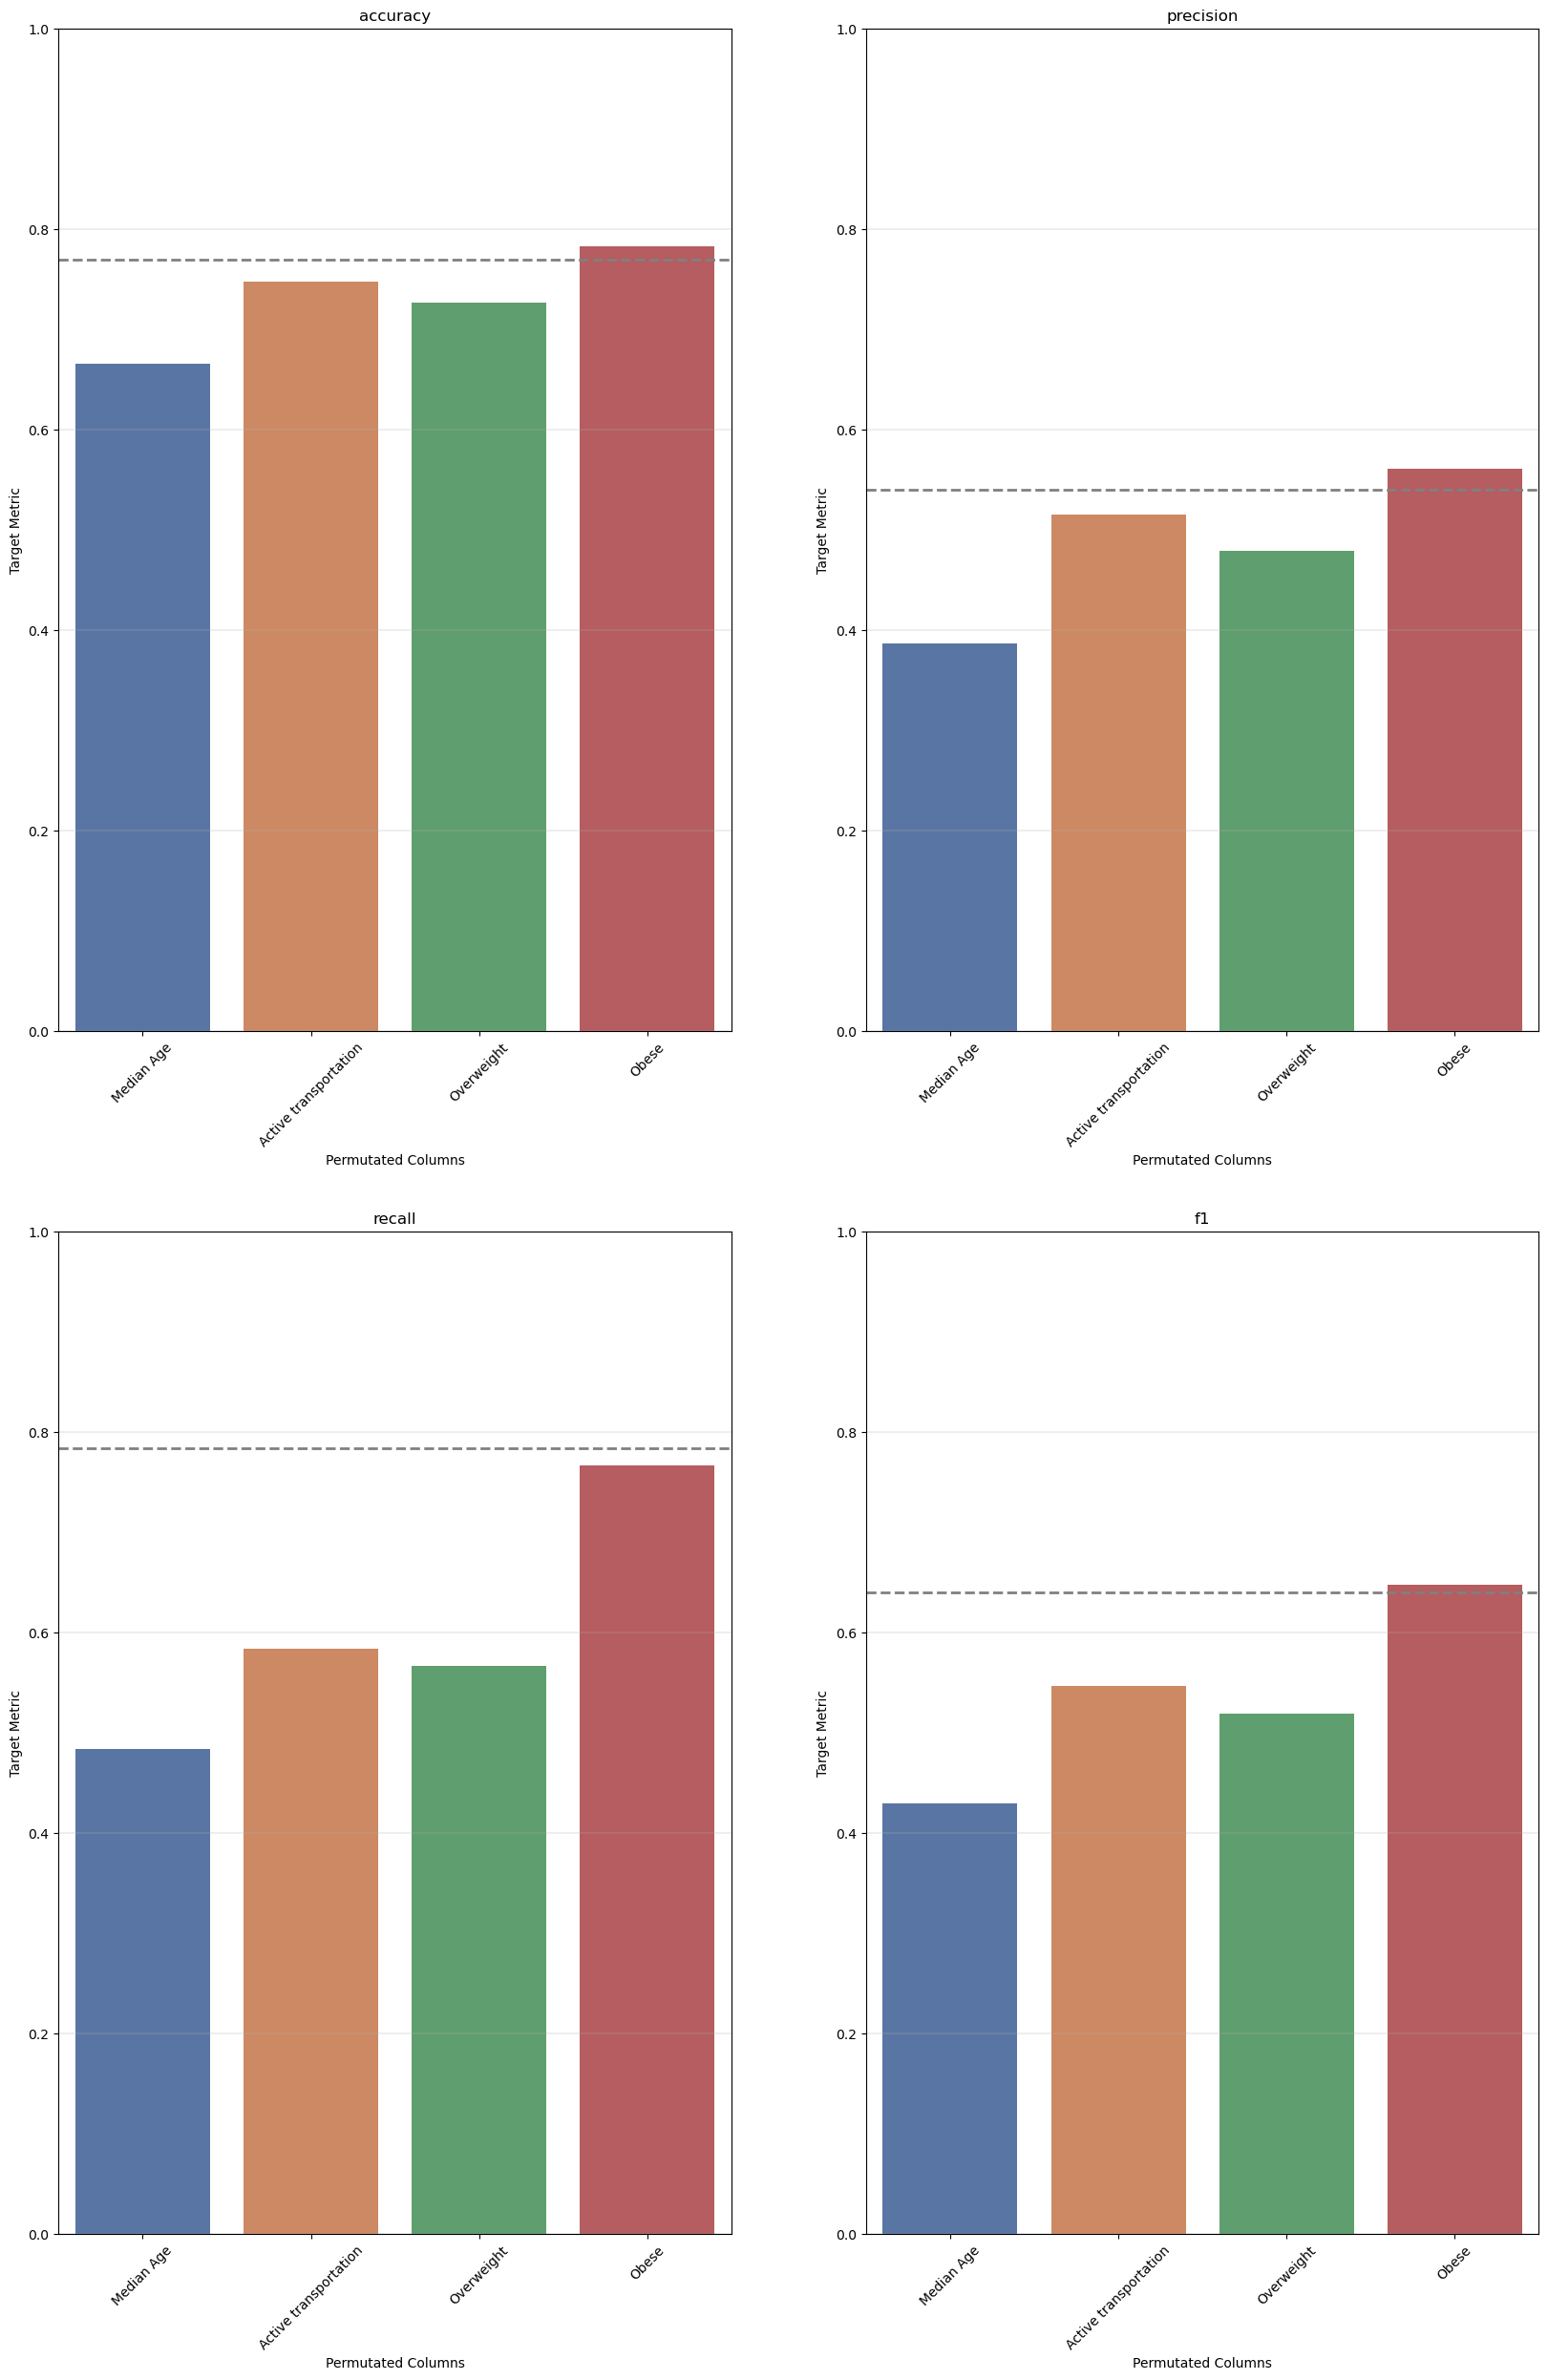

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [186]:
# Sensitivity Analysis
DT_features_short = [
    'Median Age', 
    'Active transportation',
    'Overweight', 
    'Obese'
]
result = sensitivity_analysis(
    model_for_dt, 
    X_DT_test, 
    y_test,
    DT_features_short)
draw_sensitivity_result(result)

In [187]:
# record the best model
best_model_name = "toronto_cma_decision_tree.pkl"
path = os.path.join(os.getcwd(),"models","toronto cma",best_model_name) 
with open(path, 'wb') as file:
    pickle.dump(model_for_dt, file)

**6.2 Random Forests**

In [188]:
RF_model = RandomForestClassifier()

cv_RF = StratifiedKFold(5)
rfecv_RF = RFECV(
    estimator=RF_model,
    step=1,
    cv=cv_RF,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_RF.fit(X_resampled, y_resampled)

# Print the optimal number of selected features_
print(f"Optimal number of features -RF: {rfecv_RF.n_features_}")

Optimal number of features -RF: 20


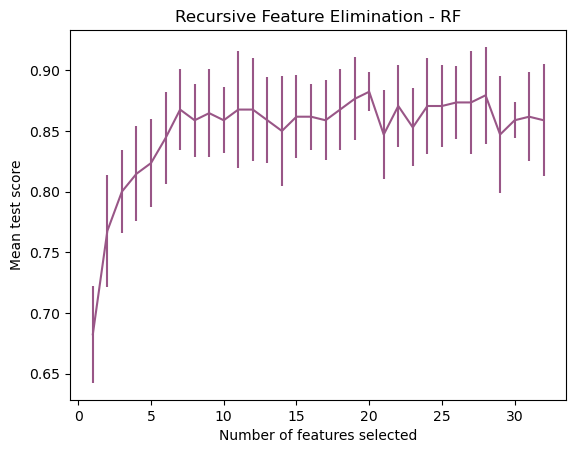

In [189]:
# Calculate the number of different feature selections tested
n_scores_RF = len(rfecv_RF.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_RF + 1),
    rfecv_RF.cv_results_["mean_test_score"],
    yerr=rfecv_RF.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - RF")

# Show the plot
plt.show()

In [190]:
selected_RF_features = X_resampled.columns[rfecv_RF.support_]

print("Selected Features for RF:")
print(selected_RF_features)

Selected Features for RF:
Index(['one_hot_encoder__Residential Instability quintiles_1',
       'one_hot_encoder__Residential Instability quintiles_3',
       'one_hot_encoder__Residential Instability quintiles_4',
       'one_hot_encoder__Ethnic Concentration quintiles_3',
       'one_hot_encoder__Ethnic Concentration quintiles_4',
       'one_hot_encoder__Ethnic Concentration quintiles_5',
       'remainder__Mental Health Binary', 'remainder__Unemployment Rate',
       'remainder__High Education Rate', 'remainder__Average Income',
       'remainder__Median Age', 'remainder__Recent Immigrant Rate',
       'remainder__Rented Rate', 'remainder__Visible Minority Rate',
       'remainder__Work Stress binary', 'remainder__Active transportation',
       'remainder__Rate of Active population',
       'remainder__Rate of Daily Smokers', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')


In [191]:
# Accessing the mean test scores
mean_test_scores_RF = rfecv_RF.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for r, score_RF in enumerate(mean_test_scores_RF):
    RF_selected_features = r + 1  #start with one feature
    print(f"Number of Selected Features: {RF_selected_features}, Mean Test Score: {score_RF}")

Number of Selected Features: 1, Mean Test Score: 0.6823529411764706
Number of Selected Features: 2, Mean Test Score: 0.7676470588235295
Number of Selected Features: 3, Mean Test Score: 0.8
Number of Selected Features: 4, Mean Test Score: 0.8147058823529412
Number of Selected Features: 5, Mean Test Score: 0.8235294117647058
Number of Selected Features: 6, Mean Test Score: 0.8441176470588235
Number of Selected Features: 7, Mean Test Score: 0.8676470588235295
Number of Selected Features: 8, Mean Test Score: 0.8588235294117649
Number of Selected Features: 9, Mean Test Score: 0.8647058823529413
Number of Selected Features: 10, Mean Test Score: 0.8588235294117649
Number of Selected Features: 11, Mean Test Score: 0.8676470588235293
Number of Selected Features: 12, Mean Test Score: 0.8676470588235295
Number of Selected Features: 13, Mean Test Score: 0.8588235294117649
Number of Selected Features: 14, Mean Test Score: 0.85
Number of Selected Features: 15, Mean Test Score: 0.8617647058823531
Num

In [192]:
rfe_RF = RFE(RF_model, n_features_to_select=6)
rfe_RF.fit(X_resampled, y_resampled)

#extracting features
most_important_features_RF = X_resampled.columns[rfe_RF.support_]

In [193]:
most_important_features_RF

Index(['remainder__Mental Health Binary', 'remainder__Median Age',
       'remainder__Visible Minority Rate',
       'remainder__Rate of Active population', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')

In [194]:
# after many runs, we concluded the most important features are as below:

RF_features = [
    'remainder__Rate of Daily Smokers', 
    'remainder__Median Age', 
    'remainder__Visible Minority Rate',
    'remainder__Active transportation',
    'remainder__Rate of Active population', 
    'remainder__Overweight',
    'remainder__Obese'
]

In [195]:
#fitting data
X_RF_train = X_resampled[RF_features]
X_RF_test = X_test[RF_features]

In [196]:
# Initializing a Random Forest classifier
#we already have balanced class through the previous undersampling step
#thus, class weight will be set to none instead of balanced
rf = RandomForestClassifier(criterion='entropy', class_weight=None)

# Creating a pipeline that applies the Random Forest
model_for_rf = Pipeline([
    ('random_forest', rf)
])

# Fitting the model on the training data
model_for_rf.fit(X_RF_train, y_resampled)

Pipeline(steps=[('random_forest', RandomForestClassifier(criterion='entropy'))])

**6.2.1 Hyperparametre tunning for Random Forests**

In [197]:
# Define the hyperparameter values that should be tested
param_dist_RF = {
    "random_forest__n_estimators" : [100, 150, 200],
    "random_forest__max_depth" : [3, 5, 7, 10],
    "random_forest__min_samples_leaf" : [3, 5, 7, 10],
    "random_forest__max_features" : ['sqrt', 'log2']
}

# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
random_search_RF = GridSearchCV(
    model_for_rf, param_grid=param_dist_RF, cv=skf)

# Train Grid Search on the training data
random_search_RF.fit(X_RF_train, y_resampled)

# Extract results into a DataFrame
results_RF = pd.DataFrame(random_search_RF.cv_results_)

# Display the set of parameters that achieved the best score
results_RF[results_RF['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search for RF
random_search_RF.best_params_

{'random_forest__max_depth': 10,
 'random_forest__max_features': 'sqrt',
 'random_forest__min_samples_leaf': 3,
 'random_forest__n_estimators': 200}

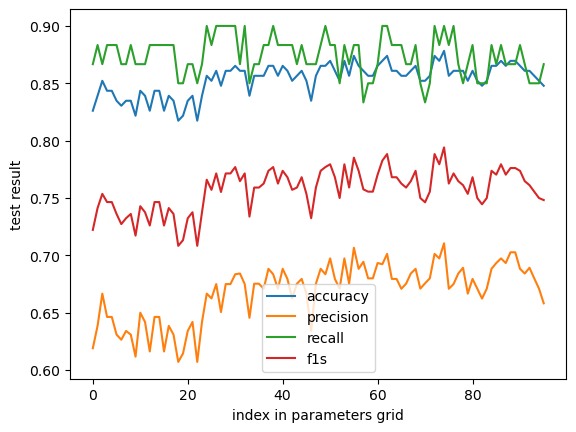

Best Configs: 
{'random_forest__max_depth': 10, 'random_forest__max_features': 'sqrt', 'random_forest__min_samples_leaf': 3, 'random_forest__n_estimators': 200}




In [198]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                random_forest__max_depth=param_config["random_forest__max_depth"], 
                random_forest__max_features=param_config["random_forest__max_features"], 
                random_forest__min_samples_leaf=param_config["random_forest__min_samples_leaf"],
                random_forest__n_estimators=param_config["random_forest__n_estimators"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)  

        except:
            pass
        
    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_RF
model = model_for_rf

x_train = X_RF_train
y_train = y_resampled
x_test = X_RF_test
y_test = y_test

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]
    
    model = model.set_params(
        random_forest__max_depth=param_config["random_forest__max_depth"], 
        random_forest__max_features=param_config["random_forest__max_features"], 
        random_forest__min_samples_leaf=param_config["random_forest__min_samples_leaf"],
        random_forest__n_estimators=param_config["random_forest__n_estimators"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1) 

test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [199]:
# Update the model's hyperparameters to the best found during Grid Search
best_config = the_bests[0]
model_for_rf = model_for_rf.set_params(
    random_forest__max_depth=best_config["random_forest__max_depth"], 
    random_forest__max_features=best_config["random_forest__max_features"], 
    random_forest__min_samples_leaf=best_config["random_forest__min_samples_leaf"],
    random_forest__n_estimators=best_config["random_forest__n_estimators"],
)

# Refit the model using the training data
model_for_rf = model_for_rf.fit(X_RF_train, y_resampled)

In [200]:
# Making predictions on the test set of the RF model
y_pred_test_RF = model_for_rf.predict(X_RF_test)

# Calculating metrics
accuracy_test_RF = accuracy_score(y_test, y_pred_test_RF)
precision_test_RF = precision_score(y_test, y_pred_test_RF)
recall_test_RF = recall_score(y_test, y_pred_test_RF)
f1_test_RF = f1_score(y_test, y_pred_test_RF)
conf_matrix_test_RF = confusion_matrix(y_test, y_pred_test_RF)

# Printing the evaluation metrics
print("Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_RF))
print("Precision: {:.2f}".format(precision_test_RF))
print("Recall (Sensitivity): {:.2f}".format(recall_test_RF))
print("F1 Score: {:.2f}".format(f1_test_RF))
print("Confusion Matrix:")
print(conf_matrix_test_RF)

Test Set- Confusion Matrix/Classification Report
Accuracy: 0.87
Precision: 0.71
Recall (Sensitivity): 0.88
F1 Score: 0.79
Confusion Matrix:
[[148  22]
 [  7  53]]


In [201]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_RF_model = cross_val_predict(model_for_rf, X_RF_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_RF = confusion_matrix(y_resampled, predicted_labels_RF_model)

# Calculate the full classification report
class_report_RF = classification_report(y_resampled, predicted_labels_RF_model)

# Calculate accuracy
accuracy_RF = accuracy_score(y_resampled, predicted_labels_RF_model)

# Calculate precision
precision_RF = precision_score(y_resampled, predicted_labels_RF_model)

# Calculate recall
recall_RF = recall_score(y_resampled, predicted_labels_RF_model)

# Calculate F1 score
f1_RF = f1_score(y_resampled, predicted_labels_RF_model)


# Print the full confusion matrix and classification report
print("RF Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_RF)
print("B. Classification Report:")
print(class_report_RF)
print("C. Accuracy: {:.2f}".format(accuracy_RF))
print("D. Precision: {:.2f}".format(precision_RF))
print("E. Recall (Sensitivity): {:.2f}".format(recall_RF))
print("F. F1 Score: {:.2f}".format(f1_RF))

RF Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[136  34]
 [ 21 149]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       170
           1       0.81      0.88      0.84       170

    accuracy                           0.84       340
   macro avg       0.84      0.84      0.84       340
weighted avg       0.84      0.84      0.84       340

C. Accuracy: 0.84
D. Precision: 0.81
E. Recall (Sensitivity): 0.88
F. F1 Score: 0.84


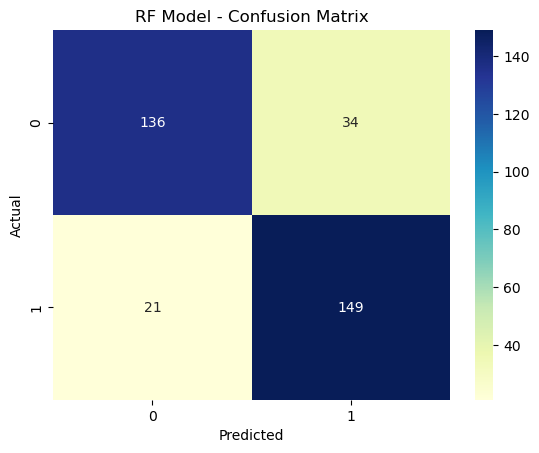

In [202]:
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='YlGnBu')
plt.title('RF Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Training ROC-AUC: 0.9983


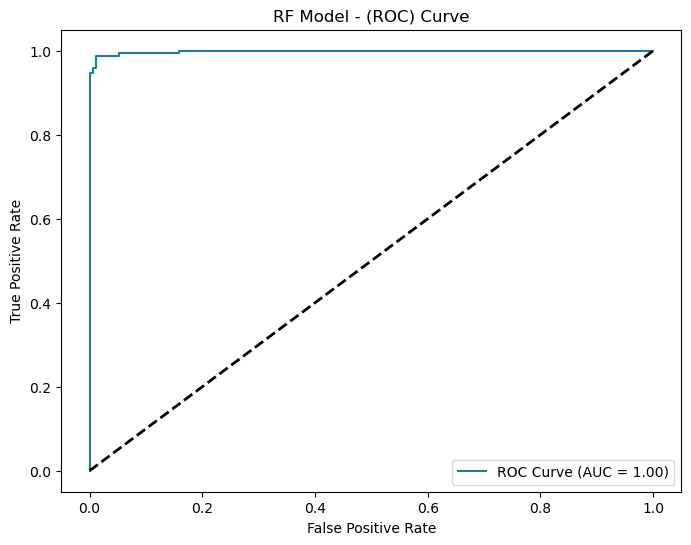

In [203]:
predicted_probs_RF = model_for_rf.predict_proba(X_RF_train)[:, 1]  # probability of 1 (outcome)

# Calculate ROC-AUC
roc_auc_train_RF = roc_auc_score(y_resampled, predicted_probs_RF)
print(f"Training ROC-AUC: {roc_auc_train_RF:.4f}")

# Calculate ROC curve
fpr_RF, tpr_RF, _ = roc_curve(y_resampled, predicted_probs_RF)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, label=f'ROC Curve (AUC = {roc_auc_train_RF:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [204]:
# Making predictions on the test set of the RF model
y_pred_test_RF = model_for_rf.predict(X_RF_test)

# Calculating metrics
accuracy_test_RF = accuracy_score(y_test, y_pred_test_RF)
precision_test_RF = precision_score(y_test, y_pred_test_RF)
recall_test_RF = recall_score(y_test, y_pred_test_RF)
f1_test_RF = f1_score(y_test, y_pred_test_RF)
conf_matrix_test_RF = confusion_matrix(y_test, y_pred_test_RF)

# Printing the evaluation metrics
print("Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_RF))
print("Precision: {:.2f}".format(precision_test_RF))
print("Recall (Sensitivity): {:.2f}".format(recall_test_RF))
print("F1 Score: {:.2f}".format(f1_test_RF))
print("Confusion Matrix:")
print(conf_matrix_test_RF)

Test Set- Confusion Matrix/Classification Report
Accuracy: 0.87
Precision: 0.71
Recall (Sensitivity): 0.88
F1 Score: 0.79
Confusion Matrix:
[[148  22]
 [  7  53]]


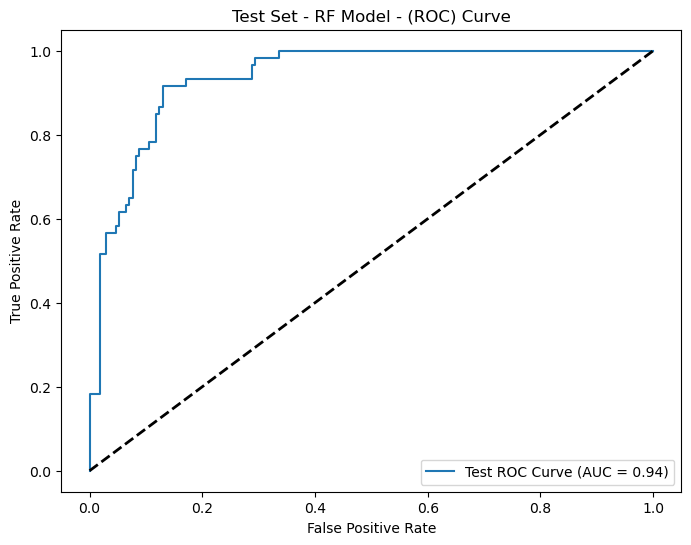

In [205]:
# Making predictions on the test set of the RF model
predicted_probs_test_RF = model_for_rf.predict_proba(X_RF_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_RF = roc_auc_score(y_test, predicted_probs_test_RF)

# Calculate ROC curve on the test set
fpr_test_RF, tpr_test_RF, _ = roc_curve(y_test, predicted_probs_test_RF)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_RF, tpr_test_RF, label=f'Test ROC Curve (AUC = {roc_auc_test_RF:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - RF Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

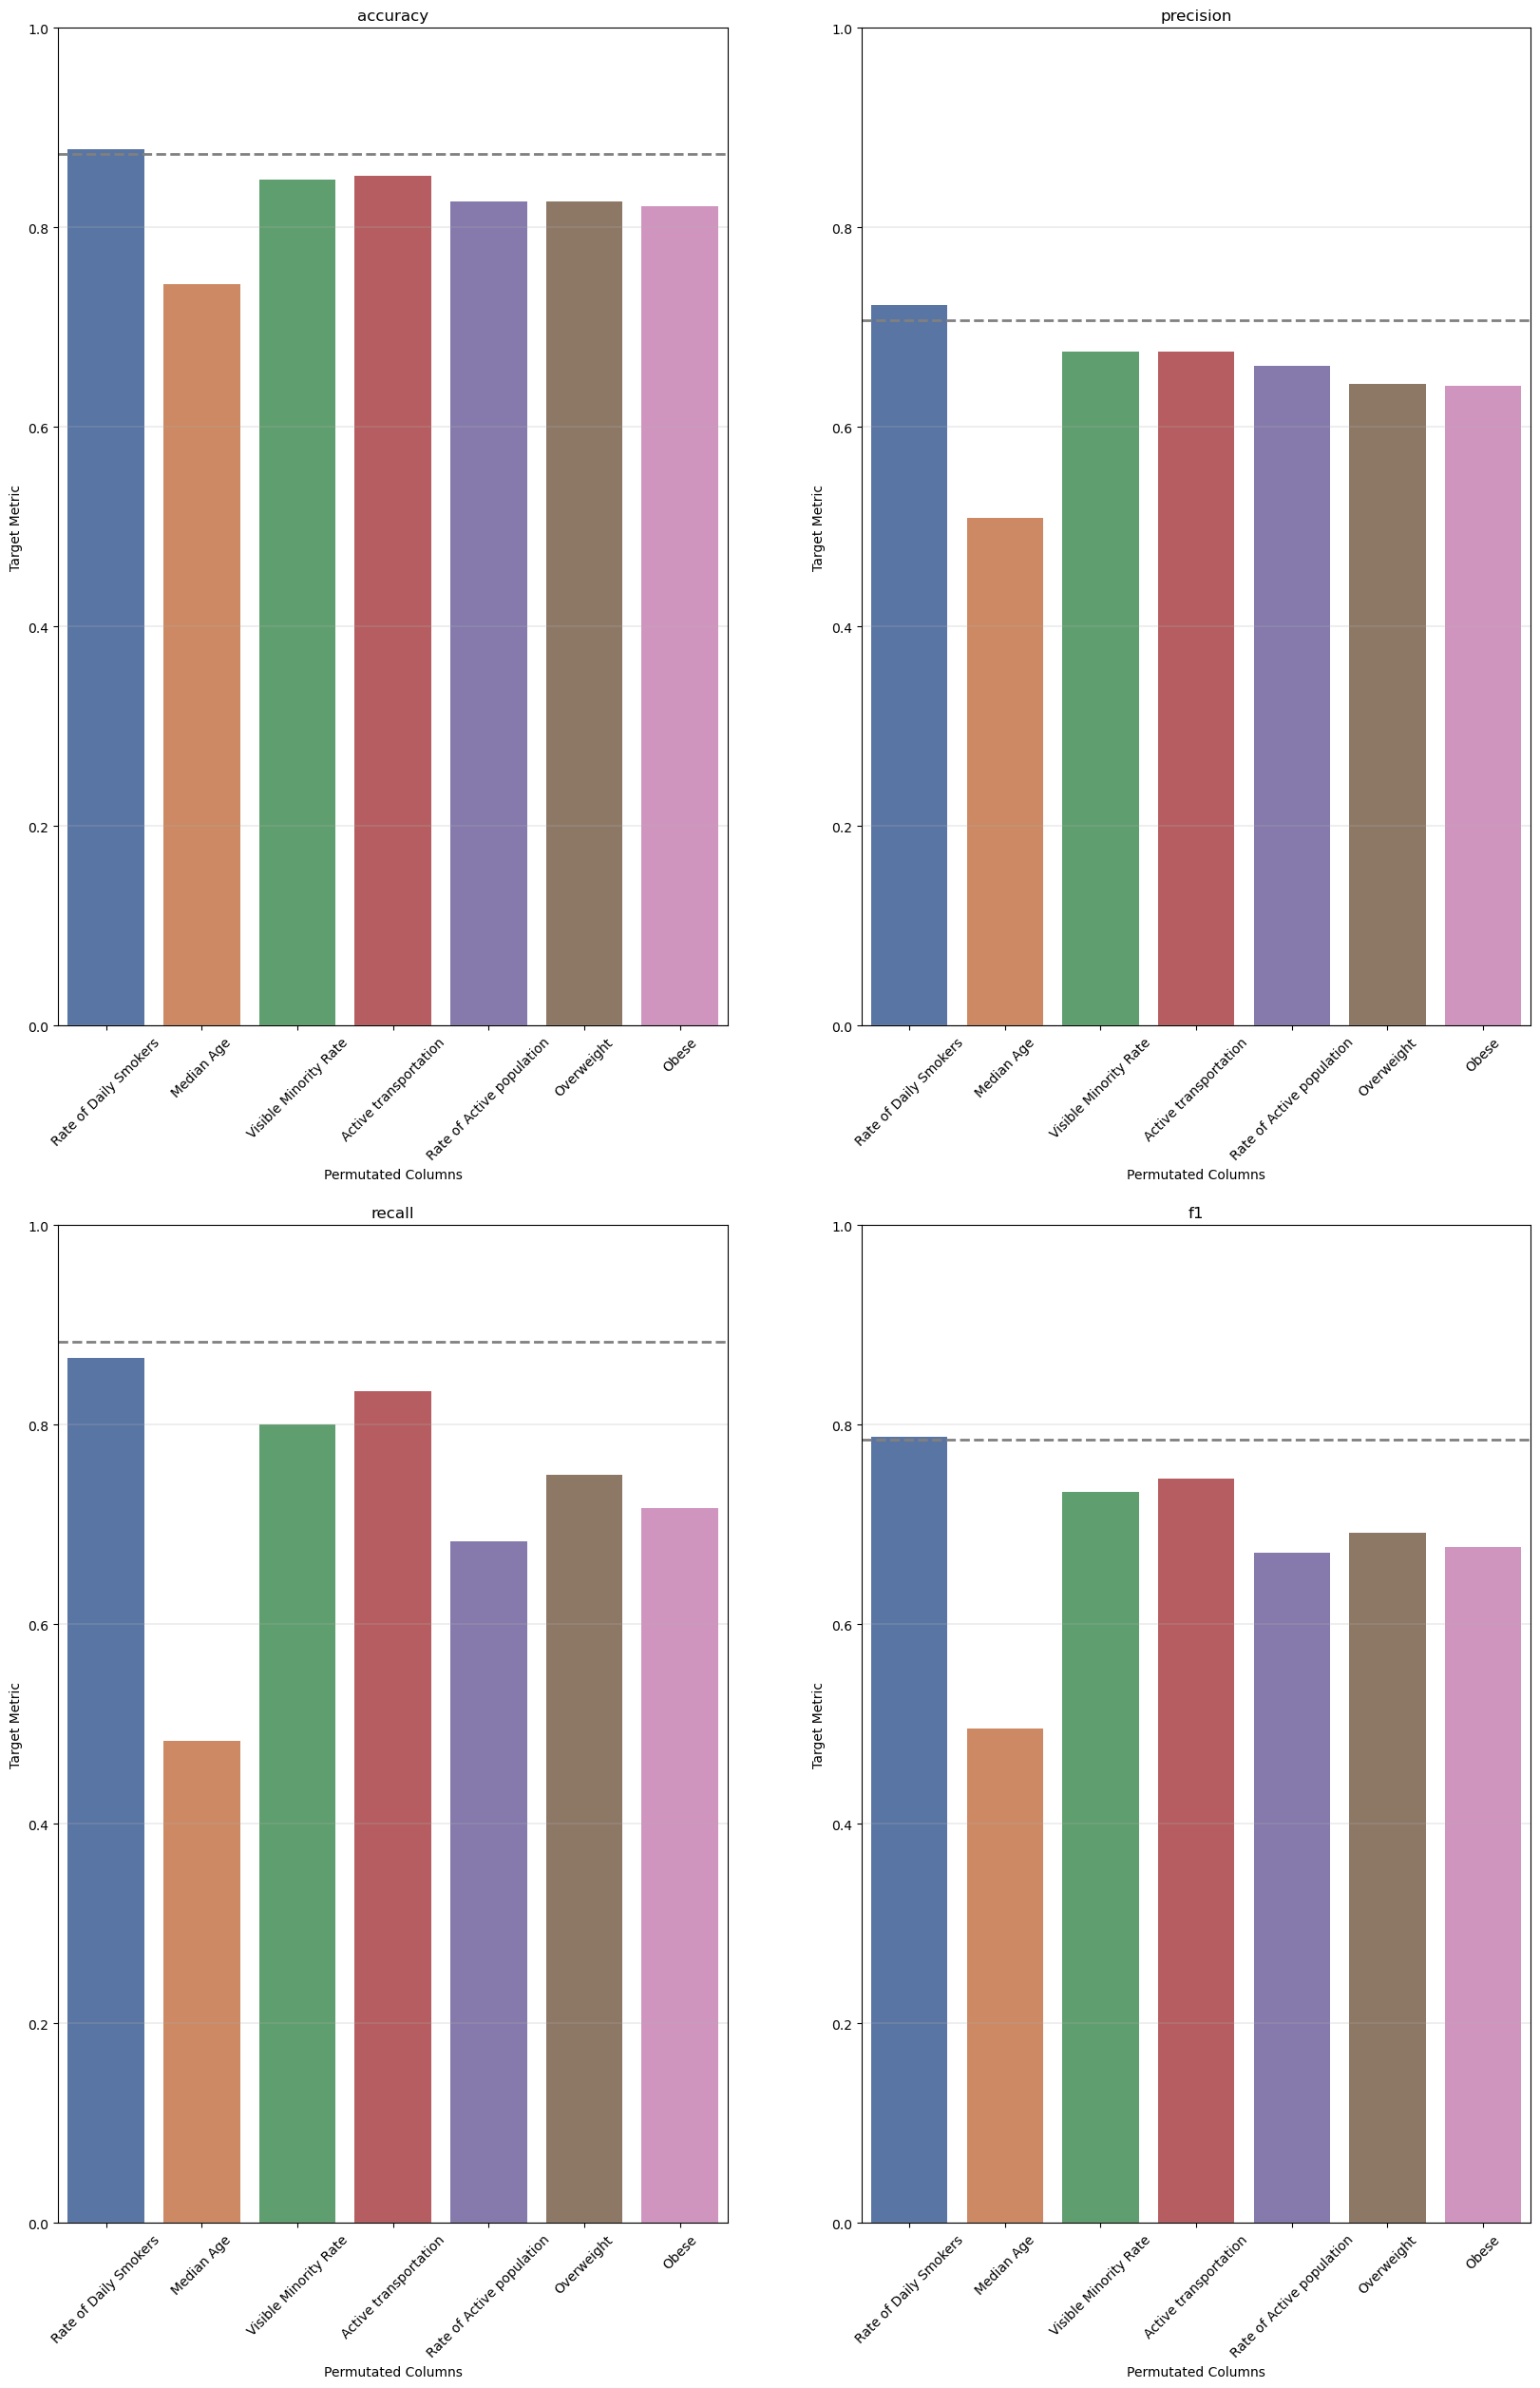

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [216]:
# Sensitivity Analysis
RF_features_short = [
    'Rate of Daily Smokers', 
    'Median Age', 
    'Visible Minority Rate',
    'Active transportation',
    'Rate of Active population', 
    'Overweight',
    'Obese'
]

result = sensitivity_analysis(
    model_for_rf, 
    X_RF_test, 
    y_test,
    RF_features_short)
draw_sensitivity_result(result)

In [215]:
# record the best model
best_model_name = "toronto_cma_random_forest.pkl"
path = os.path.join(os.getcwd(),"models","toronto cma",best_model_name) 
with open(path, 'wb') as file:
    pickle.dump(model_for_rf, file)

**6.3 XGBOOST**

In [235]:
xgb_model = GradientBoostingClassifier()

cv_xgb = StratifiedKFold(5)

rfecv_xgb = RFECV(
    estimator=xgb_model,
    step=1,
    cv=cv_xgb,
    scoring=accuracy_scoring,
    min_features_to_select=1,
)

rfecv_xgb.fit(X_resampled, y_resampled)

print(f"Optimal number of features (XGB): {rfecv_xgb.n_features_}")
# Print the optimal number of selected features

Optimal number of features (XGB): 21


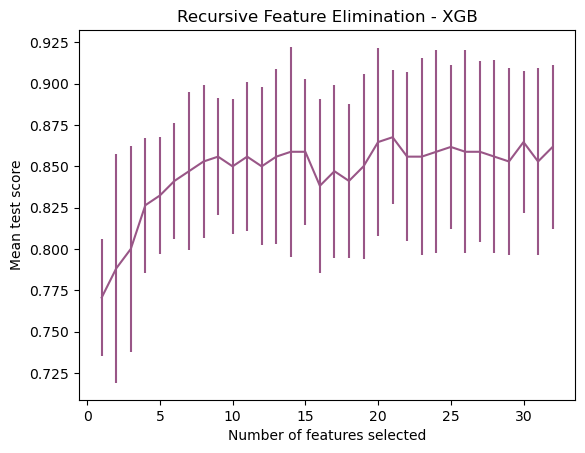

In [236]:
# Calculate the number of different feature selections tested
n_scores_XGB = len(rfecv_xgb.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_XGB + 1),
    rfecv_xgb.cv_results_["mean_test_score"],
    yerr=rfecv_xgb.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - XGB")

# Show the plot
plt.show()

In [237]:
selected_xgb_features = [i for i in X_resampled.columns[rfecv_xgb.support_]]

print("Selected Features for XGB:")
print(selected_xgb_features)

Selected Features for XGB:
['one_hot_encoder__Residential Instability quintiles_4', 'one_hot_encoder__Residential Instability quintiles_5', 'one_hot_encoder__Material Deprivation quintiles_3', 'one_hot_encoder__Material Deprivation quintiles_5', 'one_hot_encoder__Ethnic Concentration quintiles_1', 'one_hot_encoder__Ethnic Concentration quintiles_3', 'remainder__Mental Health Binary', 'remainder__Unemployment Rate', 'remainder__High Education Rate', 'remainder__Average Income', 'remainder__Median Age', 'remainder__Recent Immigrant Rate', 'remainder__Rented Rate', 'remainder__Visible Minority Rate', 'remainder__Visible Minority Binary', 'remainder__Active transportation', 'remainder__Rate of Active population', 'remainder__Rate of Daily Smokers', 'remainder__Food Insecurity binary', 'remainder__Overweight', 'remainder__Obese']


In [238]:
# Accessing the mean test scores
mean_test_scores_xgb = rfecv_xgb.cv_results_["mean_test_score"]

# Printing the list of mean test scores along with the number of selected features
for t, score_xgb in enumerate(mean_test_scores_xgb):
    xgb_selected_features = t + 1  #start with one feature
    print(f"Number of Selected Features: {xgb_selected_features}, Mean Test Score: {score_xgb}")

Number of Selected Features: 1, Mean Test Score: 0.7705882352941176
Number of Selected Features: 2, Mean Test Score: 0.7882352941176471
Number of Selected Features: 3, Mean Test Score: 0.8
Number of Selected Features: 4, Mean Test Score: 0.8264705882352942
Number of Selected Features: 5, Mean Test Score: 0.8323529411764706
Number of Selected Features: 6, Mean Test Score: 0.8411764705882353
Number of Selected Features: 7, Mean Test Score: 0.8470588235294118
Number of Selected Features: 8, Mean Test Score: 0.8529411764705882
Number of Selected Features: 9, Mean Test Score: 0.8558823529411764
Number of Selected Features: 10, Mean Test Score: 0.85
Number of Selected Features: 11, Mean Test Score: 0.8558823529411764
Number of Selected Features: 12, Mean Test Score: 0.85
Number of Selected Features: 13, Mean Test Score: 0.8558823529411764
Number of Selected Features: 14, Mean Test Score: 0.8588235294117647
Number of Selected Features: 15, Mean Test Score: 0.8588235294117647
Number of Selecte

In [239]:
#setting parametres
rfe_xgb = RFE(xgb_model, n_features_to_select=8)
rfe_xgb.fit(X_resampled, y_resampled)

#extracting features
most_important_features_XGB = X_resampled.columns[rfe_xgb.support_]

In [240]:
most_important_features_XGB

Index(['remainder__Mental Health Binary', 'remainder__Median Age',
       'remainder__Rented Rate', 'remainder__Visible Minority Rate',
       'remainder__Active transportation',
       'remainder__Rate of Active population', 'remainder__Overweight',
       'remainder__Obese'],
      dtype='object')



6.2 Hyperparametre tunning for XGBoost


In [241]:
# after many runs, we concluded the most important features are as below:

xgb_features = [
    'remainder__Rate of Daily Smokers',
    'remainder__Recent Immigrant Rate',
    'remainder__Visible Minority Rate',
    'remainder__Rate of Active population', 
    'remainder__Overweight',
    'remainder__Obese',
]

In [242]:
X_XGB_train = X_resampled[xgb_features]
X_XGB_test = X_test[xgb_features]

In [243]:
# Initializing the Gradient Boosting model with initial parameters
xgb = GradientBoostingClassifier()

# Creating a pipeline that first applies the column transformations and then runs the Gradient Boosting model
model_for_xgb = Pipeline([
    ('xg_boost', xgb)
])

# Fitting the model on the training data
model_for_xgb.fit(X_XGB_train, y_resampled)

Pipeline(steps=[('xg_boost', GradientBoostingClassifier())])

**6.3.1 Hyperparametre tunning for XGB**

In [244]:
### Hyperparameter tuning using GridSearchCV
param_dist_xgb = {
    "xg_boost__n_estimators" : [50, 100, 150, 200],
    "xg_boost__max_depth" : [3, 5, 7, 9],
    "xg_boost__min_samples_leaf" : [3, 5, 7, 10],
    "xg_boost__learning_rate" : [i/10 for i in range(1,11)]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search_xgb = GridSearchCV(
    model_for_xgb, param_grid=param_dist_xgb, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search_xgb.fit(X_XGB_train, y_resampled)

# Extract results into a DataFrame
results_xgb = pd.DataFrame(random_search_xgb.cv_results_)

# Display the set of parameters that achieved the best score
results_xgb[results_xgb['rank_test_score'] == 1]
# Retrieve the best hyperparameters after Grid Search for RF
random_search_xgb.best_params_

{'xg_boost__learning_rate': 0.7,
 'xg_boost__max_depth': 9,
 'xg_boost__min_samples_leaf': 10,
 'xg_boost__n_estimators': 100}

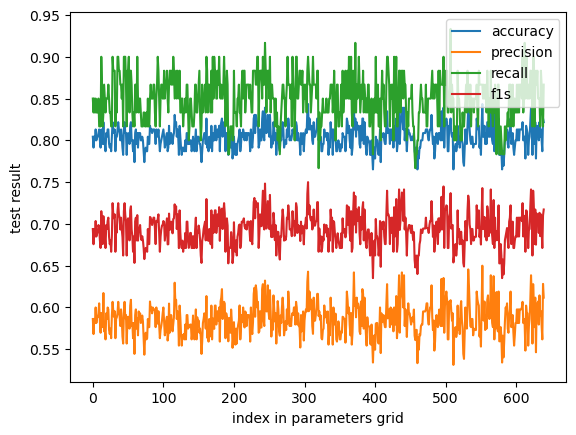

Best Configs: 
{'xg_boost__learning_rate': 0.5, 'xg_boost__max_depth': 9, 'xg_boost__min_samples_leaf': 3, 'xg_boost__n_estimators': 100}




In [245]:
# check overfitting in hyper-parameters tuning
import matplotlib.pyplot as plt
import numpy as np

def get_aprf(grid, model, x_train, y_train, x_test, y_test):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    valid_params = []

    for param_config in grid.__dict__["cv_results_"]["params"]:
        try:
            model = model.set_params(
                xg_boost__n_estimators=param_config["xg_boost__n_estimators"], 
                xg_boost__max_depth=param_config["xg_boost__max_depth"], 
                xg_boost__min_samples_leaf=param_config["xg_boost__min_samples_leaf"],
                xg_boost__learning_rate=param_config["xg_boost__learning_rate"],
            )
            # Refit the model using the training data
            model = model.fit(x_train, y_train)
            y_pred_test = model.predict(x_test)

            accuracy_test = accuracy_score(y_test, y_pred_test)
            precision_test = precision_score(y_test, y_pred_test)
            recall_test = recall_score(y_test, y_pred_test)
            f1_test = f1_score(y_test, y_pred_test)

            valid_params.append(param_config)

            accuracies.append(accuracy_test)
            precisions.append(precision_test)
            recalls.append(recall_test)
            f1s.append(f1_test)  

        except:
            pass
        
    return valid_params, accuracies, precisions, recalls, f1s


grid = random_search_xgb
model = model_for_xgb

x_train = X_XGB_train
y_train = y_resampled
x_test = X_XGB_test
y_test = y_test

valid_params, accuracies, precisions, recalls, f1s = get_aprf(grid, model, x_train, y_train, x_test, y_test)

plt.plot(accuracies)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(f1s)
plt.legend(['accuracy','precision','recall','f1s'])
plt.xlabel("index in parameters grid")
plt.ylabel("test result")
plt.show()

test_bests = pass_decision_flow(f1s, recalls, accuracies, precisions)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

for index in test_bests:
    param_config = valid_params[index]
    
    model = model.set_params(
        xg_boost__n_estimators=param_config["xg_boost__n_estimators"], 
        xg_boost__max_depth=param_config["xg_boost__max_depth"], 
        xg_boost__min_samples_leaf=param_config["xg_boost__min_samples_leaf"],
        xg_boost__learning_rate=param_config["xg_boost__learning_rate"],
    )
    # Refit the model using the training data
    model = model.fit(x_train, y_train)
    y_pred_train = cross_val_predict(model, x_train, y_train, cv=5)

    accuracy = accuracy_score(y_train, y_pred_train)
    precision  = precision_score(y_train, y_pred_train)
    recall  = recall_score(y_train, y_pred_train)
    f1  = f1_score(y_train, y_pred_train)

    train_accuracies.append(accuracy)
    train_precisions.append(precision)
    train_recalls.append(recall)
    train_f1s.append(f1) 

test_train_bests = pass_decision_flow(train_f1s, train_recalls, train_accuracies, train_precisions)

the_bests = [valid_params[test_bests[index]] for index in test_train_bests]

print("Best Configs: ")
for best_config in the_bests:
    print(best_config)
    print("\n")

In [246]:
# Update the model's hyperparameters to the best found during Grid Search
best_config = the_bests[0]
model_for_xgb = model_for_xgb.set_params(
    xg_boost__n_estimators=best_config["xg_boost__n_estimators"], 
    xg_boost__max_depth=best_config["xg_boost__max_depth"], 
    xg_boost__min_samples_leaf=best_config["xg_boost__min_samples_leaf"],
    xg_boost__learning_rate=best_config["xg_boost__learning_rate"],
)

# Refit the model using the training data
model_for_xgb = model_for_xgb.fit(X_XGB_train, y_resampled)

In [247]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels_xgb_model = cross_val_predict(model_for_xgb, X_XGB_train, y_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix_xgb = confusion_matrix(y_resampled, predicted_labels_xgb_model)

# Calculate the full classification report
class_report_xgb = classification_report(y_resampled, predicted_labels_xgb_model)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_resampled, predicted_labels_xgb_model)

# Calculate precision
precision_xgb = precision_score(y_resampled, predicted_labels_xgb_model)

# Calculate recall
recall_xgb = recall_score(y_resampled, predicted_labels_xgb_model)

# Calculate F1 score
f1_xgb = f1_score(y_resampled, predicted_labels_xgb_model)


# Print the full confusion matrix and classification report
print("XGB Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix_xgb)
print("B. Classification Report:")
print(class_report_xgb)
print("C. Accuracy: {:.2f}".format(accuracy_xgb))
print("D. Precision: {:.2f}".format(precision_xgb))
print("E. Recall (Sensitivity): {:.2f}".format(recall_xgb))
print("F. F1 Score: {:.2f}".format(f1_xgb))

XGB Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[131  39]
 [ 28 142]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       170
           1       0.78      0.84      0.81       170

    accuracy                           0.80       340
   macro avg       0.80      0.80      0.80       340
weighted avg       0.80      0.80      0.80       340

C. Accuracy: 0.80
D. Precision: 0.78
E. Recall (Sensitivity): 0.84
F. F1 Score: 0.81


Training ROC-AUC: 1.0000


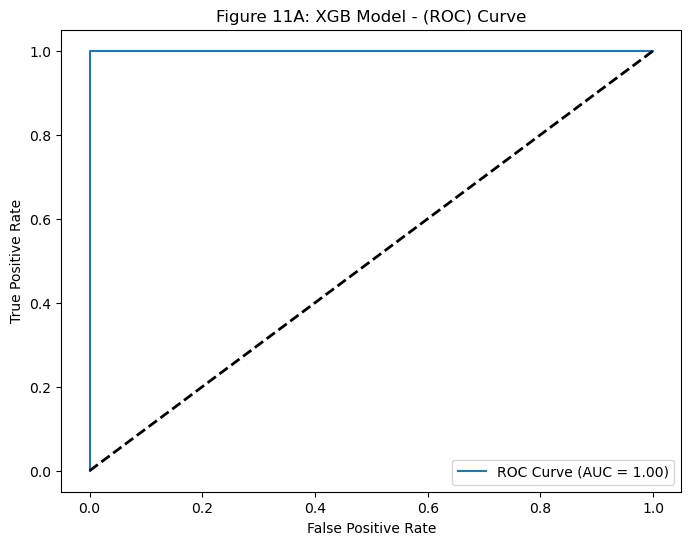

In [248]:
predicted_probs_xgb = model_for_xgb.predict_proba(X_XGB_train)[:, 1]

# Calculate ROC-AUC
roc_auc_xgb = roc_auc_score(y_resampled, predicted_probs_xgb)
print(f"Training ROC-AUC: {roc_auc_xgb:.4f}")

# Calculate ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_resampled, predicted_probs_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 11A: XGB Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [249]:
# Making predictions on the test set of the xgb model
y_pred_test_xgb = model_for_xgb.predict(X_XGB_test)

# Calculating metrics
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Printing the evaluation metrics
print("XGB Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_xgb))
print("Precision: {:.2f}".format(precision_test_xgb))
print("Recall (Sensitivity): {:.2f}".format(recall_test_xgb))
print("F1 Score: {:.2f}".format(f1_test_xgb))
print("Confusion Matrix:")
print(conf_matrix_test_xgb)

XGB Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.80
Precision: 0.58
Recall (Sensitivity): 0.87
F1 Score: 0.69
Confusion Matrix:
[[132  38]
 [  8  52]]


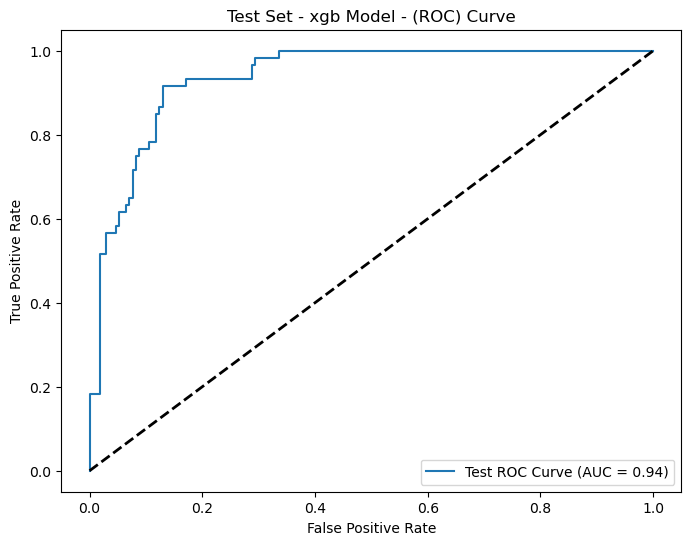

In [251]:
# Making predictions on the test set of the RF model
predicted_probs_test_xgb = model_for_rf.predict_proba(X_RF_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_xgb = roc_auc_score(y_test, predicted_probs_test_xgb)

# Calculate ROC curve on the test set
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, predicted_probs_test_xgb)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'Test ROC Curve (AUC = {roc_auc_test_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set - xgb Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

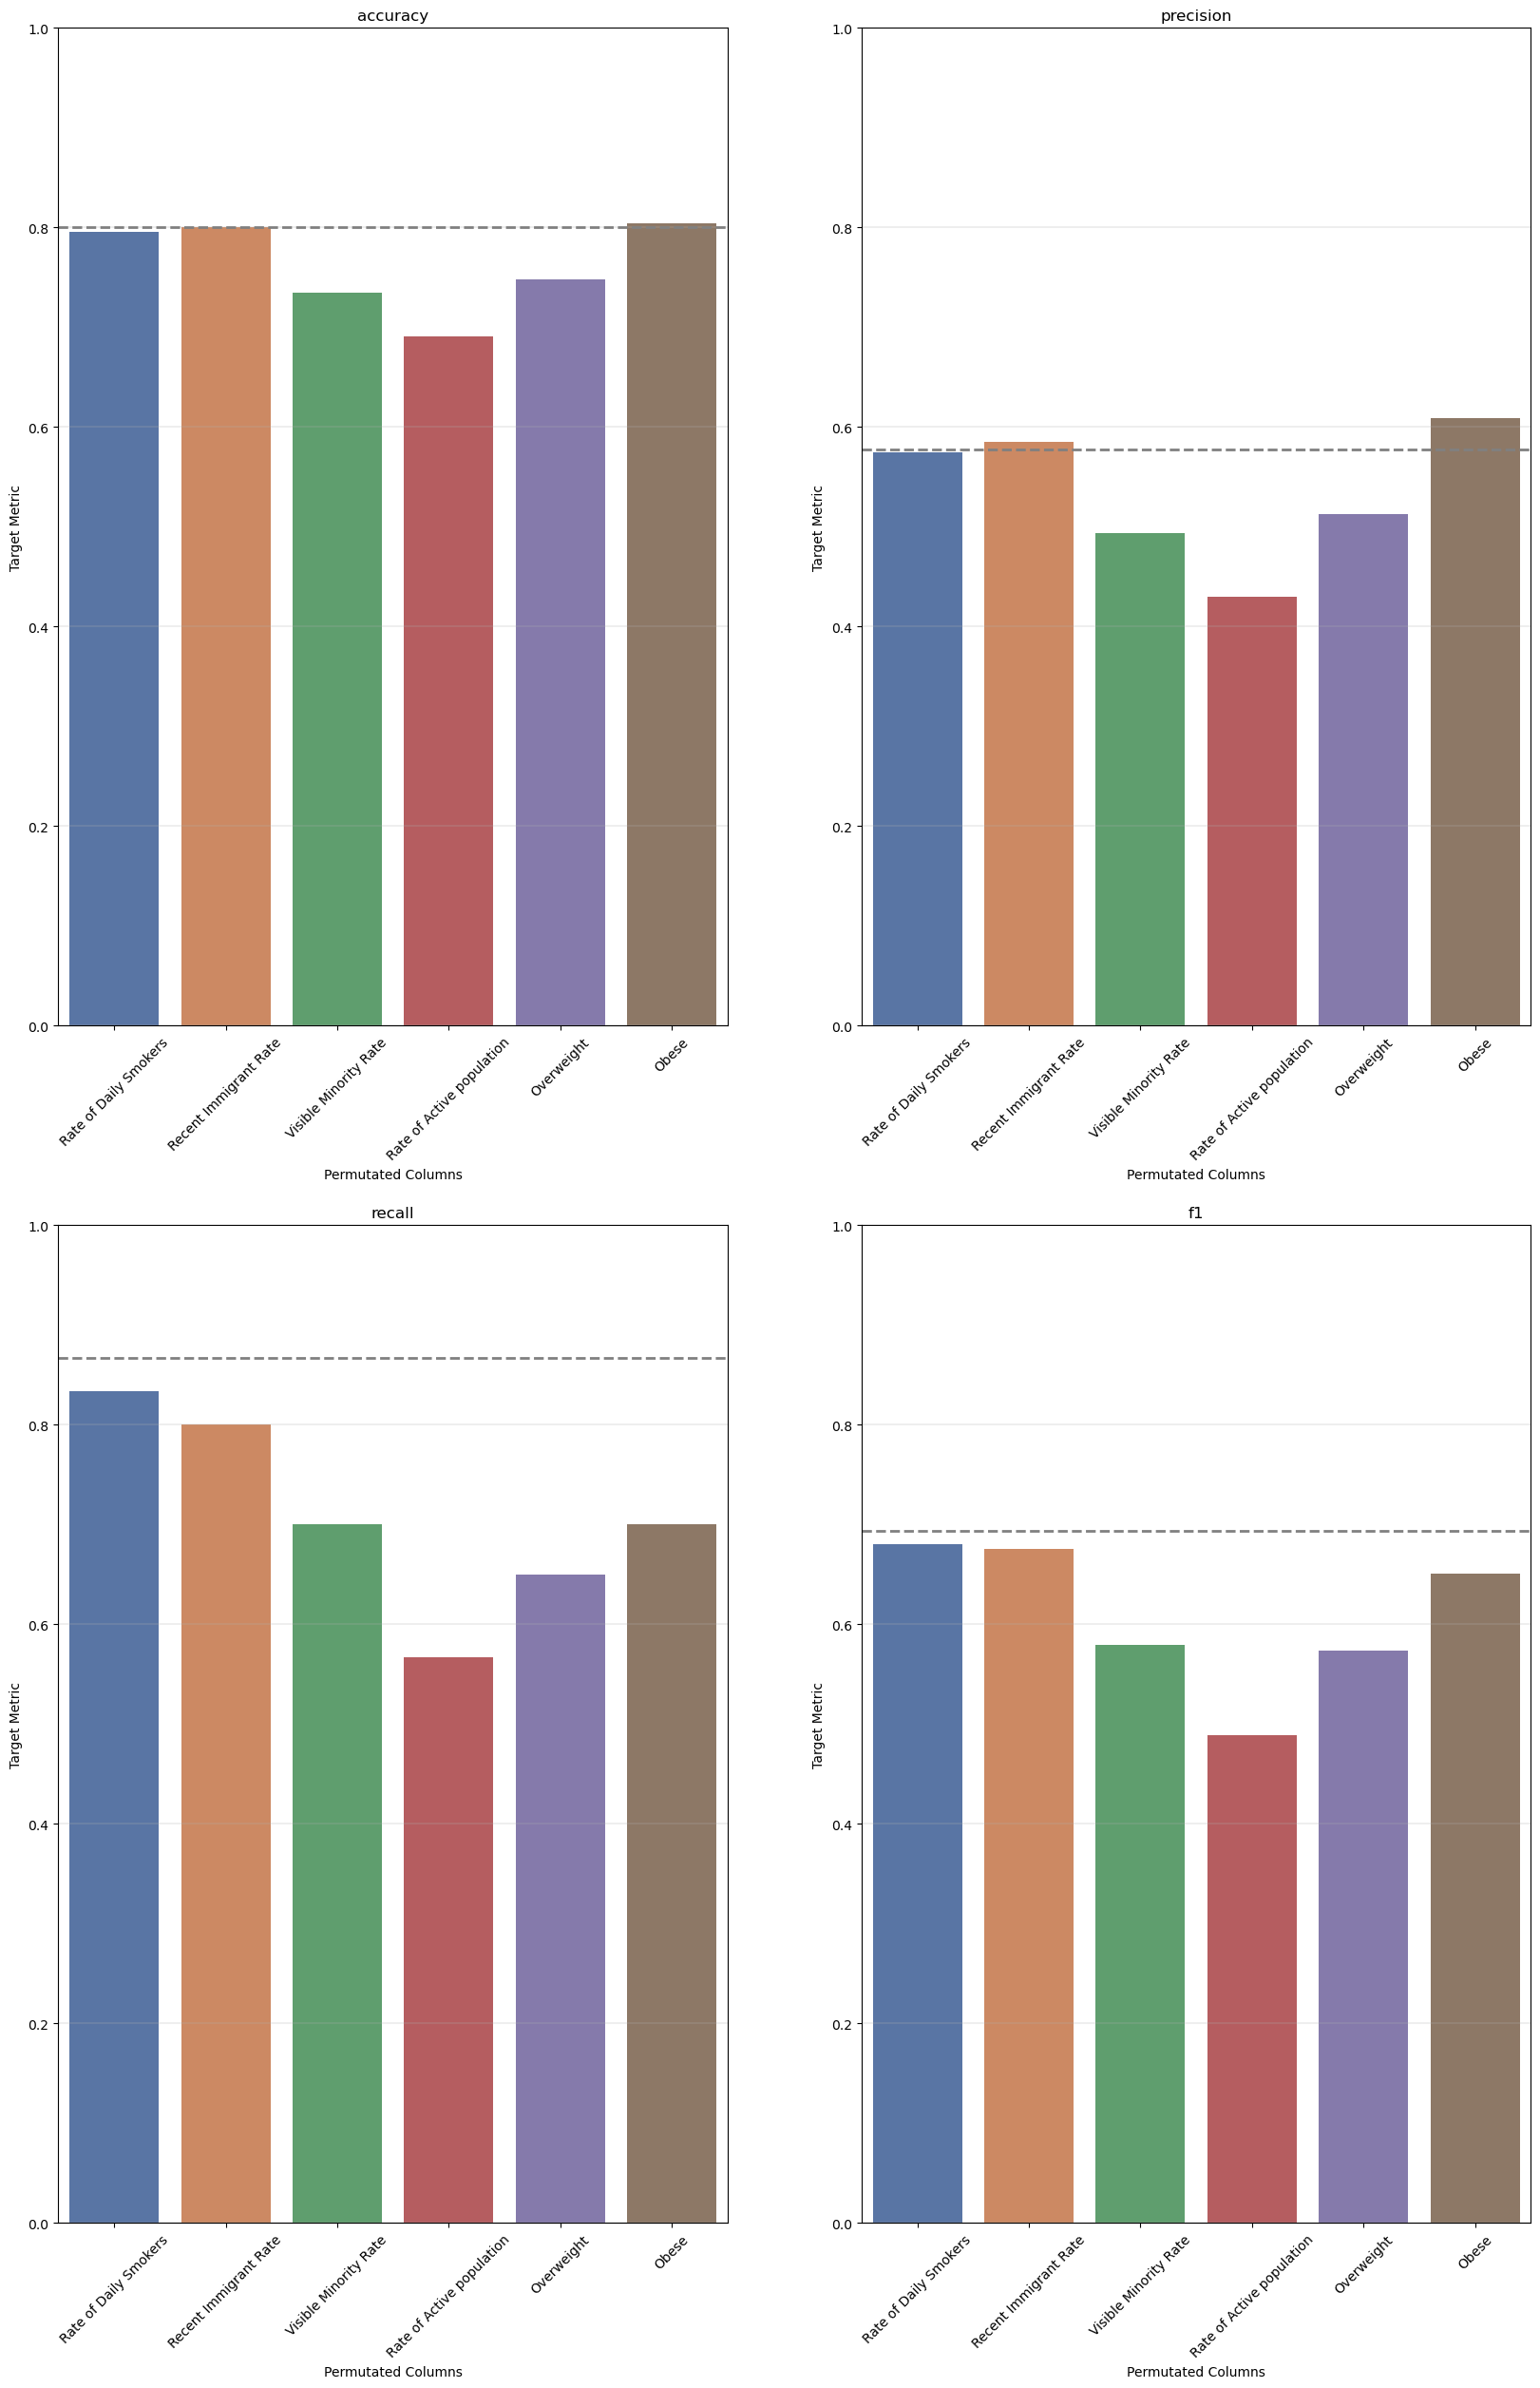

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [253]:
# Sensitivity Analysis

xgb_features_short = [
    'Rate of Daily Smokers',
    'Recent Immigrant Rate',
    'Visible Minority Rate',
    'Rate of Active population', 
    'Overweight',
    'Obese',
]

result = sensitivity_analysis(
    model_for_xgb, 
    X_XGB_test, 
    y_test,
    xgb_features_short)
draw_sensitivity_result(result)

In [254]:
# record the best model
best_model_name = "toronto_cma_xgb.pkl"
path = os.path.join(os.getcwd(),"models","toronto cma",best_model_name) 
with open(path, 'wb') as file:
    pickle.dump(model_for_xgb, file)

**Section 7: Summary of models**

**7.1 Evaluations**

In [255]:
# setting evaluations
evaluations = {
    'Model': [
        'LR Training', 
        'LR Test', 
        'KNN Training', 
        'KNN Test', 
        'MLP Training', 
        'MLP Test', 
        'SVM Training', 
        'SVM Test', 
        'DT Training', 
        'DT Test', 
        'RF Training', 
        'RF Test', 
        'XGB train', 
        'XGB test'
    ],
    'Accuracy': [
        accuracy_LR, 
        accuracy_test_LR, 
        accuracy_knn, 
        accuracy_test_knn, 
        accuracy_MLP, 
        accuracy_test_MLP, 
        accuracy_SVM, 
        accuracy_test_SVM, 
        accuracy_DT, 
        accuracy_test_DT, 
        accuracy_RF, 
        accuracy_test_RF, 
        accuracy_xgb, 
        accuracy_test_xgb
    ],
    'Precision': [
        precision_LR, 
        precision_test_LR, 
        precision_knn, 
        precision_test_knn, 
        precision_MLP, 
        precision_test_MLP, 
        precision_SVM, 
        precision_test_SVM, 
        precision_DT, 
        precision_test_DT, 
        precision_RF, 
        precision_test_RF, 
        precision_xgb, 
        precision_test_xgb
    ],
    'Recall (Sensitivity)': [
        recall_LR, recall_test_LR, 
        recall_knn, 
        recall_test_knn, 
        recall_MLP, 
        recall_test_MLP, 
        recall_SVM, 
        recall_test_SVM, 
        recall_DT, 
        recall_test_DT, 
        recall_RF, 
        recall_test_RF, 
        recall_xgb, 
        recall_test_xgb
    ],
    'F1 Score': [
        f1_LR, 
        f1_test_LR, 
        f1_knn, 
        f1_test_knn, 
        f1_MLP, 
        f1_test_MLP, 
        f1_SVM, 
        f1_test_SVM, 
        f1_DT, 
        f1_test_DT, 
        f1_RF, 
        f1_test_RF, 
        f1_xgb, 
        f1_test_xgb
    ]
}

# Creating a DataFrame
results_summary = pd.DataFrame(evaluations)

# Displaying the combined evaluation results
print(results_summary)

           Model  Accuracy  Precision  Recall (Sensitivity)  F1 Score
0    LR Training  0.794118   0.777778              0.823529  0.800000
1        LR Test  0.839130   0.649351              0.833333  0.729927
2   KNN Training  0.864706   0.864706              0.864706  0.864706
3       KNN Test  0.873913   0.771930              0.733333  0.752137
4   MLP Training  0.891176   0.880000              0.905882  0.892754
5       MLP Test  0.886957   0.742857              0.866667  0.800000
6   SVM Training  0.864706   0.826316              0.923529  0.872222
7       SVM Test  0.865217   0.670588              0.950000  0.786207
8    DT Training  0.773529   0.771930              0.776471  0.774194
9        DT Test  0.769565   0.540230              0.783333  0.639456
10   RF Training  0.838235   0.814208              0.876471  0.844193
11       RF Test  0.873913   0.706667              0.883333  0.785185
12     XGB train  0.802941   0.784530              0.835294  0.809117
13      XGB test  0.

**7.2 ROC curves**

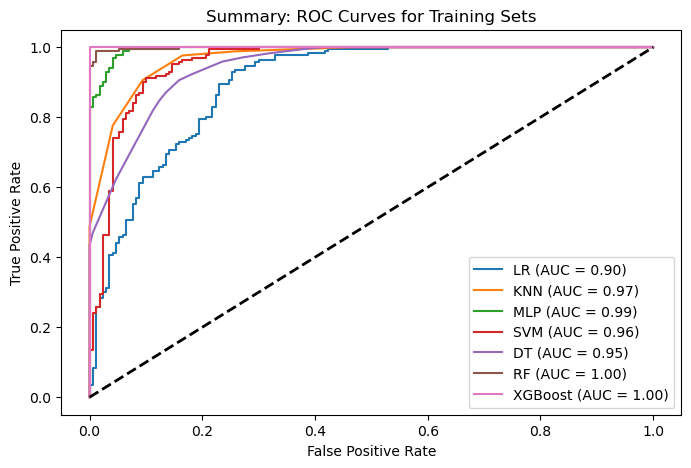

In [256]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Training Sets')
plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC = {roc_auc_train_LR:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_MLP, tpr_MLP, label=f'MLP (AUC = {roc_auc_train_MLP:.2f})')
plt.plot(fpr_SVM, tpr_SVM, label=f'SVM (AUC = {roc_auc_train_SVM:.2f})')
plt.plot(fpr_DT, tpr_DT, label=f'DT (AUC = {roc_auc_train_DT:.2f})')
plt.plot(fpr_RF, tpr_RF, label=f'RF (AUC = {roc_auc_train_RF:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()


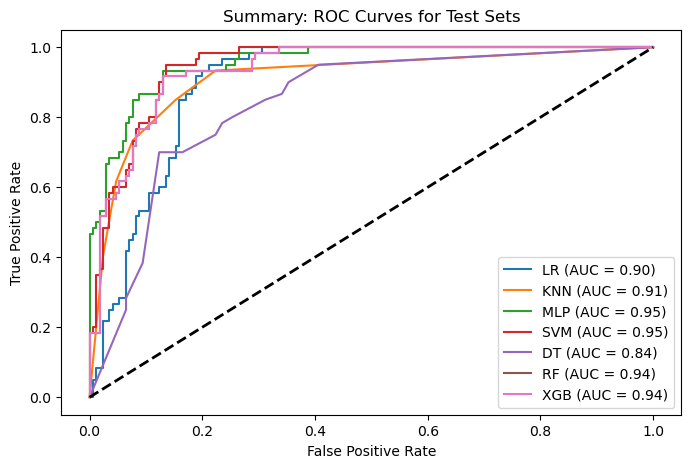

In [257]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Test Sets')
plt.plot(fpr_test_LR, tpr_test_LR, label=f'LR (AUC = {roc_auc_test_LR:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, label=f'KNN (AUC = {roc_auc_test_knn:.2f})')
plt.plot(fpr_test_MLP, tpr_test_MLP, label=f'MLP (AUC = {roc_auc_test_MLP:.2f})')
plt.plot(fpr_test_SVM, tpr_test_SVM, label=f'SVM (AUC = {roc_auc_test_SVM:.2f})')
plt.plot(fpr_test_DT, tpr_test_DT, label=f'DT (AUC = {roc_auc_test_DT:.2f})')
plt.plot(fpr_test_RF, tpr_test_RF, label=f'RF (AUC = {roc_auc_test_RF:.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGB (AUC = {roc_auc_test_xgb:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()

In [258]:
print("Number of Selected Features by Model")
features_table_summary = pd.DataFrame(columns=["Model", "Number of Features"])
features_table_summary.loc[len(features_table_summary)] = "LR", len(LR_features)
features_table_summary.loc[len(features_table_summary)] = "KNN", len(LR_features)
features_table_summary.loc[len(features_table_summary)] = "MLP", len(MLP_features)
features_table_summary.loc[len(features_table_summary)] = "SVM", len(LR_features)
features_table_summary.loc[len(features_table_summary)] = "DT", len(DT_features)
features_table_summary.loc[len(features_table_summary)] = "RF", len(RF_features)
features_table_summary.loc[len(features_table_summary)] = "XGB", len(xgb_features)
print(features_table_summary)

Number of Selected Features by Model
  Model  Number of Features
0    LR                   5
1   KNN                   5
2   MLP                   7
3   SVM                   5
4    DT                   4
5    RF                   7
6   XGB                   6


In [259]:
counted = dict(Counter(LR_features+MLP_features+DT_features+RF_features+xgb_features))
overall_features = [i for i in counted.keys()]
overall_counts = [i for i in counted.values()]

print(f"The following variables were used most frequently, in {max(overall_counts):.0f} models:")
for i in range(len(overall_counts)):
    if overall_counts[i] == max(overall_counts):
        print(overall_features[i])

The following variables were used most frequently, in 5 models:
remainder__Overweight
remainder__Obese
